In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [98]:
# importing the dataset

In [99]:
df = pd.read_csv("Data file.csv",index_col=[0])

In [100]:
pd.set_option('display.max_columns',None)

In [101]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                2.0                0.0              1539              2   
2               20.0                0.0              5787              1   
3                3.0                0.0              1539              1   
4               41.0                0.0               947              0   
5                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1          21.0             3078.0                1539.0   
2           0.0             5787.0                5787.0   
3           0.0             1539.0                1539.0   
4           0.0                0.0                   0.0   
5           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                  7.50              2            21               3078   
2                 61.04              1             0               5787   
3                 66.32              1             0               1539   
4                  0.00              1             0                947   
5                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
1                1539.0                  7.50            0.0           0.0   
2                5787.0                 61.04            0.0           0.0   
3                1539.0                 66.32            0.0           0.0   
4                 947.0                  2.50            0.0           0.0   
5                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1              0             0            2            12              6.0   
2              0             0            1            12             12.0   
3              0             0            1             6              6.0   
4              0             0            2            12              6.0   
5              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
1                 0.0  29.000000  29.000000     UPW  2016-07-20  
2                 0.0   0.000000   0.000000     UPW  2016-08-10  
3                 0.0   0.000000   0.000000     UPW  2016-08-19  
4                 0.0   0.000000   0.000000     UPW  2016-06-06  
5                 0.0   2.333333   2.333333     UPW  2016-06-22

In [102]:
df.columns,len(df.columns)

(Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
        'rental90', 'last_rech_date_ma', 'last_rech_date_da',
        'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
        'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
        'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
        'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
        'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
        'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
        'payback90', 'pcircle', 'pdate'],
       dtype='object'),
 36)

In [103]:
df.sample(5)

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
143738      1  41824I89235  1268.0     10.348333     10.348333    270.55   
155921      1  39735I84453  1081.0   2217.889333   2220.334667    117.06   
166134      0  70859I90845   531.0    504.933667    507.790000     19.00   
19788       1  36362I70786   562.0  10299.000000  10498.500000   3099.20   
76975       0  24520I84458   229.0    913.333333    916.000000     50.00   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
143738    270.55                7.0                0.0               773   
155921    152.06               11.0                0.0               770   
166134     30.00               26.0                0.0               770   
19788   10392.96                4.0                0.0              1539   
76975      60.00               25.0                0.0              1539   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
143738              2           3.0             1546.0                 773.0   
155921              1           0.0              770.0                 770.0   
166134              1           0.0              770.0                 770.0   
19788               7           3.0             8466.0                1539.0   
76975               1           0.0             1539.0                1539.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
143738                  8.60              2             3               1546   
155921                 41.73              1             0                770   
166134                  9.00              1             0                770   
19788                   4.50             11             3              11549   
76975                  85.00              1             0               1539   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
143738                 773.0                  8.60            0.0   
155921                 770.0                 41.73            0.0   
166134                 770.0                  9.00            0.0   
19788                  770.0                  4.50            0.0   
76975                 1539.0                 85.00            0.0   

        fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
143738           0.0              0             0            1             6   
155921           0.0              0             0            1             6   
166134           0.0              0             0            1             6   
19788            0.0              0             0            5            42   
76975            0.0              0             0            1             6   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
143738              6.0                 0.0          1.0             6   
155921              6.0                 1.0          1.0             6   
166134              6.0                 0.0          1.0             6   
19788              12.0                 0.0          9.0            66   
76975               6.0                 0.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90 pcircle  \
143738                6                 0.0        0.0        0.0     UPW   
155921                6                 1.0        0.0        0.0     UPW   
166134                6                 0.0        0.0        0.0     UPW   
19788                12                 0.0        7.4        8.0     UPW   
76975                 6                 0.0        0.0        0.0     UPW   

             pdate  
143738  2016-06-05  
155921  2016-07-23  
166134  2016-07-11  
19788   2016-08-03  
76975   2016-07-05

In [104]:
# checking for any missing values in the dataset

In [105]:
df.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

* No missing data check, positive!

In [106]:
# checking for correlated features in the dataset

In [107]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

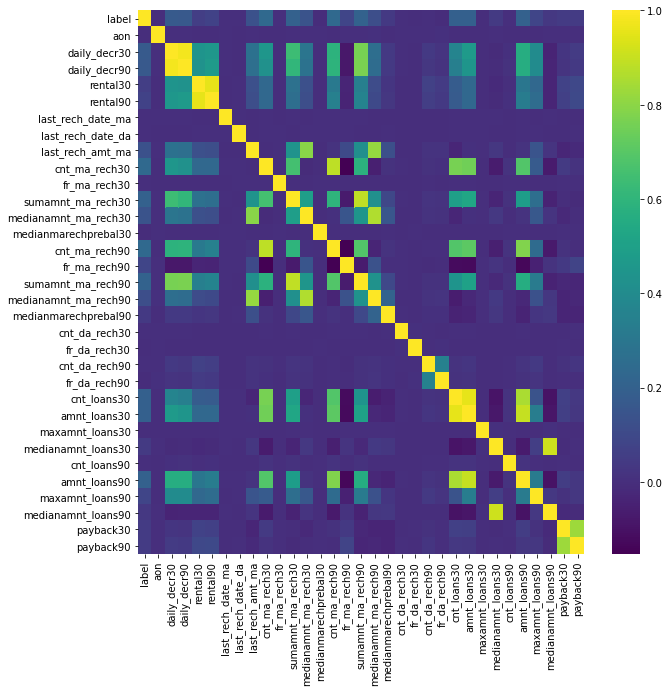

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='viridis')

In [109]:
df.corr()['daily_decr30']

label                   0.168298
aon                     0.001104
daily_decr30            1.000000
daily_decr90            0.977704
rental30                0.442066
rental90                0.458977
last_rech_date_ma       0.000487
last_rech_date_da      -0.001636
last_rech_amt_ma        0.275837
cnt_ma_rech30           0.451385
fr_ma_rech30           -0.000577
sumamnt_ma_rech30       0.636536
medianamnt_ma_rech30    0.295356
medianmarechprebal30   -0.001153
cnt_ma_rech90           0.587338
fr_ma_rech90           -0.078299
sumamnt_ma_rech90       0.762981
medianamnt_ma_rech90    0.257847
medianmarechprebal90    0.037495
cnt_da_rech30           0.000700
fr_da_rech30           -0.001499
cnt_da_rech90           0.038814
fr_da_rech90            0.020673
cnt_loans30             0.366116
amnt_loans30            0.471492
maxamnt_loans30        -0.000028
medianamnt_loans30     -0.011610
cnt_loans90             0.008962
amnt_loans90            0.563496
maxamnt_loans90         0.400199
medianamnt

* Daily spent of main account for 30 days and 90 days is highly (near perfectly) correlated.
* The rest of the features seems fine.

## Univariate Analysis

In [110]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                2.0                0.0              1539              2   
2               20.0                0.0              5787              1   
3                3.0                0.0              1539              1   
4               41.0                0.0               947              0   
5                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1          21.0             3078.0                1539.0   
2           0.0             5787.0                5787.0   
3           0.0             1539.0                1539.0   
4           0.0                0.0                   0.0   
5           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                  7.50              2            21               3078   
2                 61.04              1             0               5787   
3                 66.32              1             0               1539   
4                  0.00              1             0                947   
5                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
1                1539.0                  7.50            0.0           0.0   
2                5787.0                 61.04            0.0           0.0   
3                1539.0                 66.32            0.0           0.0   
4                 947.0                  2.50            0.0           0.0   
5                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1              0             0            2            12              6.0   
2              0             0            1            12             12.0   
3              0             0            1             6              6.0   
4              0             0            2            12              6.0   
5              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
1                 0.0  29.000000  29.000000     UPW  2016-07-20  
2                 0.0   0.000000   0.000000     UPW  2016-08-10  
3                 0.0   0.000000   0.000000     UPW  2016-08-19  
4                 0.0   0.000000   0.000000     UPW  2016-06-06  
5                 0.0   2.333333   2.333333     UPW  2016-06-22

In [111]:
# let's start with the label

In [112]:
df.label

1         0
2         1
3         1
4         1
5         1
         ..
209589    1
209590    1
209591    1
209592    1
209593    1
Name: label, Length: 209593, dtype: int64

* 0 -> defaulters
* 1 -> non-defeaulters

In [113]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

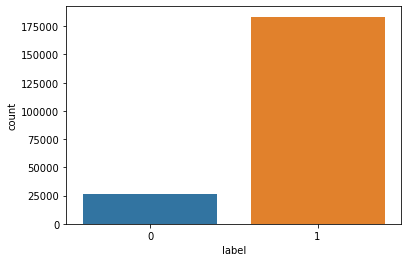

In [114]:
sns.countplot(df.label)

* We have imbalance classes in our dataset.

In [115]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                2.0                0.0              1539              2   
2               20.0                0.0              5787              1   
3                3.0                0.0              1539              1   
4               41.0                0.0               947              0   
5                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1          21.0             3078.0                1539.0   
2           0.0             5787.0                5787.0   
3           0.0             1539.0                1539.0   
4           0.0                0.0                   0.0   
5           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                  7.50              2            21               3078   
2                 61.04              1             0               5787   
3                 66.32              1             0               1539   
4                  0.00              1             0                947   
5                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
1                1539.0                  7.50            0.0           0.0   
2                5787.0                 61.04            0.0           0.0   
3                1539.0                 66.32            0.0           0.0   
4                 947.0                  2.50            0.0           0.0   
5                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1              0             0            2            12              6.0   
2              0             0            1            12             12.0   
3              0             0            1             6              6.0   
4              0             0            2            12              6.0   
5              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
1                 0.0  29.000000  29.000000     UPW  2016-07-20  
2                 0.0   0.000000   0.000000     UPW  2016-08-10  
3                 0.0   0.000000   0.000000     UPW  2016-08-19  
4                 0.0   0.000000   0.000000     UPW  2016-06-06  
5                 0.0   2.333333   2.333333     UPW  2016-06-22

In [116]:
# Age of the cellular network

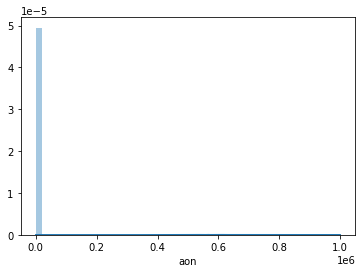

In [117]:
sns.distplot(df.aon)

In [118]:
df.aon.value_counts()

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64

In [119]:
# average of daily use over 30 days and 90 days

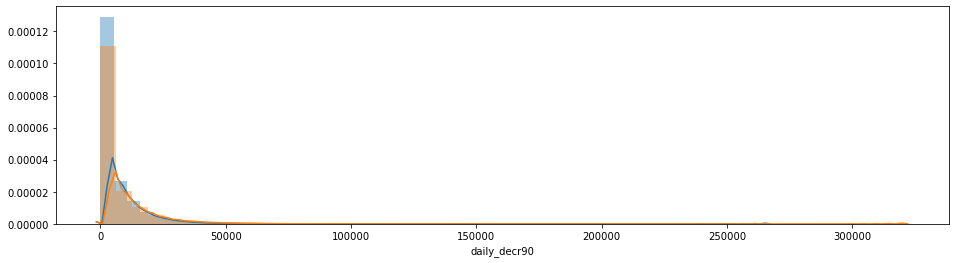

In [120]:
plt.figure(figsize=(16,4))
sns.distplot(df.daily_decr30)
sns.distplot(df.daily_decr90)

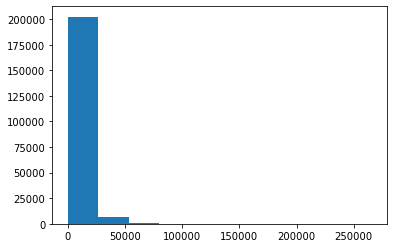

In [121]:
plt.hist(df.daily_decr30);

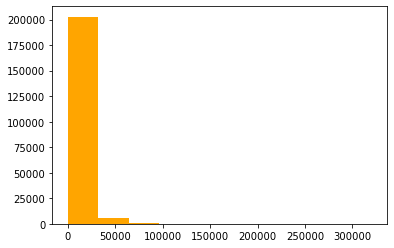

In [122]:
plt.hist(df.daily_decr90,color='orange');

In [123]:
# lets get the values over 50000

In [124]:
df[df.daily_decr90 > 50000]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
131         1  91716I90841   365.0  44836.000000     52266.890   6394.29   
202         1  60002I84456  2058.0  39557.000000     54218.950  20929.48   
211         1  94452I70376   311.0  50300.121667     50425.730   6876.70   
214         1  00180I82736   999.0  46992.000000     55642.080  11529.63   
280         1  92786I91190   515.0  52099.000000     53448.350   4338.36   
...       ...          ...     ...           ...           ...       ...   
209218      1  89841I84457   174.0  70815.841333     71078.724  10084.96   
209227      1  16815I90587   931.0  32598.000000     65449.580   5801.49   
209278      1  00575I85349   165.0  36800.000000     58127.000   4903.20   
209298      1  89681I70379   339.0  44066.000000     59686.790   6876.45   
209347      1  79103I82730   258.0  50652.000000     69834.960  17807.12   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
131      8163.82                1.0                0.0              2309   
202     30084.10                1.0                0.0               770   
211      8651.45                4.0                0.0              8000   
214     20950.63                2.0                0.0              2309   
280      5826.66                1.0                0.0              3178   
...          ...                ...                ...               ...   
209218  12933.26                3.0               26.0              8000   
209227   4839.56                1.0                0.0               770   
209278   8794.78                2.0                0.0              1539   
209298  13617.11                1.0                0.0              1539   
209347  20460.38                1.0                0.0               770   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
131                13           2.0            28775.0                2309.0   
202                15           1.0            38814.0                1539.0   
211                 9           4.0            54641.0                8000.0   
214                 6           0.0            34453.0                4048.0   
280                17           1.0            52191.0                3178.0   
...               ...           ...                ...                   ...   
209218             23           1.0           102033.0                4048.0   
209227             10           0.0            20107.0                 770.0   
209278             30           1.0            36173.0                1539.0   
209298             26           1.0            44931.0                1539.0   
209347             11           1.0            20010.0                1539.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
131                    26.00             34             2              81144   
202                    77.00             26             1              65483   
211                   100.50             15             4              67065   
214                  3282.00             12             0              68044   
280                   362.60             30             1              82238   
...                      ...            ...           ...                ...   
209218                 29.50             32             1             130638   
209227                868.31             19             6             108598   
209278                 44.00             75             1              87817   
209298                381.00             50             1              81875   
209347                148.00             16             1              28476   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
131                   2309.0                 26.00            0.0   
202                   1539.0                 76.00            0.0   
211                   2320.0                136.50   

* there are around 200 samples in the dataset who has average per month usage over 50000 units

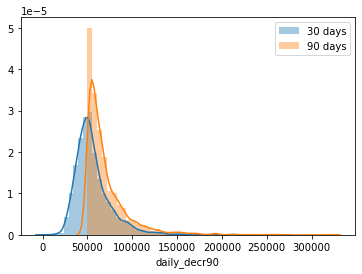

In [125]:
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr30'],label = '30 days')
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr90'], label = '90 days')
plt.legend()

In [126]:
# data will would loose
sample_loss = len(df[df.daily_decr90 > 50000])
sample_loss

2091

In [127]:
#loss percentage
sample_loss / len(df) * 100

0.9976478222078028

* ~ around 1% of data will be lost if these are removed.

In [128]:
# rental30 

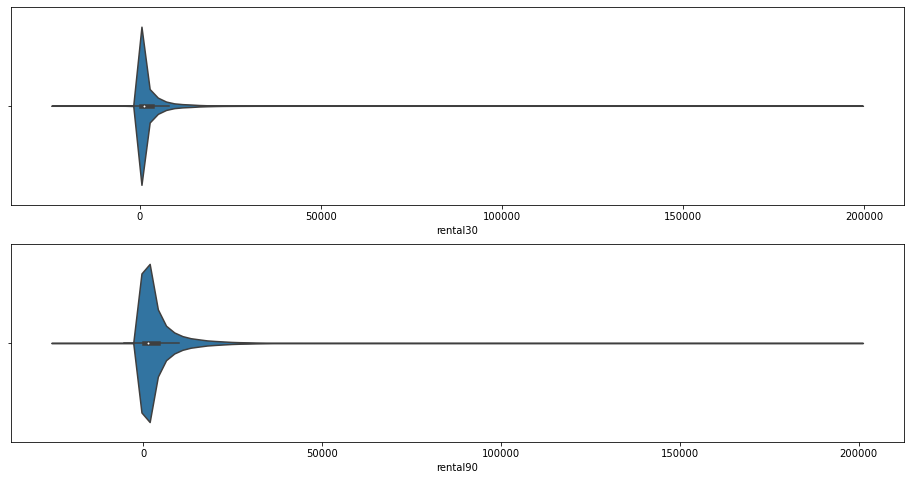

In [129]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(df.rental30)

fig.add_subplot(212)
sns.violinplot(df.rental90)

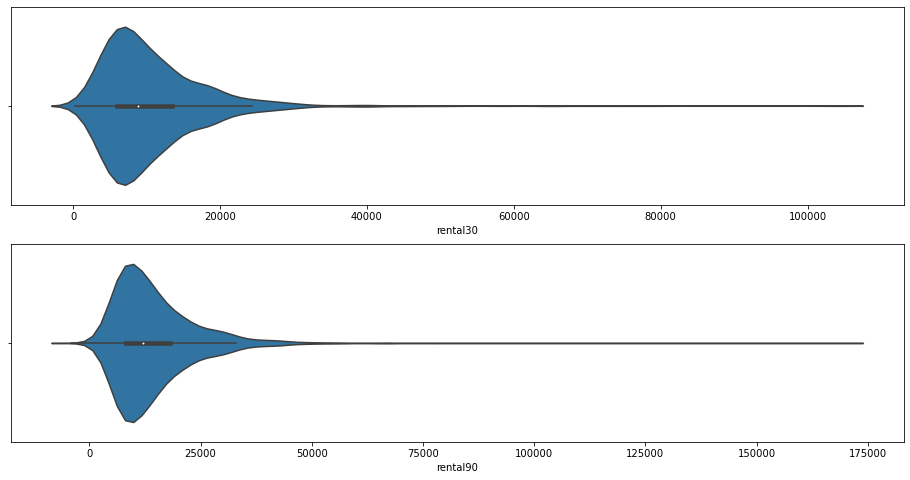

In [130]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(df[df.daily_decr90 > 50000].rental30)

fig.add_subplot(212)
sns.violinplot(df[df.daily_decr90 > 50000].rental90)

* we can infer that those 2000 customers are a potential anomaly for the dataset.
* We shall hold a more strong evidence of these 2000 customer are potentials outliers, and then remove this 1 percent of the data from the dataset.

In [131]:
# number of days since last recharge (in main account and data account)

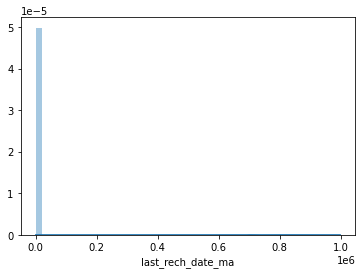

In [132]:
sns.distplot(df.last_rech_date_ma)

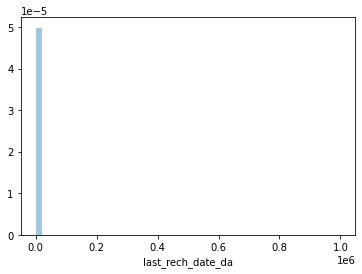

In [133]:
sns.distplot(df.last_rech_date_da)

In [134]:
df.last_rech_date_ma.describe()

count    209593.000000
mean       3755.847800
std       53905.892230
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

In [135]:
df.last_rech_date_da.describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

In [136]:
# let's get the last 1 quantile of the data for main

In [137]:
q = df.last_rech_date_ma.quantile(0.99)

In [138]:
df[df.last_rech_date_ma > q]

label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
31          1  70130I90843  -42.0      8.864333      8.864333    780.71   
54          1  09561I70374  635.0      5.500000      5.500000     75.90   
107         0  15429I84458   72.0     13.590000     13.590000      0.00   
160         1  84667I85348  415.0   9507.542667   9622.480000    418.58   
234         1  29143I95202  211.0      0.640000      0.640000    227.60   
...       ...          ...    ...           ...           ...       ...   
209467      1  59525I88698  190.0   2601.750000   2622.100000   -334.62   
209502      1  54642I70787  460.0     55.520000     55.520000    877.40   
209522      1  25171I84457  281.0   1704.000000   1795.070000      0.00   
209534      0  41672I95204  168.0     15.400000     15.400000    922.20   
209537      1  94993I70785  427.0   5887.000000   5942.360000      0.00   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
31        780.71      780195.497093                0.0               773   
54         75.90      559958.753409                0.0               173   
107         0.00          64.000000                0.0               773   
160      -239.39      835708.591971                0.0              1924   
234       227.60      942339.085159                0.0                 0   
...          ...                ...                ...               ...   
209467   -441.57      767980.563105                0.0              1539   
209502    877.40      611678.500427                0.0              1539   
209522    180.00          61.000000                0.0              3178   
209534    922.20      590843.121987                0.0              1539   
209537      0.00          64.000000               64.0              9400   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
31                  2          10.0              946.0                 473.0   
54                  0           0.0                0.0                   0.0   
107                 0           0.0                0.0                   0.0   
160                 5           2.0             8081.0                1924.0   
234                 0           0.0                0.0                   0.0   
...               ...           ...                ...                   ...   
209467              4          12.0             6156.0                1539.0   
209502              1           0.0             1539.0                1539.0   
209522              0           0.0                0.0                   0.0   
209534              1           0.0             1539.0                1539.0   
209537              0           0.0                0.0                   0.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
31                       1.8              3            32               2666   
54                       0.0              1             0                173   
107                      0.0              1             0                773   
160                     76.0              6            17               9620   
234                      0.0              0             0                  0   
...                      ...            ...           ...                ...   
209467                 145.5              5            47               7703   
209502                   0.5              2            42               2486   
209522                   0.0              2             1               6356   
209534                   1.0              1             0               1539   
209537                   0.0              1             0               9400   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
31                     773.0                  0.30            0.0   
54                     173.0                 94.47            0.0   
107                    773.0                 20.00            0.0

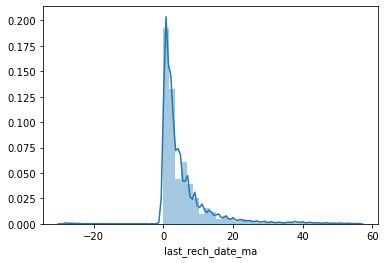

In [139]:
sns.distplot(df[df.last_rech_date_ma < q]['last_rech_date_ma'])

In [140]:
# let's get the last 1 quantile of the data for data

In [141]:
q1 = df.last_rech_date_da.quantile(0.99)

In [142]:
df[df.last_rech_date_da < q1]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4           1  55773I70781   241.0     21.228000     21.228000    159.42   
5           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209592      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
1         260.13                2.0                0.0              1539   
2        3691.26               20.0                0.0              5787   
3         900.13                3.0                0.0              1539   
4         159.42               41.0                0.0               947   
5        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209589   1089.19                1.0                0.0              4048   
209590   1728.36                4.0                0.0               773   
209591   8893.20                3.0                0.0              1539   
209592    984.58                2.0               38.0               773   
209593    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1                   2          21.0             3078.0                1539.0   
2                   1           0.0             5787.0                5787.0   
3                   1           0.0             1539.0                1539.0   
4                   0           0.0                0.0                   0.0   
5                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209589              3           2.0            10404.0                3178.0   
209590              4           1.0             3092.0                 773.0   
209591              5           8.0             9334.0                1539.0   
209592              5           4.0            12154.0                 773.0   
209593              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                       7.50              2            21               3078   
2                      61.04              1             0               5787   
3                      66.32              1             0               1539   
4                       0.00              1             0                947   
5                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209589                 91.81              3             2              10404   
209590                161.30              6             2               4038   
209591                 51.13             11             5              18592   
209592                164.00              6             4              17941   
209593                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
1                     1539.0                  7.50            0.0   
2                     5787.0                 61.04            0.0   
3                     1539.0                 66.32   

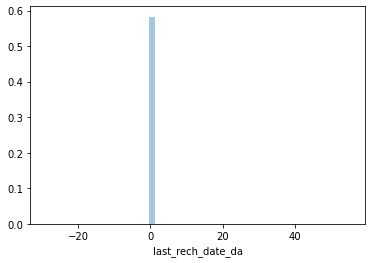

In [143]:
sns.distplot(df[df.last_rech_date_da < q1]['last_rech_date_da'])

* We can see that most of the users have the last recharge for data as 0 days

In [144]:
df[df.last_rech_date_da == 0]#['cnt_da_rech90'].unique()

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4           1  55773I70781   241.0     21.228000     21.228000    159.42   
5           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  19900I95200   239.0  14678.000000  14704.900000  12935.26   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
1         260.13                2.0                0.0              1539   
2        3691.26               20.0                0.0              5787   
3         900.13                3.0                0.0              1539   
4         159.42               41.0                0.0               947   
5        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209588  16775.60                8.0                0.0              3178   
209589   1089.19                1.0                0.0              4048   
209590   1728.36                4.0                0.0               773   
209591   8893.20                3.0                0.0              1539   
209593    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1                   2          21.0             3078.0                1539.0   
2                   1           0.0             5787.0                5787.0   
3                   1           0.0             1539.0                1539.0   
4                   0           0.0                0.0                   0.0   
5                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209588              3           3.0            12143.0                3178.0   
209589              3           2.0            10404.0                3178.0   
209590              4           1.0             3092.0                 773.0   
209591              5           8.0             9334.0                1539.0   
209593              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                       7.50              2            21               3078   
2                      61.04              1             0               5787   
3                      66.32              1             0               1539   
4                       0.00              1             0                947   
5                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                914.00              5            17              14455   
209589                 91.81              3             2              10404   
209590                161.30              6             2               4038   
209591                 51.13             11             5              18592   
209593                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
1                     1539.0                  7.50            0.0   
2                     5787.0                 61.04            0.0   
3                     1539.0                 66.32   

In [145]:
df[df.last_rech_date_da == 0]['cnt_da_rech90'].unique()

array([0, 1], dtype=int64)

In [146]:
x=df[((df.last_rech_date_da == 0) & (df.cnt_da_rech90 == 0) & (df.fr_da_rech90 == 0))]

In [147]:
x

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4           1  55773I70781   241.0     21.228000     21.228000    159.42   
5           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  19900I95200   239.0  14678.000000  14704.900000  12935.26   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
1         260.13                2.0                0.0              1539   
2        3691.26               20.0                0.0              5787   
3         900.13                3.0                0.0              1539   
4         159.42               41.0                0.0               947   
5        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209588  16775.60                8.0                0.0              3178   
209589   1089.19                1.0                0.0              4048   
209590   1728.36                4.0                0.0               773   
209591   8893.20                3.0                0.0              1539   
209593    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1                   2          21.0             3078.0                1539.0   
2                   1           0.0             5787.0                5787.0   
3                   1           0.0             1539.0                1539.0   
4                   0           0.0                0.0                   0.0   
5                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209588              3           3.0            12143.0                3178.0   
209589              3           2.0            10404.0                3178.0   
209590              4           1.0             3092.0                 773.0   
209591              5           8.0             9334.0                1539.0   
209593              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                       7.50              2            21               3078   
2                      61.04              1             0               5787   
3                      66.32              1             0               1539   
4                       0.00              1             0                947   
5                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                914.00              5            17              14455   
209589                 91.81              3             2              10404   
209590                161.30              6             2               4038   
209591                 51.13             11             5              18592   
209593                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
1                     1539.0                  7.50            0.0   
2                     5787.0                 61.04            0.0   
3                     1539.0                 66.32   

In [148]:
len(x)

202860

In [149]:
# let's get the people have a data account.

In [150]:
df[((df.last_rech_date_da != 0) & (df.cnt_da_rech90 != 0) & (df.fr_da_rech90 != 0))]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
454         1  50442I95202   127.0   5488.006000   5513.084667   4389.15   
866         1  24988I88648  1382.0   1624.816667   1654.450000   4115.28   
926         0  35846I70786   544.0   5383.128000   5430.317333  12472.59   
935         1  14755I84451  1713.0   3288.523333   3323.570000  17215.35   
2507        1  17921I70374   417.0    841.949333    852.514667   5353.14   
...       ...          ...     ...           ...           ...       ...   
208596      1  37536I70781   631.0  37099.794333  37285.383000   7341.04   
208677      1  31171I88649  1170.0   7293.340000   7311.820000   8400.68   
209112      1  28011I83939   515.0   7310.464000   7321.458667   4181.87   
209160      1  10839I89230   542.0  17301.901333  17407.704000  13027.18   
209218      1  89841I84457   174.0  70815.841333  71078.724000  10084.96   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
454      4160.53                5.0                8.0               770   
866      5465.16                2.0               19.0               770   
926     14278.59                1.0               19.0              1539   
935     18499.71                1.0               12.0               770   
2507     7686.38               14.0               14.0               770   
...          ...                ...                ...               ...   
208596   6875.68               12.0               10.0              4048   
208677   9103.90                5.0               16.0              1539   
209112   4393.13                1.0               20.0               770   
209160  15072.02                4.0               11.0              1539   
209218  12933.26                3.0               26.0              8000   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
454                 2           0.0             1540.0                 770.0   
866                 3           5.0             3864.0                1547.0   
926                 2          19.0            13413.0                6706.5   
935                 4          16.0             4618.0                1154.5   
2507                1           0.0              770.0                 770.0   
...               ...           ...                ...                   ...   
208596              3          11.0            24048.0               10000.0   
208677              3           9.0             5002.0                1539.0   
209112              5           8.0             5402.0                 773.0   
209160             17           2.0            23856.0                1539.0   
209218             23           1.0           102033.0                4048.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
454                   391.00              2             0               1540   
866                    89.00              7             5               8504   
926                     1.75              3            18              18330   
935                    65.00              8             4              10005   
2507                   60.00              2            25               1540   
...                      ...            ...           ...                ...   
208596                 75.00              6             2              52048   
208677                 23.03              5            11               8080   
209112                 65.20              6            14               6172   
209160                127.00             26             1              37824   
209218                 29.50             32             1             130638   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
454                    770.0                391.00            2.0   
866                   1547.0                 89.00            2.0   
926                   4917.0                  3.50   

In [151]:
865 / len (df) * 100

0.4127046227688902

* most of the users do not have a data account
* less than 0.5 percent of the customers hava a data account.

In [152]:
# last amount recharged in the main account since last 30 days

In [153]:
df.last_rech_amt_ma

1         1539
2         5787
3         1539
4          947
5         2309
          ... 
209589    4048
209590     773
209591    1539
209592     773
209593    7526
Name: last_rech_amt_ma, Length: 209593, dtype: int64

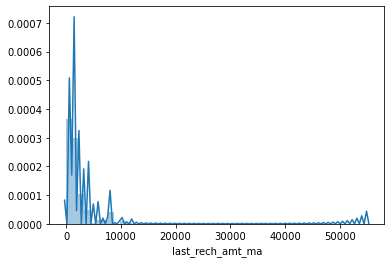

In [154]:
sns.distplot(df.last_rech_amt_ma)

In [155]:
df.last_rech_amt_ma.describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

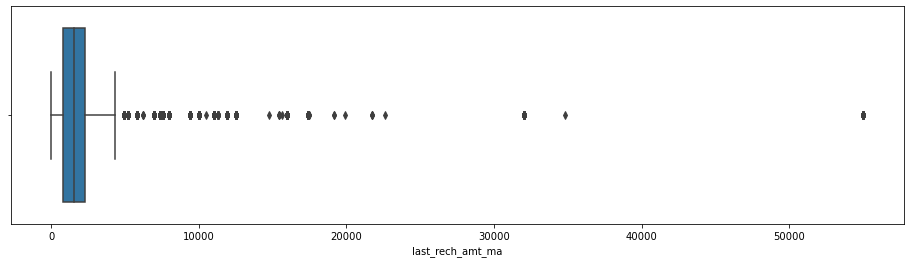

In [156]:
plt.figure(figsize=(16,4))
sns.boxplot(df.last_rech_amt_ma)

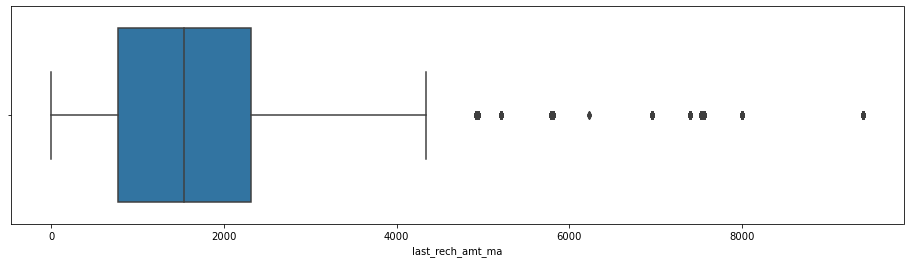

In [157]:
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.boxplot(df[df.last_rech_amt_ma < df.last_rech_amt_ma.quantile(0.99)]['last_rech_amt_ma'])

In [158]:
# number of times the recharge is done in the last 30 days and 90 days

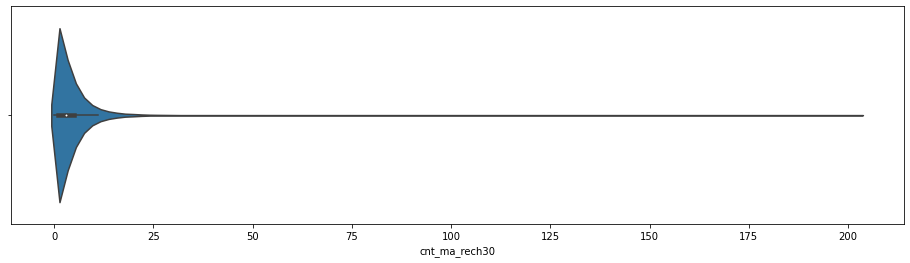

In [159]:
plt.figure(figsize=(16,4))
sns.violinplot(df.cnt_ma_rech30)

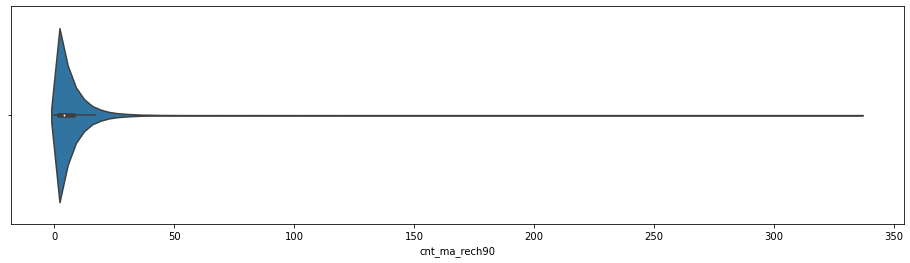

In [160]:
plt.figure(figsize=(16,4))
sns.violinplot(df.cnt_ma_rech90)

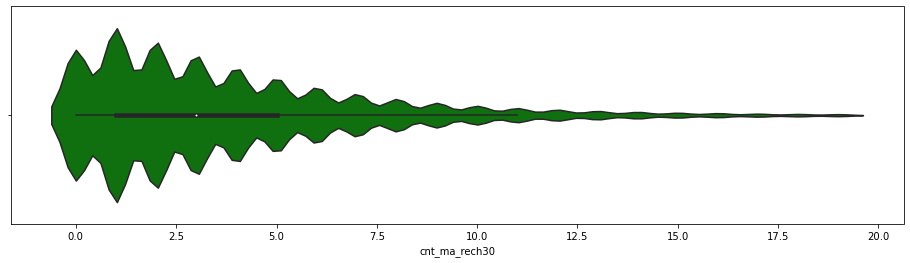

In [161]:
# getting rid of the last 1 qauntile ...
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.violinplot(df[df.cnt_ma_rech30 < df.cnt_ma_rech30.quantile(0.99)]['cnt_ma_rech30'],color='green')

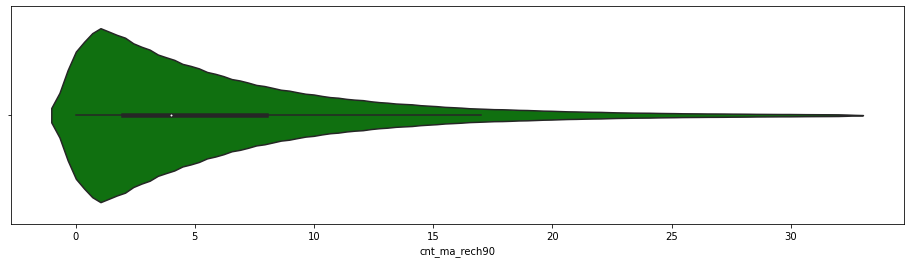

In [162]:
plt.figure(figsize=(16,4))
sns.violinplot(df[df.cnt_ma_rech90 < df.cnt_ma_rech90.quantile(0.99)]['cnt_ma_rech90'],color='green')

* we can note that just getting rid of the last 1 quantile of the data could decrease the skew by a very large margin.
* Also, we can infer that the violin plot of the count of last 90 days looks way more stable than the one with just 30 days.

In [163]:
# number of times te loan is taken by the user in 30 days and 90 days

In [164]:
df.cnt_loans30

1         2
2         1
3         1
4         2
5         7
         ..
209589    2
209590    3
209591    4
209592    2
209593    2
Name: cnt_loans30, Length: 209593, dtype: int64

In [165]:
df.cnt_loans90

1         2.0
2         1.0
3         1.0
4         2.0
5         7.0
         ... 
209589    2.0
209590    3.0
209591    6.0
209592    3.0
209593    2.0
Name: cnt_loans90, Length: 209593, dtype: float64

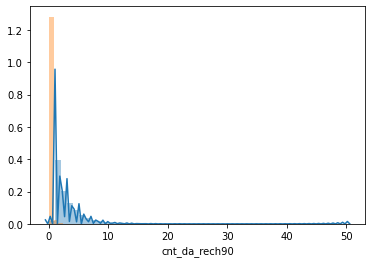

In [166]:
sns.distplot(df.cnt_loans30)
sns.distplot(df.cnt_da_rech90)

In [167]:
# total number of circles

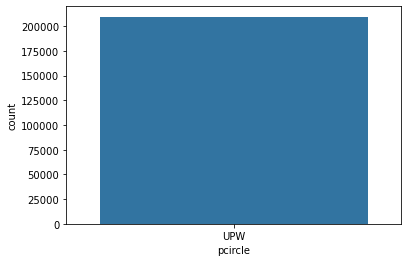

In [168]:
sns.countplot(df.pcircle)

In [169]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

* These users belong to a single circle.p

In [170]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                2.0                0.0              1539              2   
2               20.0                0.0              5787              1   
3                3.0                0.0              1539              1   
4               41.0                0.0               947              0   
5                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1          21.0             3078.0                1539.0   
2           0.0             5787.0                5787.0   
3           0.0             1539.0                1539.0   
4           0.0                0.0                   0.0   
5           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                  7.50              2            21               3078   
2                 61.04              1             0               5787   
3                 66.32              1             0               1539   
4                  0.00              1             0                947   
5                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
1                1539.0                  7.50            0.0           0.0   
2                5787.0                 61.04            0.0           0.0   
3                1539.0                 66.32            0.0           0.0   
4                 947.0                  2.50            0.0           0.0   
5                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1              0             0            2            12              6.0   
2              0             0            1            12             12.0   
3              0             0            1             6              6.0   
4              0             0            2            12              6.0   
5              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
1                 0.0  29.000000  29.000000     UPW  2016-07-20  
2                 0.0   0.000000   0.000000     UPW  2016-08-10  
3                 0.0   0.000000   0.000000     UPW  2016-08-19  
4                 0.0   0.000000   0.000000     UPW  2016-06-06  
5                 0.0   2.333333   2.333333     UPW  2016-06-22

In [171]:
(df.amnt_loans90 / df.cnt_loans90  == df.maxamnt_loans90).value_counts()

True     186503
False     23090
dtype: int64

In [172]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [173]:
df[(df.amnt_loans90 / df.cnt_loans90  != df.maxamnt_loans90)]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
37          1  41249I82731  1578.0  38740.076000      38935.57   4662.68   
38          1  01210I90840   725.0   9740.000000      16337.04    299.96   
45          1  82895I85329   277.0  15617.000000      17973.55   3638.78   
51          1  99293I70785   402.0   1750.000000       1807.37     99.56   
55          1  53152I70789   317.0   9463.000000      10921.38   1000.65   
...       ...          ...     ...           ...           ...       ...   
209587      1  60331I70370   254.0  20079.157333      20228.09   4003.12   
209588      1  19900I95200   239.0  14678.000000      14704.90  12935.26   
209591      1  28556I85350  1013.0  11843.111667      11904.35   5861.83   
209592      1  59712I82733  1732.0  12488.228333      12574.37    411.83   
209593      1  65061I85339  1581.0   4489.362000       4534.82    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
37       5416.68                1.0                0.0              4048   
38       1457.22               15.0               63.0              5787   
45       7819.71                6.0                0.0              2309   
51        189.56                5.0                0.0               770   
55       2820.48                7.0                0.0              1539   
...          ...                ...                ...               ...   
209587   5173.74                2.0                0.0              1539   
209588  16775.60                8.0                0.0              3178   
209591   8893.20                3.0                0.0              1539   
209592    984.58                2.0               38.0               773   
209593    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
37                 10           2.0            29475.0                2309.0   
38                  1           0.0             5787.0                5787.0   
45                  3           5.0             7796.0                2309.0   
51                  1           0.0              770.0                 770.0   
55                  5           2.0             7695.0                1539.0   
...               ...           ...                ...                   ...   
209587              9           4.0            17243.0                1547.0   
209588              3           3.0            12143.0                3178.0   
209591              5           8.0             9334.0                1539.0   
209592              5           4.0            12154.0                 773.0   
209593              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
37                     45.24             20             4              50839   
38                    146.50              6             8              21009   
45                     29.00              6             2              12413   
51                     57.00              2            67               6557   
55                    169.00             16             3              24632   
...                      ...            ...           ...                ...   
209587                 37.00             17             2              33719   
209588                914.00              5            17              14455   
209591                 51.13             11             5              18592   
209592                164.00              6             4              17941   
209593                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
37                    2309.0                 62.74            0.0   
38                    4048.0                131.00            0.0   
45                    1924.0                 56.00   

In [174]:
# sum of main recharge done in the last 30 days

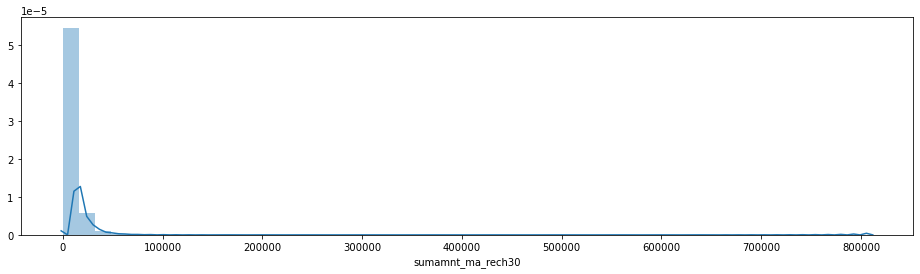

In [175]:
plt.figure(figsize=(16,4))
sns.distplot(df.sumamnt_ma_rech30)

In [176]:
# result after removing the last 1 quantile of the data

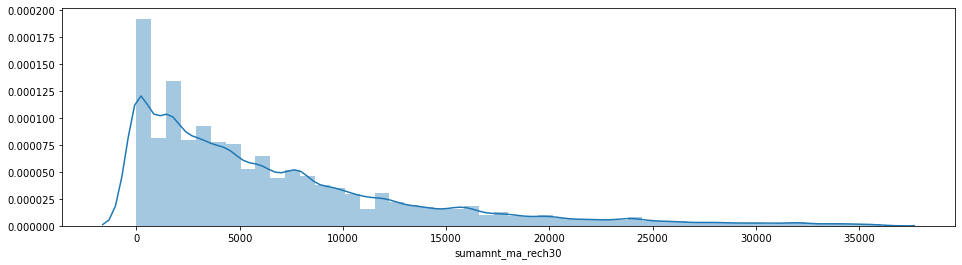

In [177]:
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.distplot(df[df.sumamnt_ma_rech30 < df.sumamnt_ma_rech30.quantile(0.98)]['sumamnt_ma_rech30'])

In [178]:
# max amount loans taken by the users

In [179]:
df.sample(5)

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
125713      1  33663I91197   140.0    292.042667    292.042667   1103.96   
151402      1  13020I89230   725.0  24131.000000  37251.260000   1814.77   
189039      1  61883I82735  1481.0  16806.000000  18400.140000   3163.27   
178322      1  18940I88659  1232.0  13547.336667  13644.010000   1520.03   
55596       1  25786I70782   669.0    675.000000    675.000000      0.00   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
125713   1103.96                1.0                0.0              1547   
151402   3349.18                5.0                0.0              4048   
189039   5086.09                2.0                0.0              2309   
178322   1762.23                7.0                0.0              2309   
55596       0.00                0.0                0.0                 0   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
125713             23           1.0            31290.0                1547.0   
151402              6           3.0            19070.0                3178.0   
189039              7           5.0            12315.0                2309.0   
178322              7           3.0            16163.0                2309.0   
55596               0           0.0                0.0                   0.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
125713                 55.00             23             1              31290   
151402                 25.00             12             3              43447   
189039                 94.45             10             5              16170   
178322                269.91             11             3              29188   
55596                   0.00              0             0                  0   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
125713                1547.0                 55.00            0.0   
151402                3613.0                 32.00            0.0   
189039                1924.0                 99.45            0.0   
178322                2309.0                286.91            0.0   
55596                    0.0                  0.00            0.0   

        fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
125713           0.0              0             0            3            18   
151402           0.0              0             0            3            36   
189039           0.0              0             0            5            36   
178322           0.0              0             0            1             6   
55596            0.0              0             0            1             6   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
125713              6.0                 0.0          3.0            18   
151402             12.0                 0.0          7.0            66   
189039             12.0                 0.0          6.0            42   
178322              6.0                 0.0          1.0             6   
55596               6.0                 1.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90 pcircle  \
125713                6                 0.0   2.333333   2.333333     UPW   
151402               12                 0.0   2.500000   9.714286     UPW   
189039               12                 0.0   2.600000   4.166667     UPW   
178322                6                 0.0   0.000000   0.000000     UPW   
55596                 6                 1.0   0.000000   0.000000     UPW   

             pdate  
125713  2016-06-22  
151402  2016-08-08  
189039  2016-08-06  
178322  2016-07-20  
55596   2016-08-17

In [180]:
df.maxamnt_loans90.value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [181]:
df.maxamnt_loans90.value_counts() / len(df) * 100

6     86.331605
12    12.693649
0      0.974746
Name: maxamnt_loans90, dtype: float64

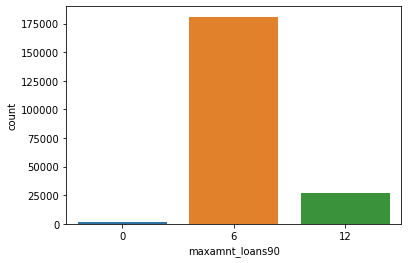

In [182]:
sns.countplot(df.maxamnt_loans90)

* mass percentage (86) of the users prefer the 6 rupiah loans

In [183]:
df.payback90.describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

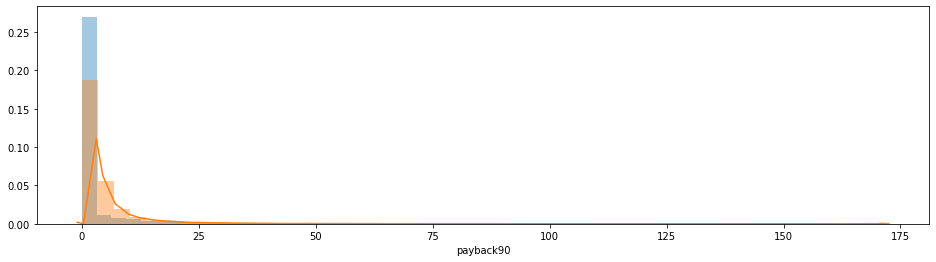

In [184]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.label == 0].payback90)
sns.distplot(df[df.label == 1].payback90)

In [185]:
df[df.label == 0].payback90.sort_values()

104427      0.0
132692      0.0
132685      0.0
132666      0.0
132653      0.0
          ...  
155770    152.0
142811    152.5
89809     153.0
54909     153.5
171391    158.0
Name: payback90, Length: 26162, dtype: float64

In [186]:
## Bivariate Analysis

In [187]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                2.0                0.0              1539              2   
2               20.0                0.0              5787              1   
3                3.0                0.0              1539              1   
4               41.0                0.0               947              0   
5                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1          21.0             3078.0                1539.0   
2           0.0             5787.0                5787.0   
3           0.0             1539.0                1539.0   
4           0.0                0.0                   0.0   
5           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                  7.50              2            21               3078   
2                 61.04              1             0               5787   
3                 66.32              1             0               1539   
4                  0.00              1             0                947   
5                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
1                1539.0                  7.50            0.0           0.0   
2                5787.0                 61.04            0.0           0.0   
3                1539.0                 66.32            0.0           0.0   
4                 947.0                  2.50            0.0           0.0   
5                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1              0             0            2            12              6.0   
2              0             0            1            12             12.0   
3              0             0            1             6              6.0   
4              0             0            2            12              6.0   
5              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
1                 0.0  29.000000  29.000000     UPW  2016-07-20  
2                 0.0   0.000000   0.000000     UPW  2016-08-10  
3                 0.0   0.000000   0.000000     UPW  2016-08-19  
4                 0.0   0.000000   0.000000     UPW  2016-06-06  
5                 0.0   2.333333   2.333333     UPW  2016-06-22

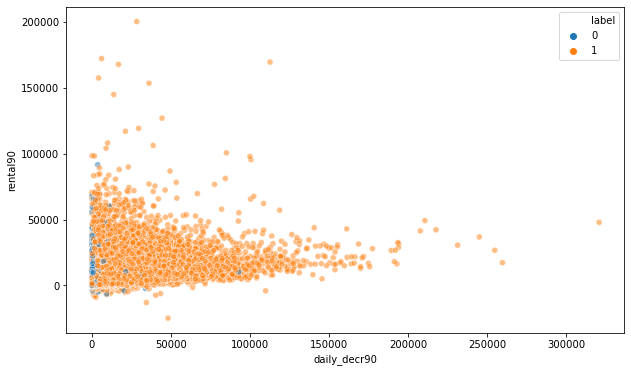

In [188]:
# daily usage vs bal
plt.figure(figsize=(10,6))
sns.scatterplot(df.daily_decr90,df.rental90,hue=df.label,alpha=0.5)

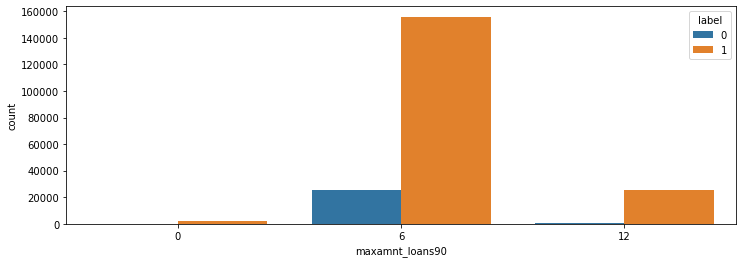

In [189]:
plt.figure(figsize=(12,4))
sns.countplot(df.maxamnt_loans90,hue=df.label)

In [190]:
df.iloc[:,2:-2].head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1                0.0              1539              2          21.0   
2                0.0              5787              1           0.0   
3                0.0              1539              1           0.0   
4                0.0               947              0           0.0   
5                0.0              2309              7           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1             3078.0                1539.0                  7.50   
2             5787.0                5787.0                 61.04   
3             1539.0                1539.0                 66.32   
4                0.0                   0.0                  0.00   
5            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1              2            21               3078                1539.0   
2              1             0               5787                5787.0   
3              1             0               1539                1539.0   
4              1             0                947                 947.0   
5              8             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
1                  7.50            0.0           0.0              0   
2                 61.04            0.0           0.0              0   
3                 66.32            0.0           0.0              0   
4                  2.50            0.0           0.0              0   
5                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1             0            2            12              6.0   
2             0            1            12             12.0   
3             0            1             6              6.0   
4             0            2            12              6.0   
5             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
1                 0.0  29.000000  29.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   0.000000   0.000000  
5                 0.0   2.333333   2.333333

In [191]:
# cluster analysis

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [193]:
from sklearn.cluster import AffinityPropagation,KMeans

In [194]:
cluster_analysis = KMeans(n_clusters=2)

In [195]:
df_cleaned = df.iloc[:,2:-2].copy()   # chck pt 1
df_cleaned['label'] = df.label

In [196]:
df_cleaned.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1                0.0              1539              2          21.0   
2                0.0              5787              1           0.0   
3                0.0              1539              1           0.0   
4                0.0               947              0           0.0   
5                0.0              2309              7           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1             3078.0                1539.0                  7.50   
2             5787.0                5787.0                 61.04   
3             1539.0                1539.0                 66.32   
4                0.0                   0.0                  0.00   
5            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1              2            21               3078                1539.0   
2              1             0               5787                5787.0   
3              1             0               1539                1539.0   
4              1             0                947                 947.0   
5              8             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
1                  7.50            0.0           0.0              0   
2                 61.04            0.0           0.0              0   
3                 66.32            0.0           0.0              0   
4                  2.50            0.0           0.0              0   
5                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1             0            2            12              6.0   
2             0            1            12             12.0   
3             0            1             6              6.0   
4             0            2            12              6.0   
5             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  label  
1                 0.0  29.000000  29.000000      0  
2                 0.0   0.000000   0.000000      1  
3                 0.0   0.000000   0.000000      1  
4                 0.0   0.000000   0.000000      1  
5                 0.0   2.333333   2.333333      1

In [197]:
cluster_analysis.fit(df_cleaned.iloc[:,:-1])

KMeans(n_clusters=2)

In [198]:
cluster_analysis.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
y_hat = cluster_analysis.predict(df_cleaned.iloc[:,:-1])

In [200]:
clusters = np.unique(y_hat)

In [201]:
clusters

array([0, 1])

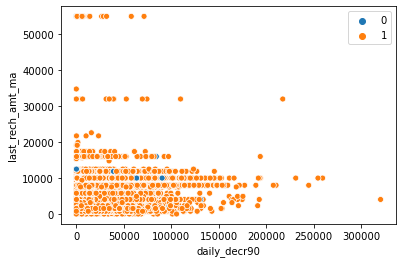

In [202]:
sns.scatterplot(df.daily_decr90,df.last_rech_amt_ma,hue=np.where(cluster_analysis.labels_ == 0,1,0))

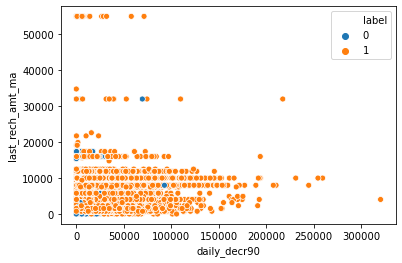

In [203]:
sns.scatterplot(df.daily_decr90,df.last_rech_amt_ma,hue=df.label)

* We can see that the cluster analysis is giving us pretty accurate clusters

## Let's start with detecting some outliers

In [204]:
df_cleaned.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1                0.0              1539              2          21.0   
2                0.0              5787              1           0.0   
3                0.0              1539              1           0.0   
4                0.0               947              0           0.0   
5                0.0              2309              7           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1             3078.0                1539.0                  7.50   
2             5787.0                5787.0                 61.04   
3             1539.0                1539.0                 66.32   
4                0.0                   0.0                  0.00   
5            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1              2            21               3078                1539.0   
2              1             0               5787                5787.0   
3              1             0               1539                1539.0   
4              1             0                947                 947.0   
5              8             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
1                  7.50            0.0           0.0              0   
2                 61.04            0.0           0.0              0   
3                 66.32            0.0           0.0              0   
4                  2.50            0.0           0.0              0   
5                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1             0            2            12              6.0   
2             0            1            12             12.0   
3             0            1             6              6.0   
4             0            2            12              6.0   
5             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  label  
1                 0.0  29.000000  29.000000      0  
2                 0.0   0.000000   0.000000      1  
3                 0.0   0.000000   0.000000      1  
4                 0.0   0.000000   0.000000      1  
5                 0.0   2.333333   2.333333      1

In [205]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   209593 non-null  float64
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  int64  
 8   cnt_ma_rech30         209593 non-null  int64  
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  medianmarechprebal30  209593 non-null  float64
 13  cnt_ma_rech90         209593 non-null  int64  
 14  fr_ma_rech90          209593 non-null  int64  
 15  

* All the features we have are either in the integer from or float form.

In [206]:
# let's detect outliers using the boxplot

In [207]:
# let's see the what are the results after treating the outliers using  z-score

* but first lets remove the geatures that have less than 5 categories

In [208]:
cont_var = []
dis_num_var = []
for col in df_cleaned.columns:
    if len(df_cleaned.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [209]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [210]:
dis_num_var

['medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90', 'label']

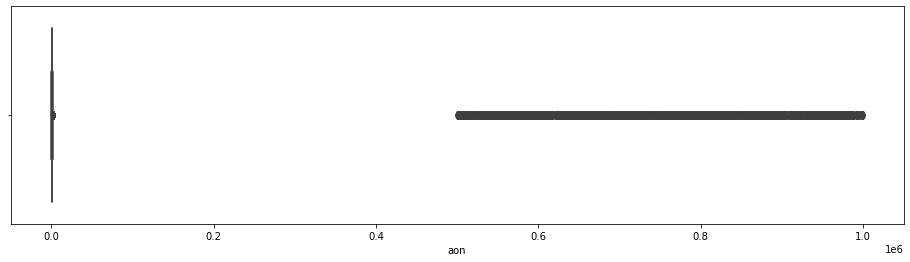

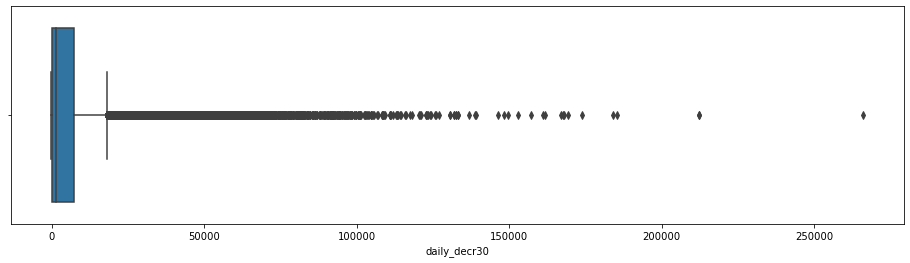

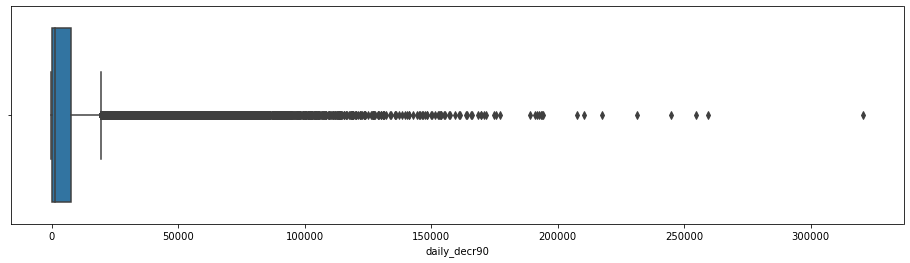

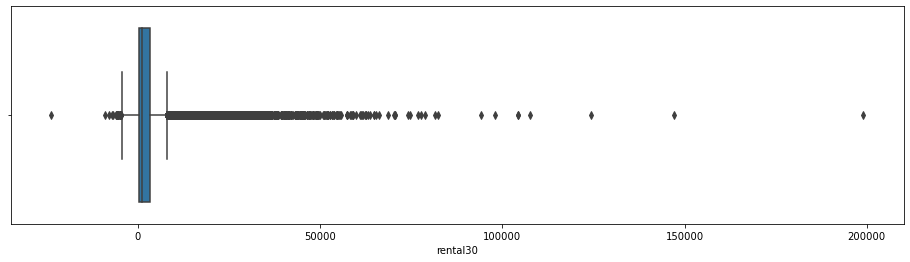

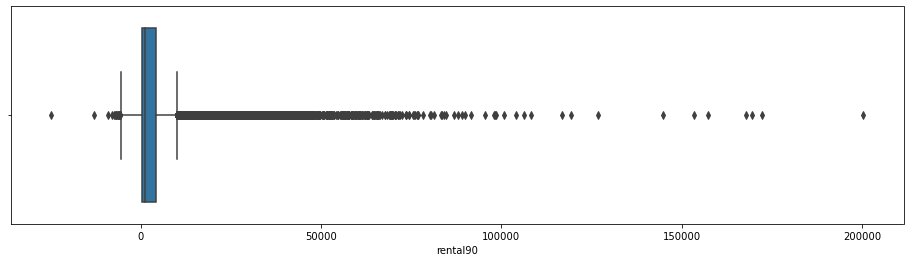

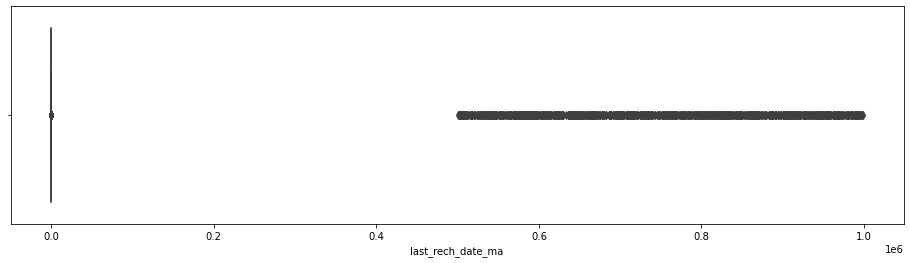

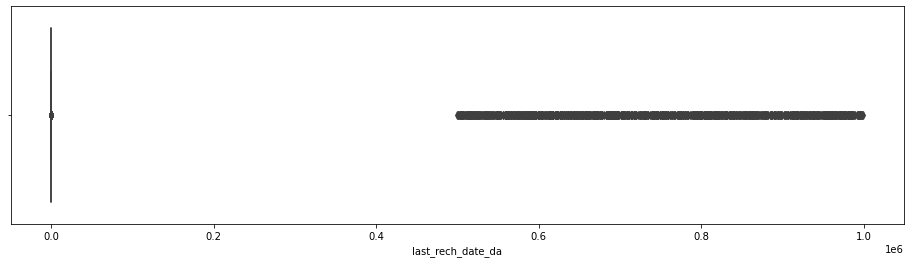

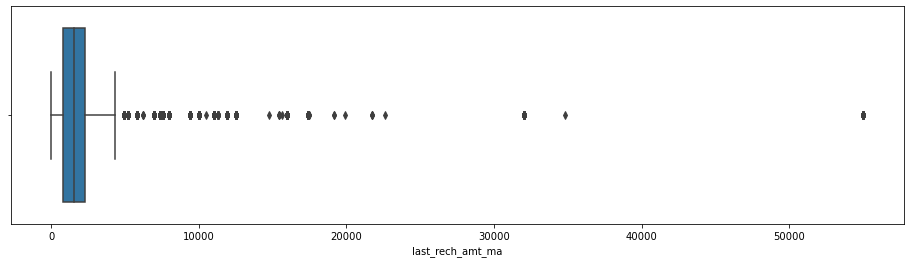

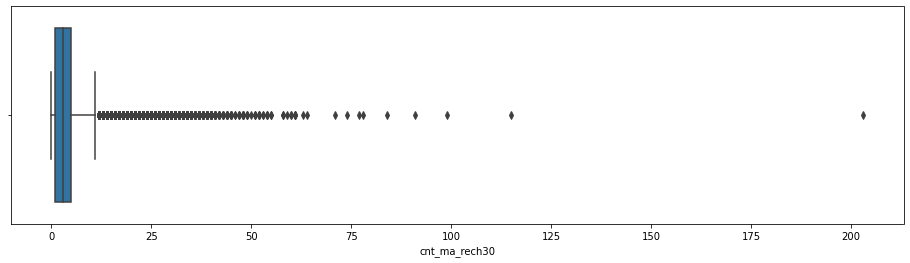

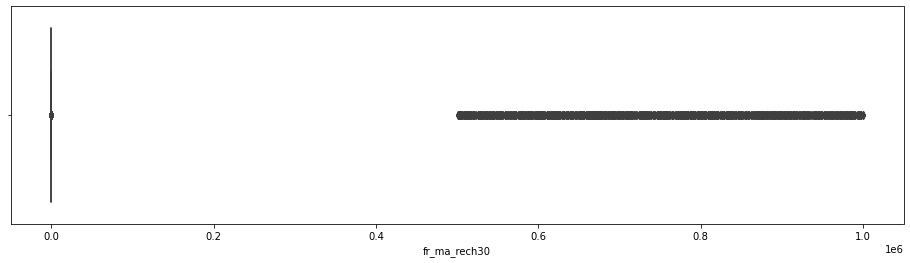

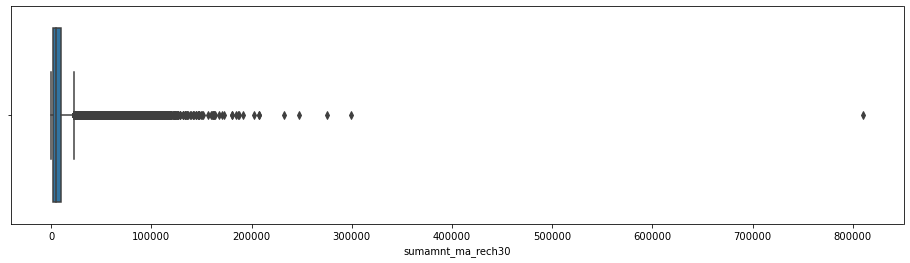

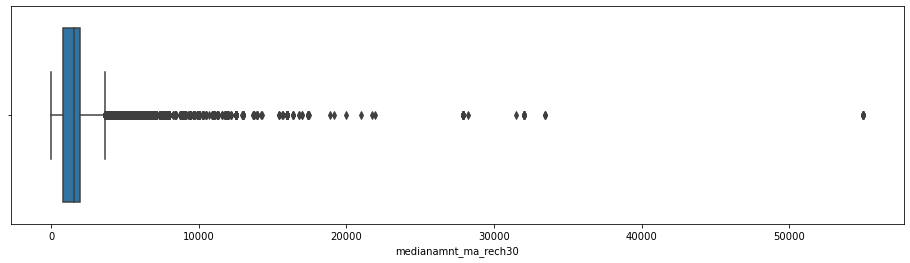

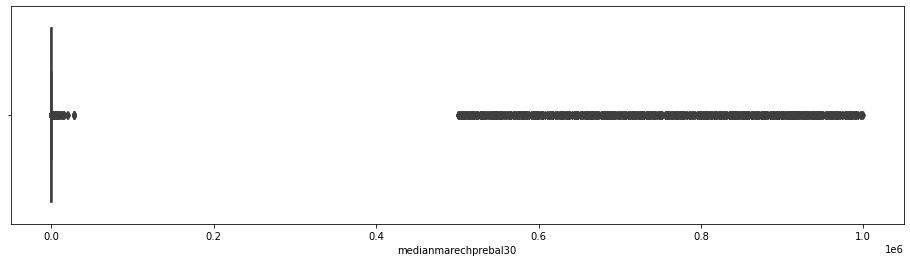

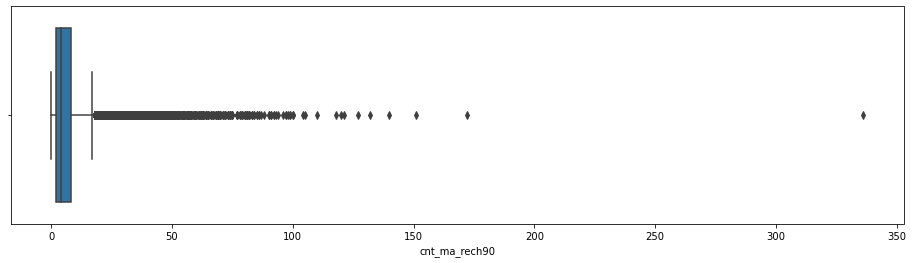

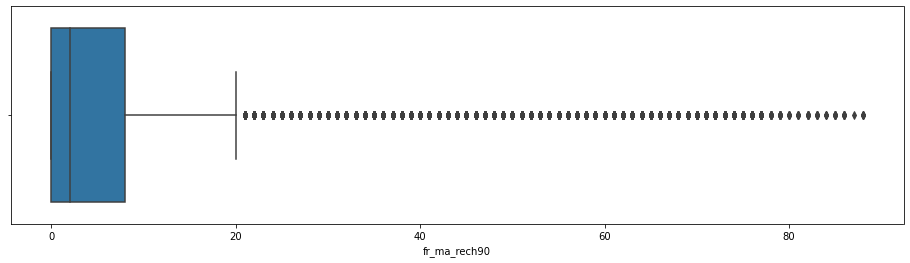

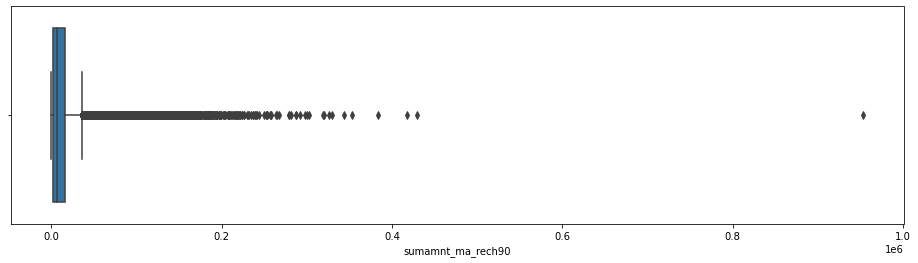

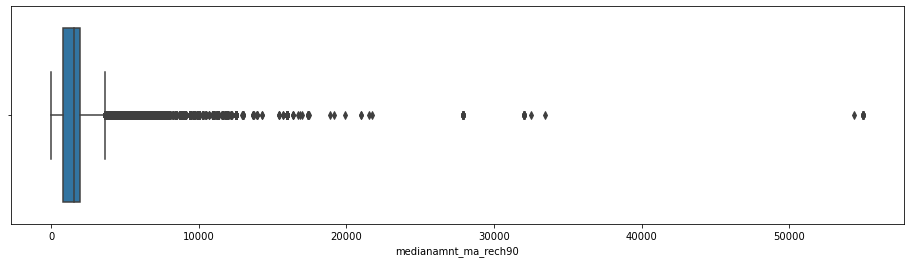

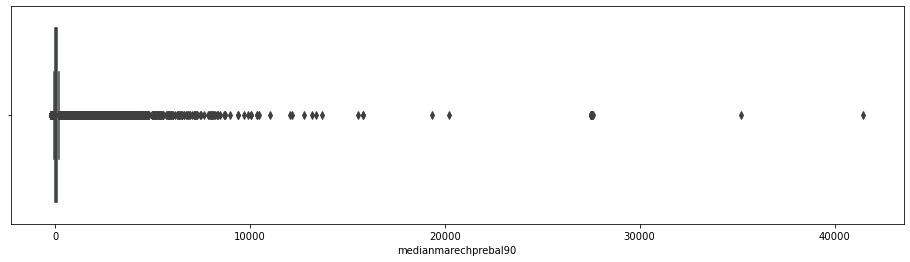

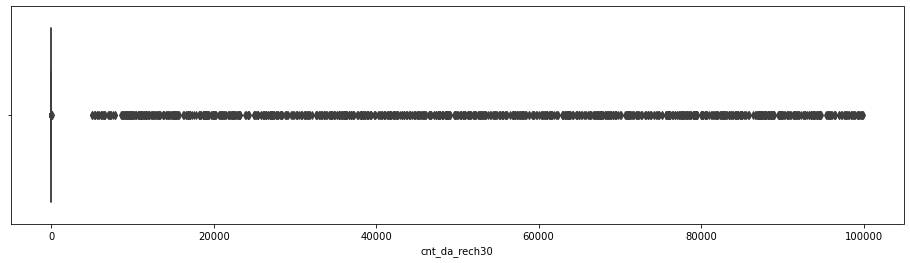

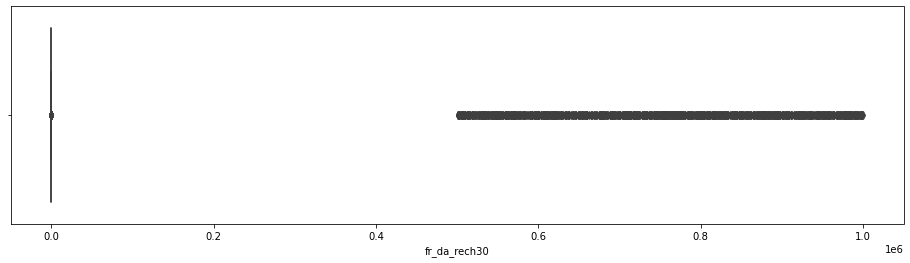

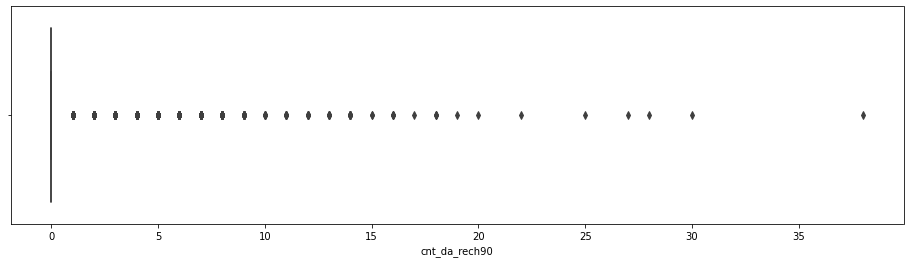

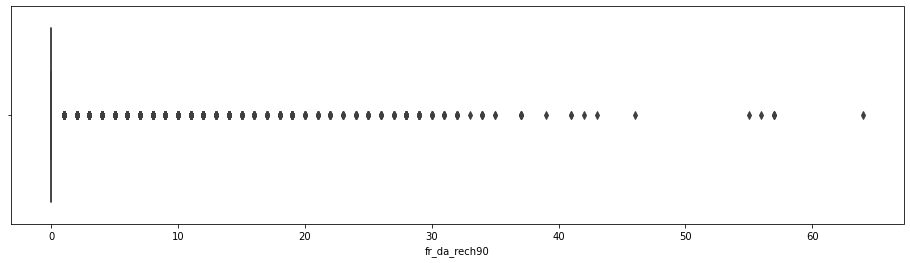

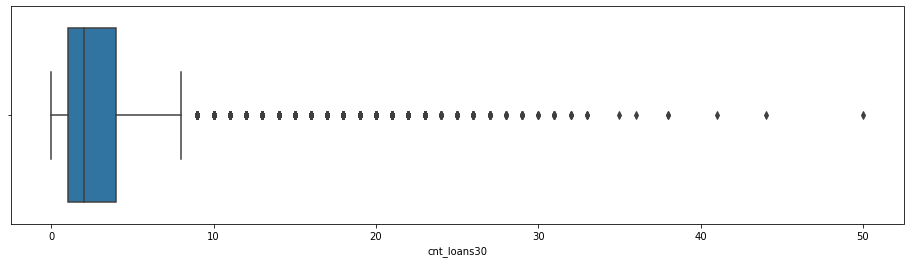

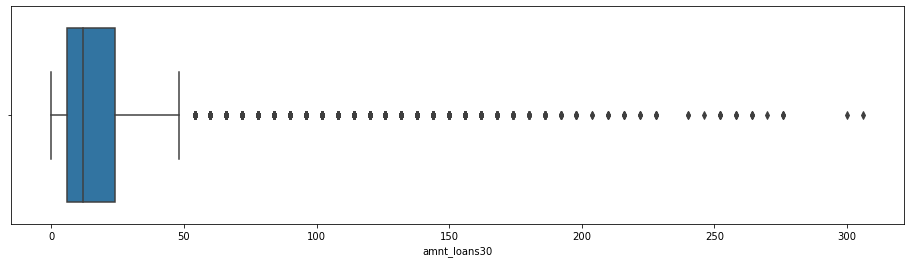

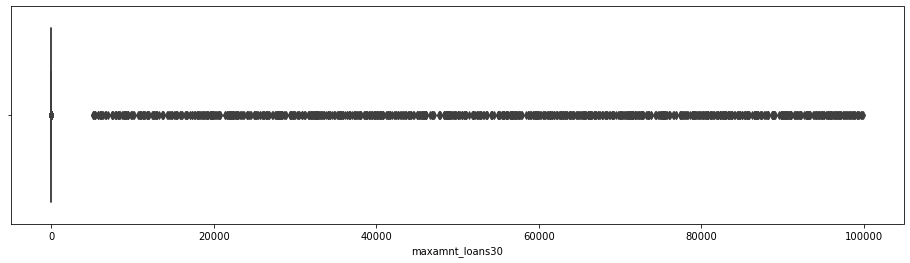

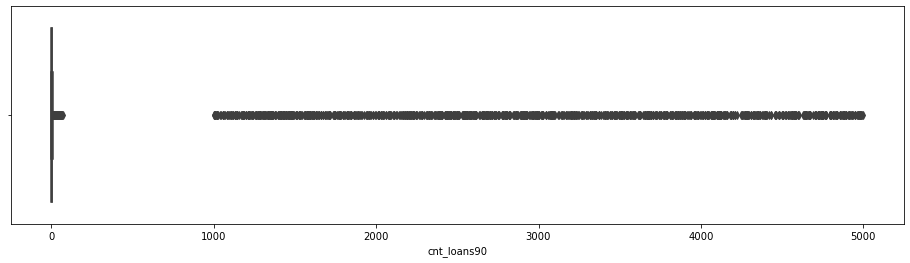

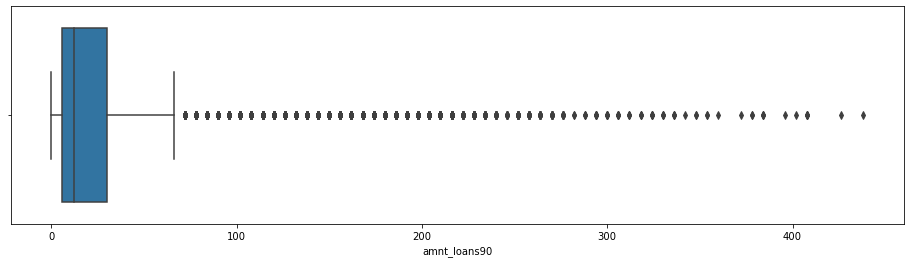

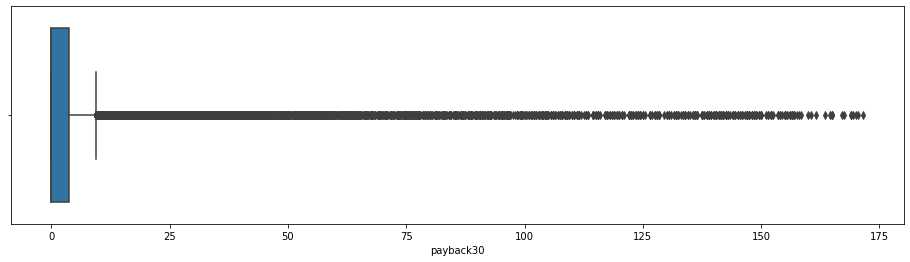

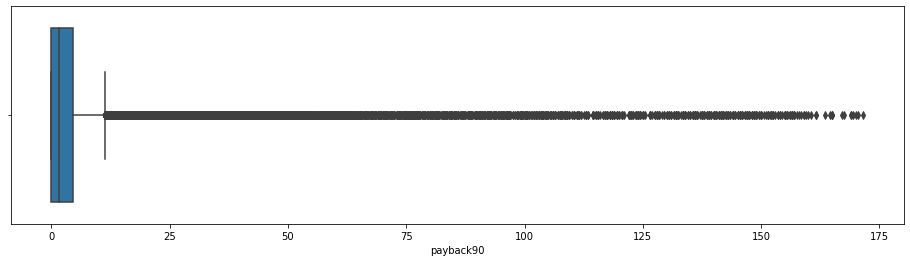

In [211]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.boxplot(df_cleaned[col])

* We can see that almost evey feature in the dataset is hightly skewed.

In [212]:
df_cleaned[cont_var].skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
payback30                8.310695
payback90                6.899951
dtype: float64

In [213]:
# if the maxamnt_loans90 has only 3 values (0,6,12), how come maxamnt_loans_30 have more than 10 values, they are probably outliers , let's check

In [214]:
df_cleaned.maxamnt_loans90.value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [215]:
df_cleaned.maxamnt_loans30.value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [216]:
# yes, these are definitely outliers , let's remove those outliers and put this variable into the dis_num_var variable.

In [217]:
df_cleaned[df_cleaned.maxamnt_loans30 > 20 ]

aon  daily_decr30  daily_decr90  rental30  rental90  \
119     1454.0     19.578667     19.578667    148.88    148.88   
126      811.0    166.796667    166.796667    -44.88    -44.88   
147      198.0  18301.000000  28936.470000   8634.10  11994.34   
370     1737.0     33.000000     33.000000    130.05    130.05   
375      603.0   9970.000000  10770.000000   9343.38  15443.96   
...        ...           ...           ...       ...       ...   
209190  1211.0  16039.000000  18645.190000   8391.52  11936.73   
209263   904.0     96.906667     96.906667   2516.20   2516.20   
209332  1846.0     55.680000     55.680000   1140.16   1140.16   
209393  1639.0     52.031333     52.031333    957.10    957.10   
209425  1246.0    113.715000    113.715000   2229.66   2229.66   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
119                   1.0                0.0               770              4   
126                   4.0                0.0              2309              9   
147                   1.0                0.0              4048              5   
370                   1.0                0.0               773              2   
375                   9.0                0.0               770              9   
...                   ...                ...               ...            ...   
209190                2.0                0.0              1539              5   
209263                5.0                0.0              7526              2   
209332                5.0                0.0              2309              2   
209393                3.0                0.0              1539              6   
209425                1.0                0.0              8000              4   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
119              5.0             3089.0                 773.0   
126              0.0            24442.0                1547.0   
147             11.0            24192.0                4048.0   
370              6.0             2320.0                1160.0   
375              0.0             6930.0                 770.0   
...              ...                ...                   ...   
209190           3.0             8565.0                1539.0   
209263          10.0            15052.0                7526.0   
209332           5.0             4618.0                2309.0   
209393           2.0             4798.0                 771.5   
209425          15.0            14938.0                2314.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
119                    16.20              4             5               3089   
126                   327.60             10             0              25989   
147                   171.00             17             3              88845   
370                    51.50              2             6               2320   
375                   149.40             10             0               7700   
...                      ...            ...           ...                ...   
209190                 60.90             11             8              17207   
209263                200.22              2            10              15052   
209332                 17.76              3            41               6338   
209393                 30.50              6             2               4798   
209425                 38.40              5            34              22338   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
119                    773.0                 16.20            0.0   
126                   1547.0                326.60            0.0   
147                   4048.0                233.00            0.0   
370                   1160.0                 51.50            0.0   
375                    770.0                119.40            0.0   
...                      ...                   ...            ...   
209190              

In [218]:
# drop these 1047 samples
df_cleaned = df_cleaned[df_cleaned.maxamnt_loans30 < 20 ].copy()

In [219]:
cont_var = []
dis_num_var = []
for col in df_cleaned.columns:
    if len(df_cleaned.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [220]:
df_cleaned.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [221]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [222]:
df_cleaned[df_cleaned.maxamnt_loans30 > 20 ]

Empty DataFrame
Columns: [aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, label]
Index: []

In [223]:
z_scores = stats.zscore(df_cleaned.drop('label',1))

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_with_no_outliers = df_cleaned[filtered_entries]

In [224]:
len(df_with_no_outliers)

160511

In [225]:
len(df_cleaned)

208546

In [226]:
(len(df_cleaned) - len(df_with_no_outliers) )/ len(df_cleaned) * 100

23.033287619997505

## `direct removal of outliers is reducing a massive 23% of data which is not affordable.`

## Building the Base Model

In [227]:
# let's build a base model with all the features in it

In [228]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                2.0                0.0              1539              2   
2               20.0                0.0              5787              1   
3                3.0                0.0              1539              1   
4               41.0                0.0               947              0   
5                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1          21.0             3078.0                1539.0   
2           0.0             5787.0                5787.0   
3           0.0             1539.0                1539.0   
4           0.0                0.0                   0.0   
5           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                  7.50              2            21               3078   
2                 61.04              1             0               5787   
3                 66.32              1             0               1539   
4                  0.00              1             0                947   
5                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
1                1539.0                  7.50            0.0           0.0   
2                5787.0                 61.04            0.0           0.0   
3                1539.0                 66.32            0.0           0.0   
4                 947.0                  2.50            0.0           0.0   
5                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1              0             0            2            12              6.0   
2              0             0            1            12             12.0   
3              0             0            1             6              6.0   
4              0             0            2            12              6.0   
5              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
1                 0.0  29.000000  29.000000     UPW  2016-07-20  
2                 0.0   0.000000   0.000000     UPW  2016-08-10  
3                 0.0   0.000000   0.000000     UPW  2016-08-19  
4                 0.0   0.000000   0.000000     UPW  2016-06-06  
5                 0.0   2.333333   2.333333     UPW  2016-06-22

In [229]:
# let's make a X and y split

In [230]:
X = df.iloc[:,2:-2].copy()
y = df.label

In [231]:
X.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1                0.0              1539              2          21.0   
2                0.0              5787              1           0.0   
3                0.0              1539              1           0.0   
4                0.0               947              0           0.0   
5                0.0              2309              7           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1             3078.0                1539.0                  7.50   
2             5787.0                5787.0                 61.04   
3             1539.0                1539.0                 66.32   
4                0.0                   0.0                  0.00   
5            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1              2            21               3078                1539.0   
2              1             0               5787                5787.0   
3              1             0               1539                1539.0   
4              1             0                947                 947.0   
5              8             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
1                  7.50            0.0           0.0              0   
2                 61.04            0.0           0.0              0   
3                 66.32            0.0           0.0              0   
4                  2.50            0.0           0.0              0   
5                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1             0            2            12              6.0   
2             0            1            12             12.0   
3             0            1             6              6.0   
4             0            2            12              6.0   
5             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                 0.0          2.0            12                6   
2                 0.0          1.0            12               12   
3                 0.0          1.0             6                6   
4                 0.0          2.0            12                6   
5                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
1                 0.0  29.000000  29.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   0.000000   0.000000  
5                 0.0   2.333333   2.333333

In [232]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: label, dtype: int64

In [233]:
X.shape,y.shape

((209593, 32), (209593,))

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
# stratified train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101,stratify = y)

In [236]:
def get_split_percentage(X,y):
    return X.join(y).label.value_counts() / len(X) * 100

In [237]:
get_split_percentage(X,y)

1    87.517713
0    12.482287
Name: label, dtype: float64

In [238]:
get_split_percentage(X_train,y_train)

1    87.517977
0    12.482023
Name: label, dtype: float64

In [239]:
get_split_percentage(X_test,y_test)

1    87.517097
0    12.482903
Name: label, dtype: float64

* ! Since we have very much imbalance between the 2 classes, The area under curve might serve as one of the best metric from evaluation

In [240]:
# create a helper function which will help us in evaluationg different alogrithms

In [241]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [243]:
def train_n_ret_score(model):
    model.fit(X_train,y_train)
    return roc_auc_score(y_test,model.predict(X_test)),f1_score(y_test,model.predict(X_test))

In [3]:
# let's importing all the model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [245]:
train_n_ret_score(LogisticRegression())

(0.5775248235956597, 0.9282653283875192)

In [246]:
train_n_ret_score(DecisionTreeClassifier())

(0.7075416779340206, 0.9234391254357308)

In [247]:
train_n_ret_score(RandomForestClassifier()) # best base score model

(0.7127447453139992, 0.9521381245202785)

In [248]:
train_n_ret_score(GaussianNB())

(0.692262030193598, 0.6603287874615357)

## Skew-transformation

* let's try skew transforations and then remove the outliers

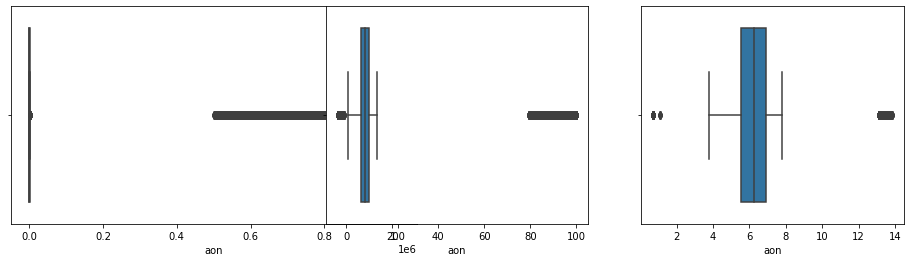

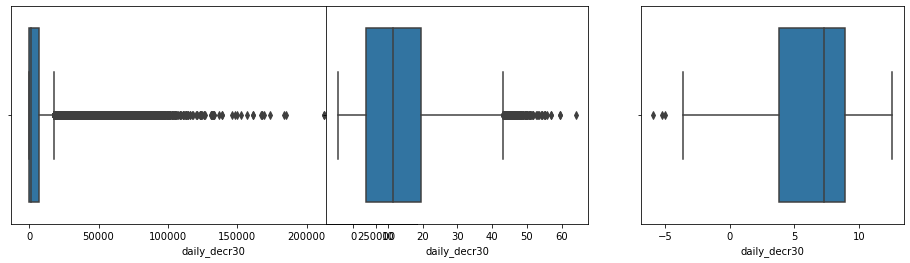

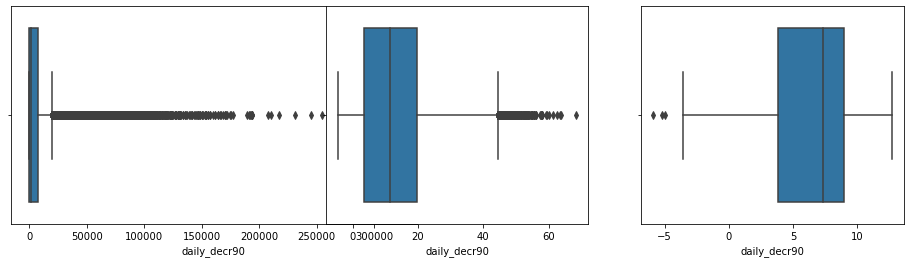

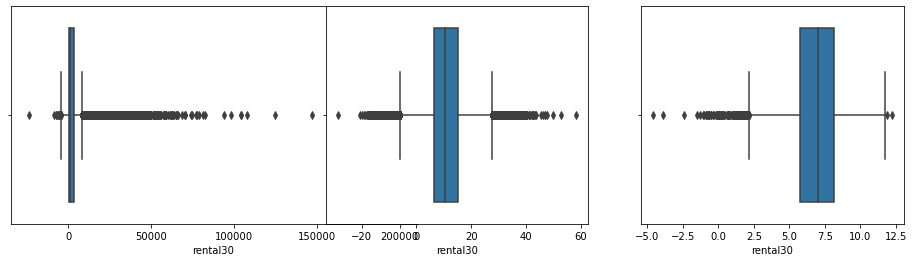

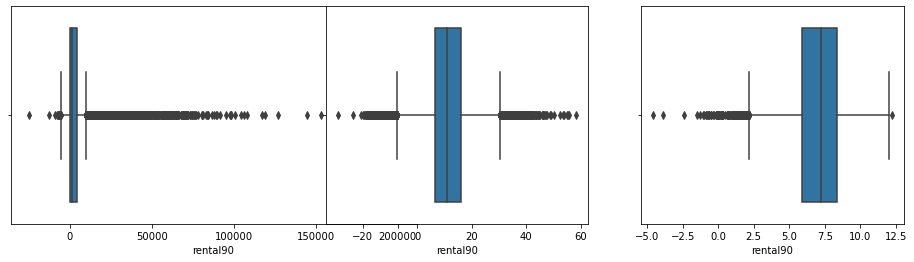

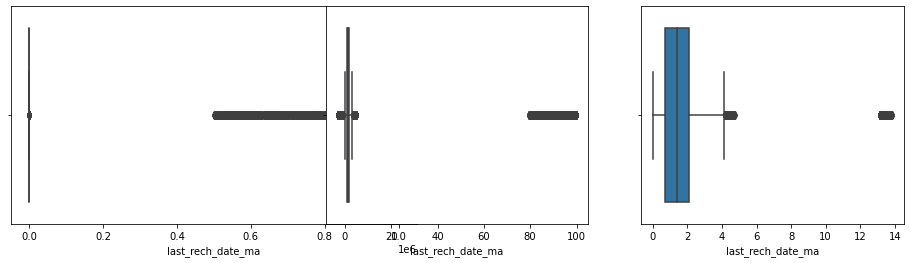

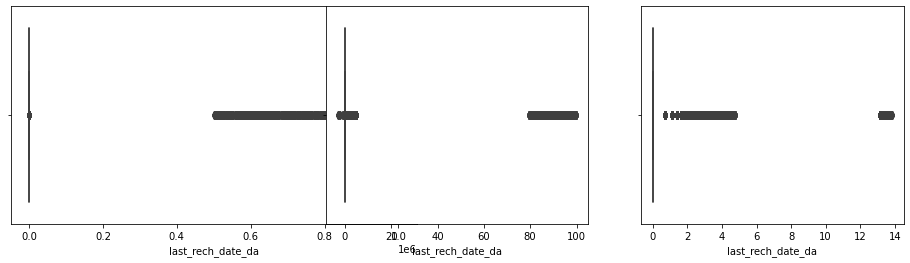

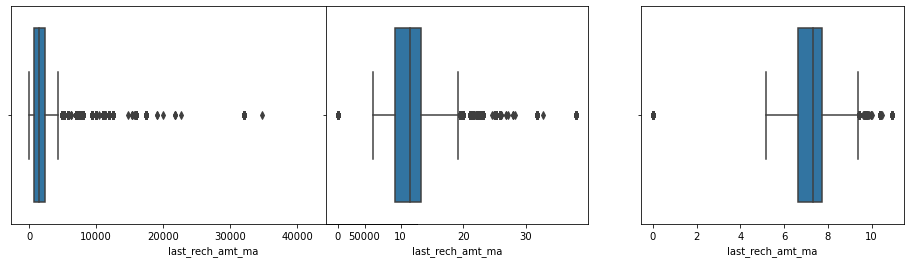

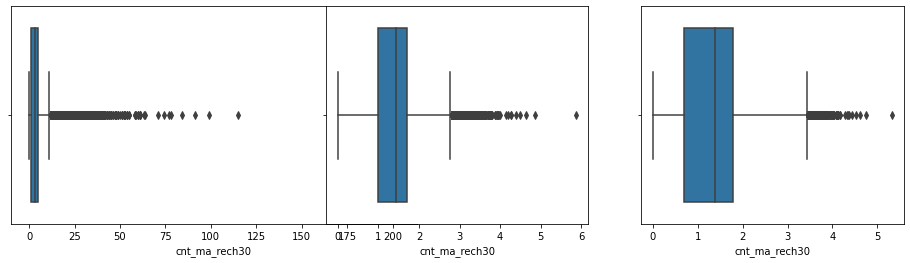

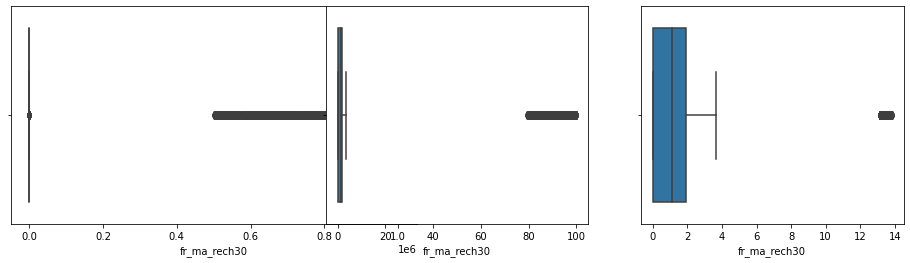

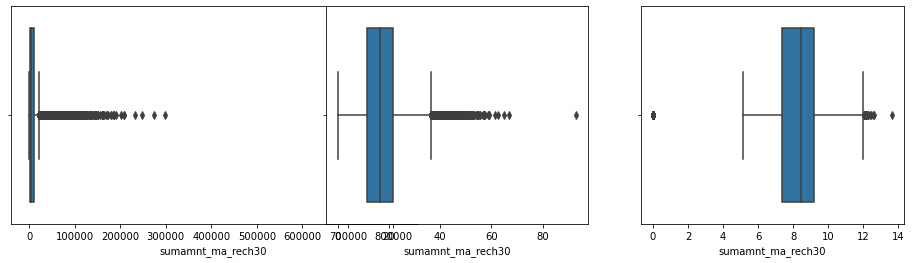

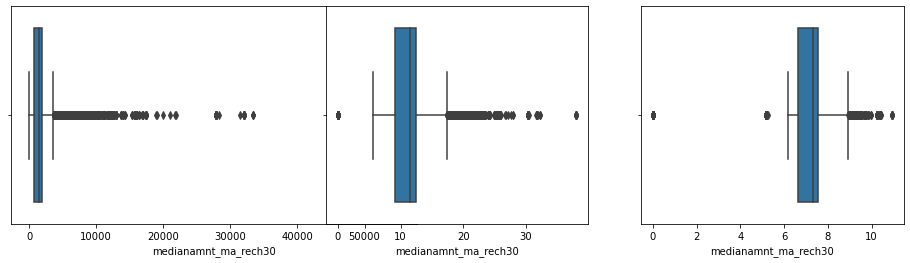

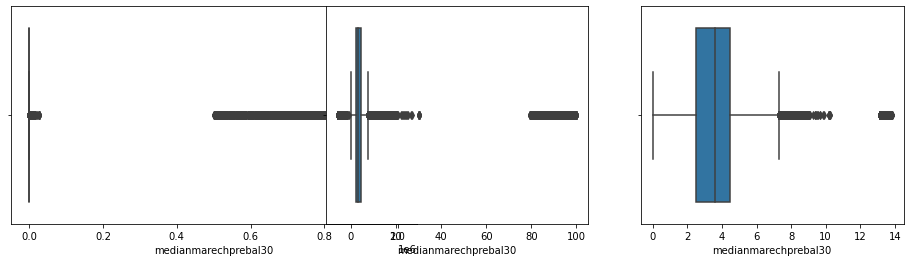

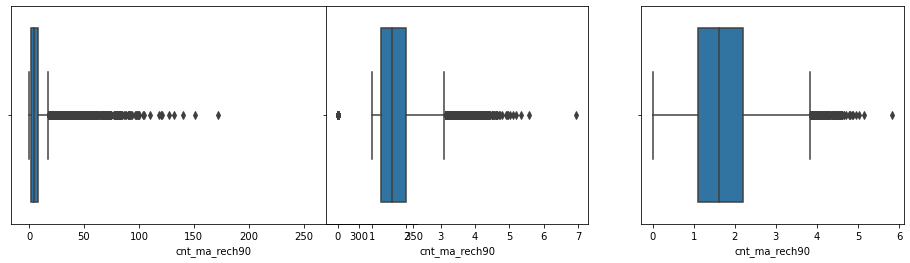

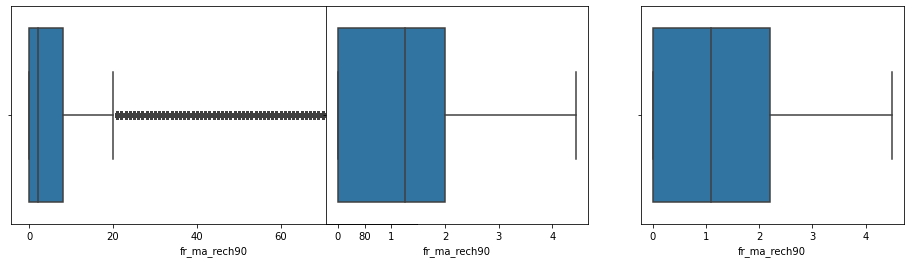

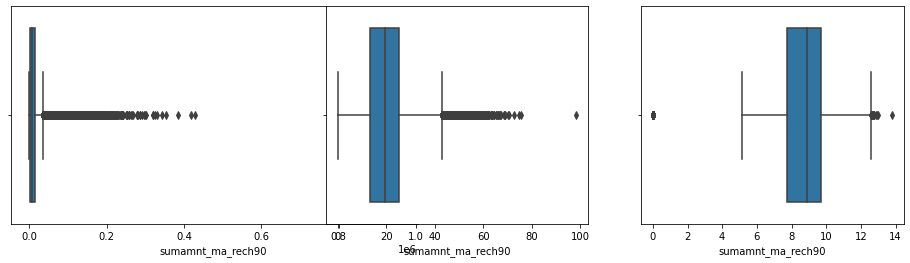

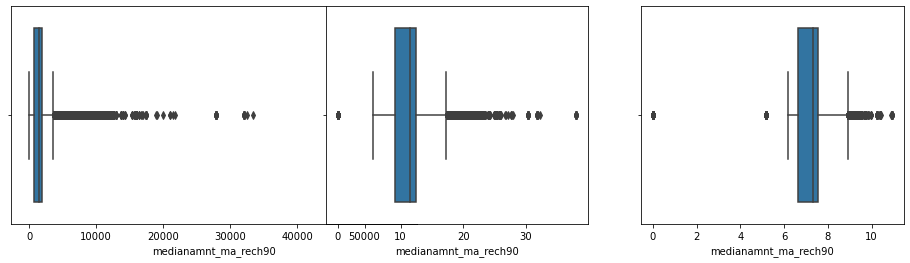

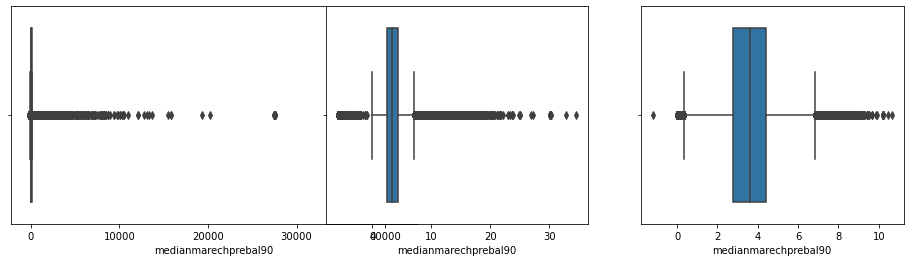

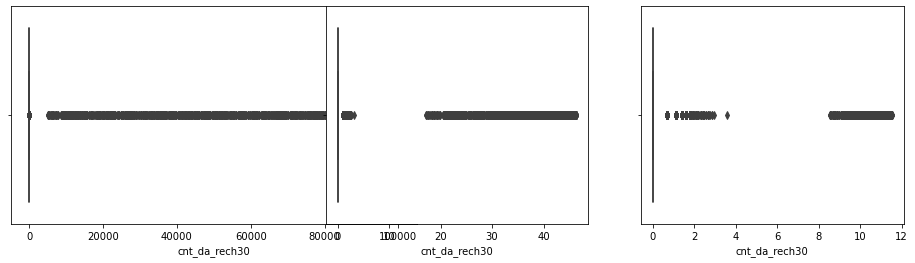

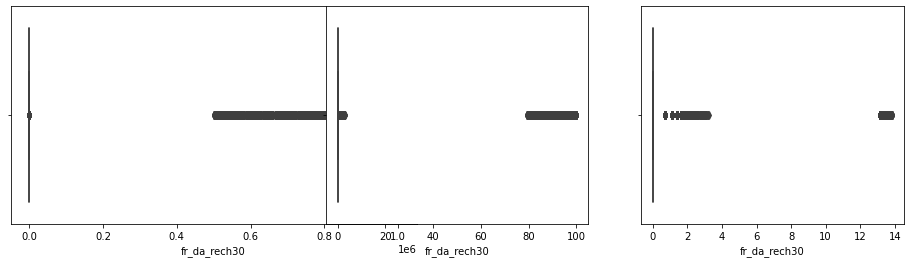

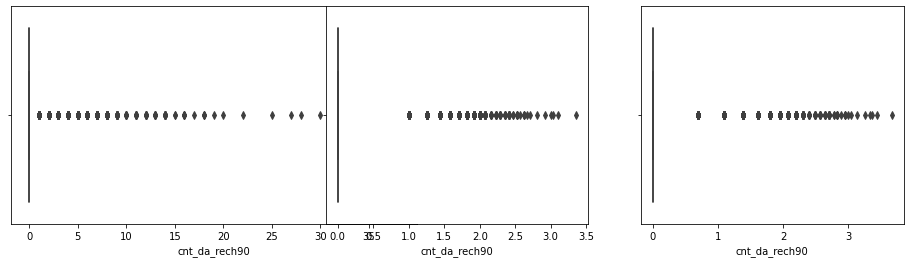

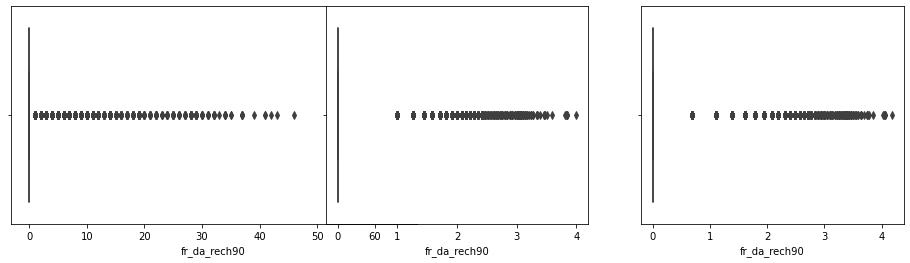

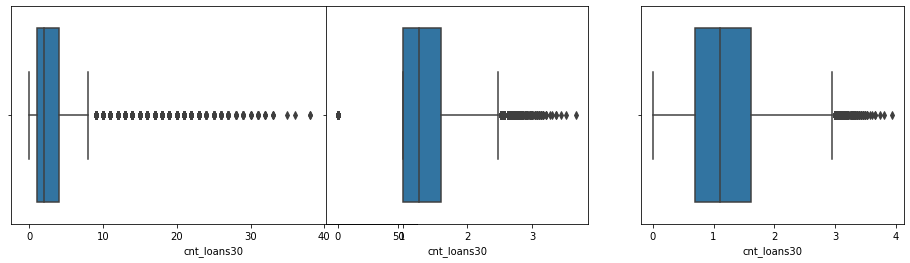

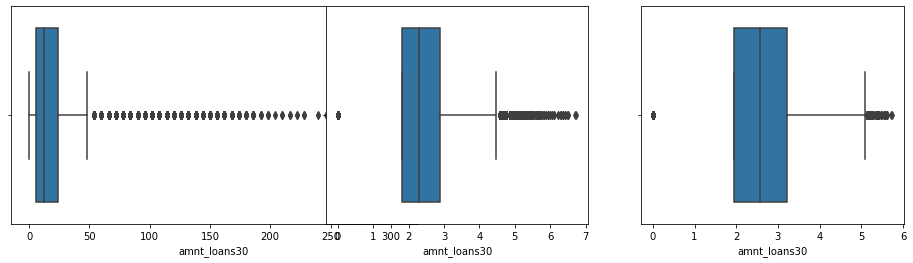

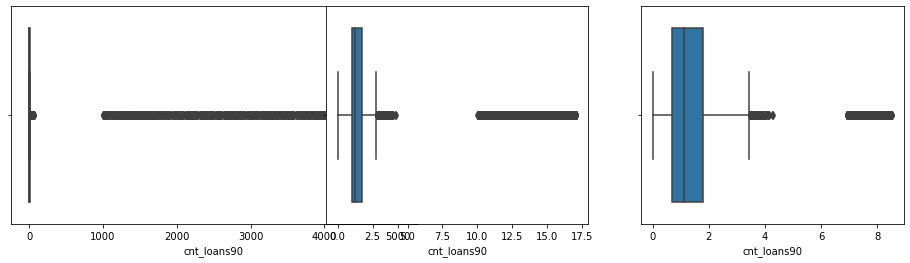

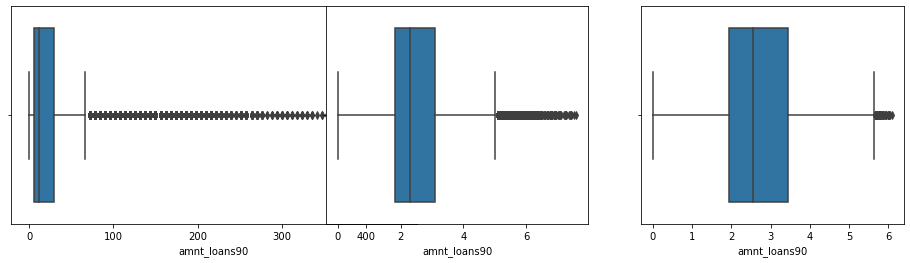

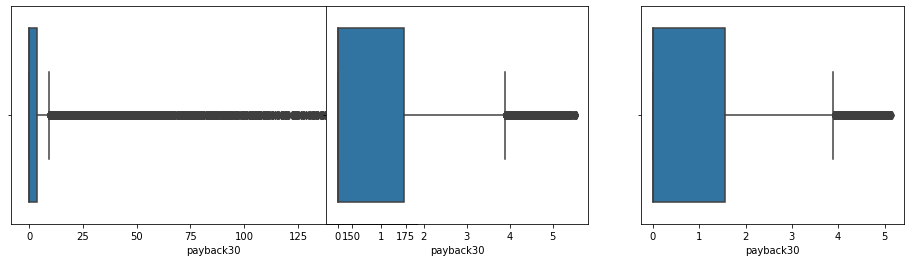

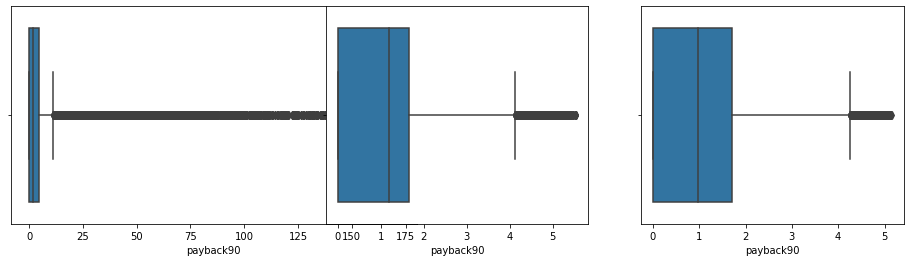

In [1621]:
for col in cont_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.boxplot(df_cleaned[col])
    
    fig.add_subplot(132)
    sns.boxplot(np.cbrt(df_cleaned[col])) 
    
    fig.add_subplot(133)
    sns.boxplot(np.log1p(df_cleaned[col]))  # log transforation is ivalid here as our dataset contains zeros and -ve values # just visualizing and comparing the results with cbrt

In [1622]:
# we can see that the cbrt transformation is working better on this dataset.

In [1623]:
df_new = np.cbrt(df_cleaned[cont_var])  # chck pt 2

In [1624]:
df_new = df_new.join(df_cleaned[dis_num_var])

In [1625]:
df_new.isna().mean()

aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
cnt_loans90             0.0
amnt_loans90            0.0
payback30               0.0
payback90               0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
label                   0.0
dtype: float64

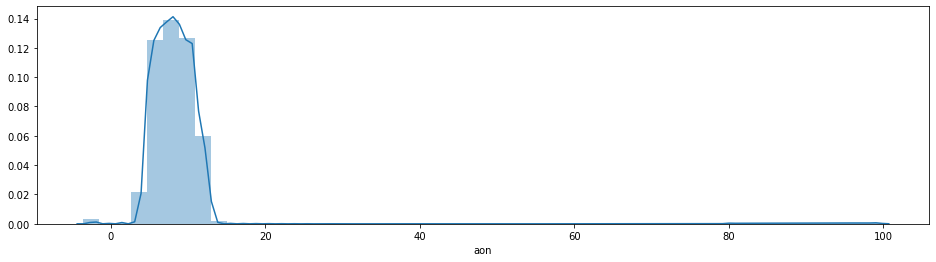

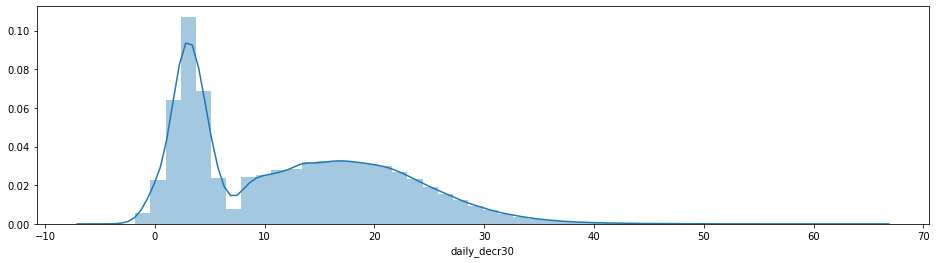

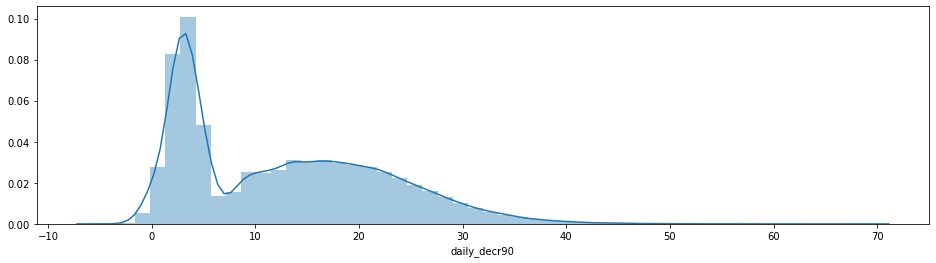

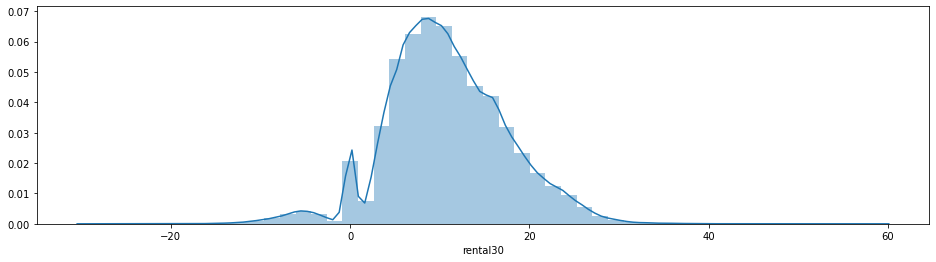

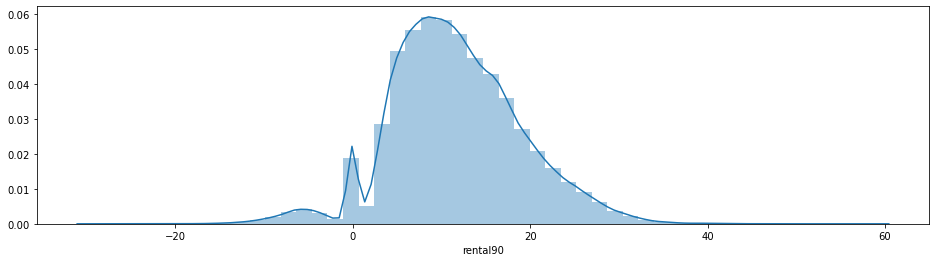

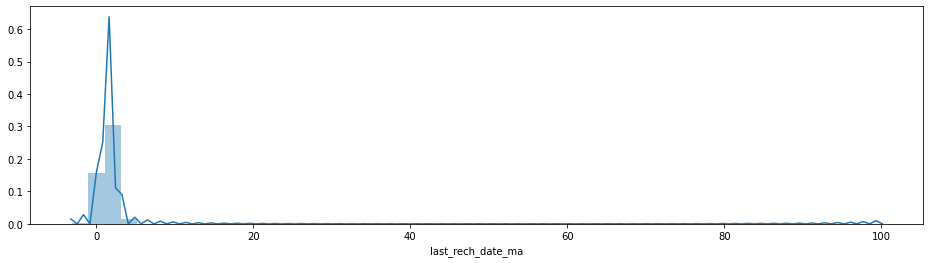

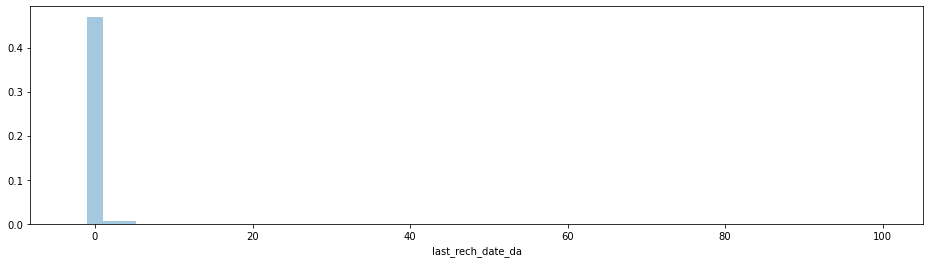

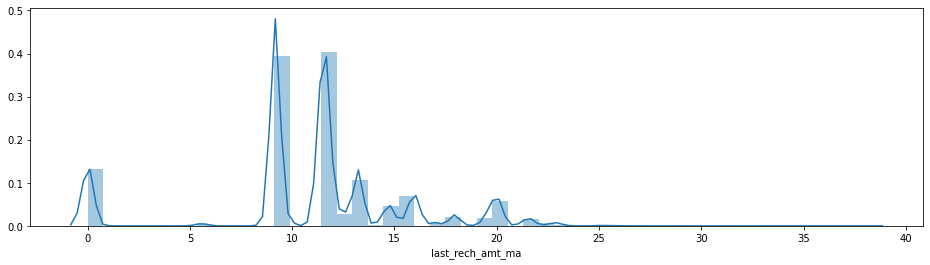

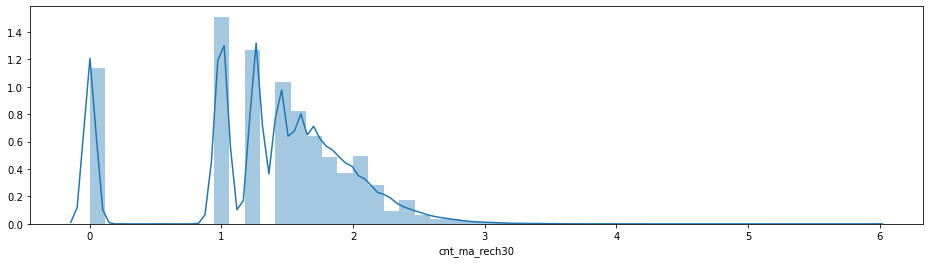

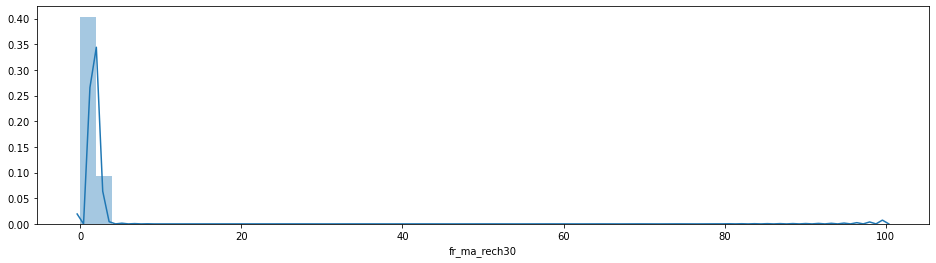

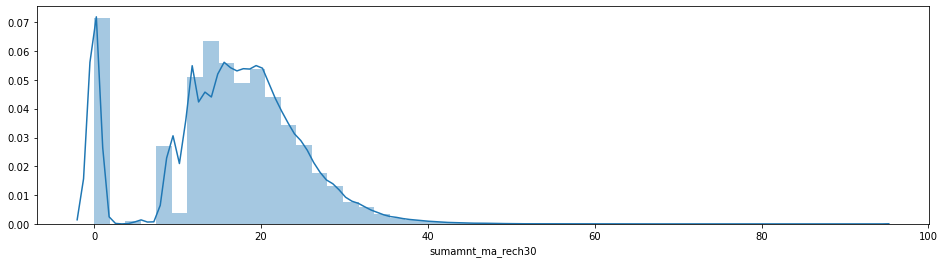

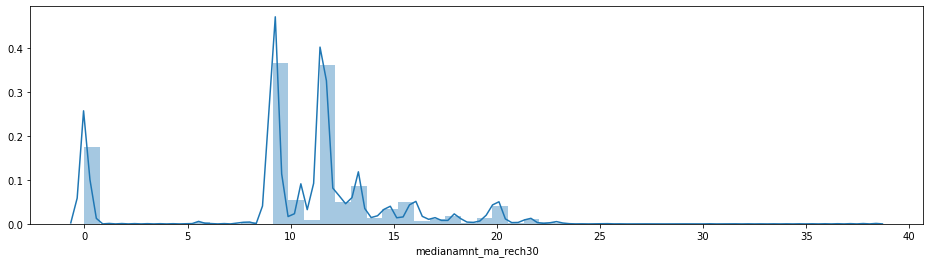

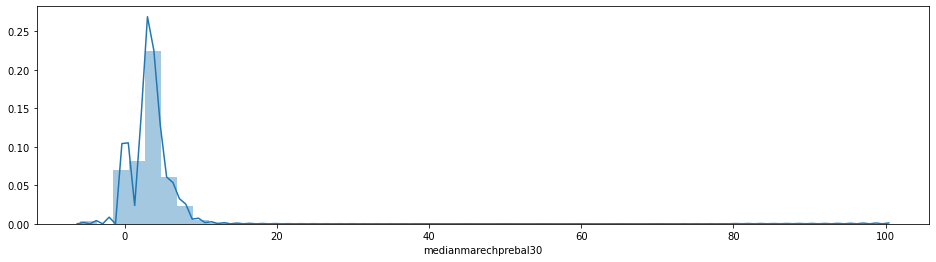

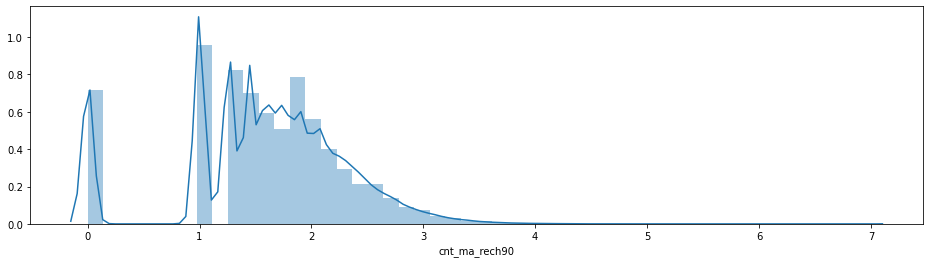

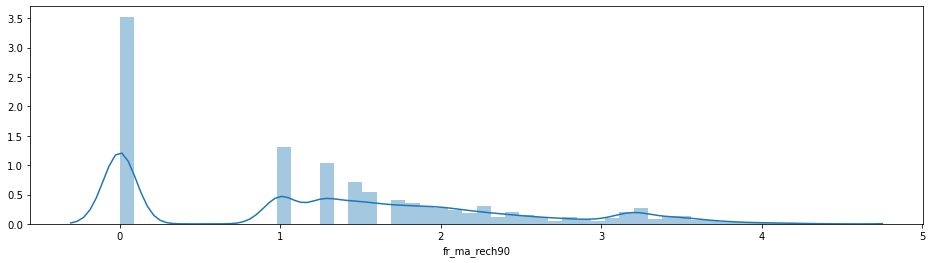

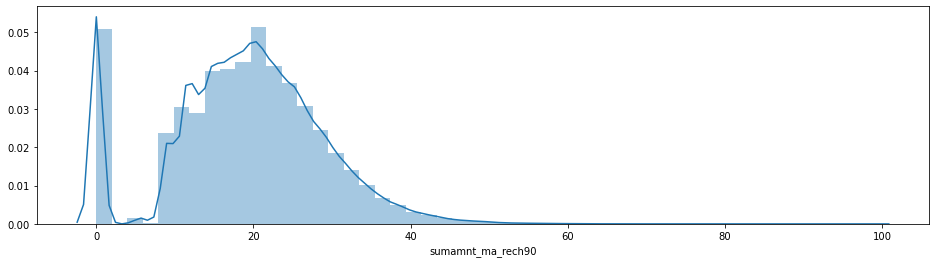

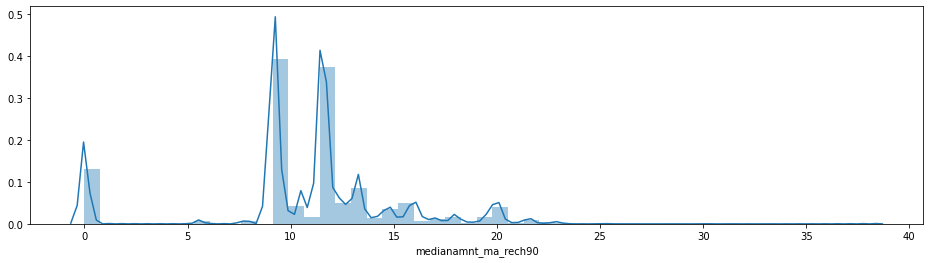

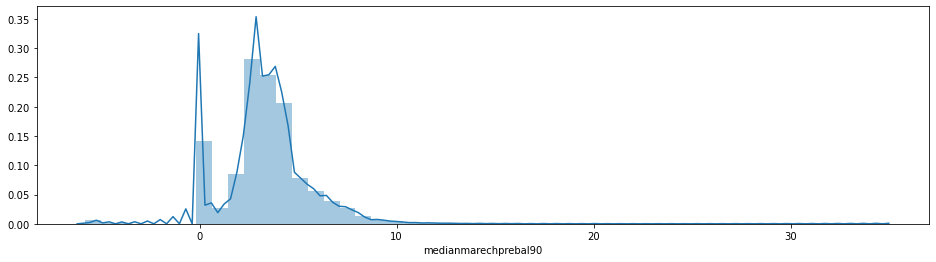

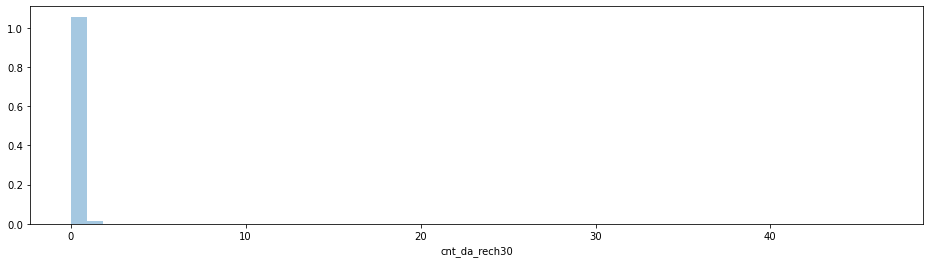

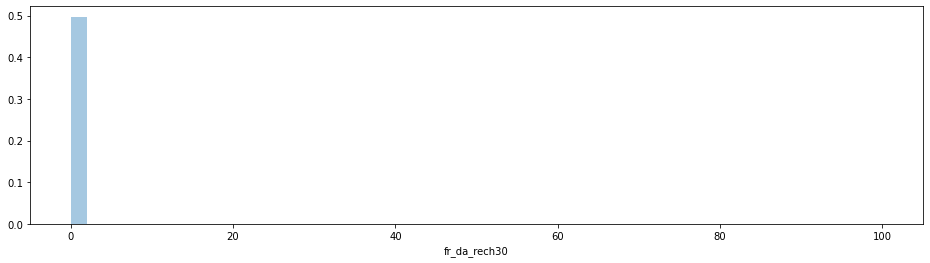

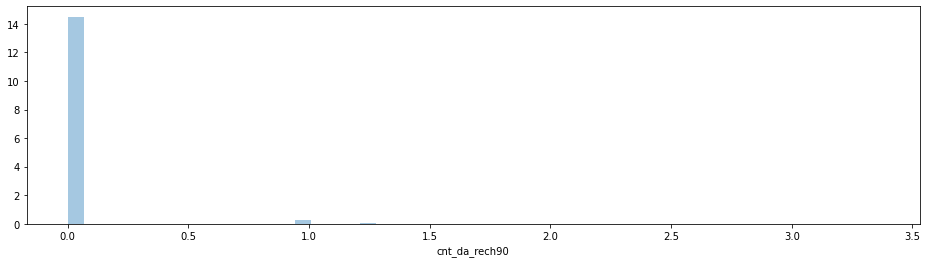

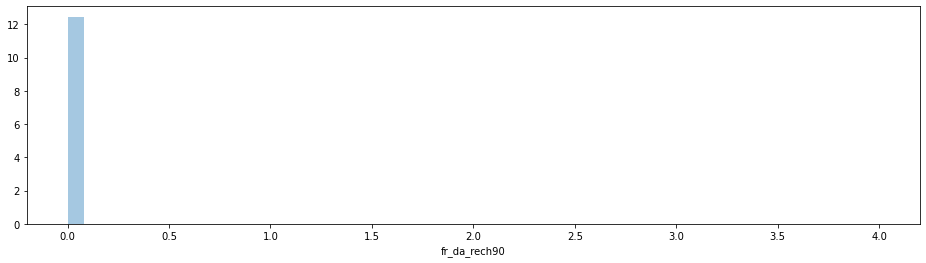

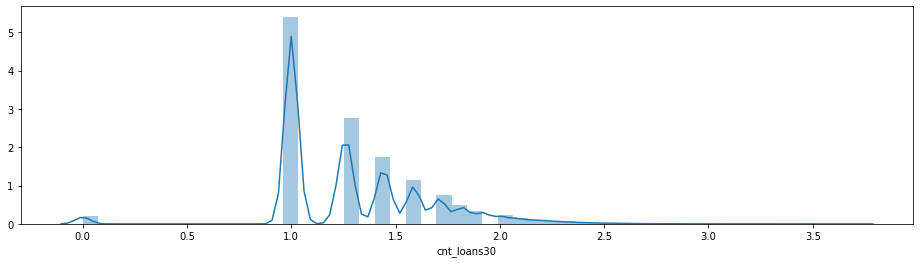

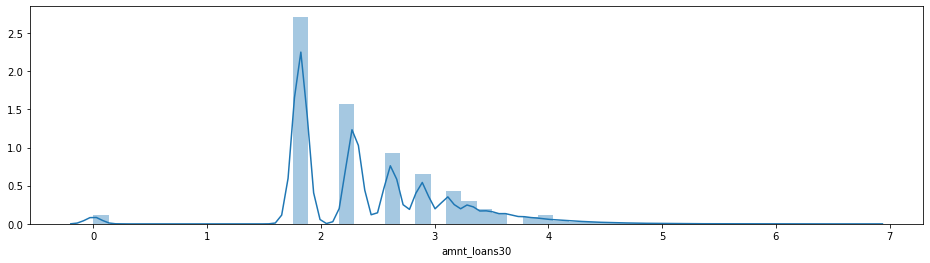

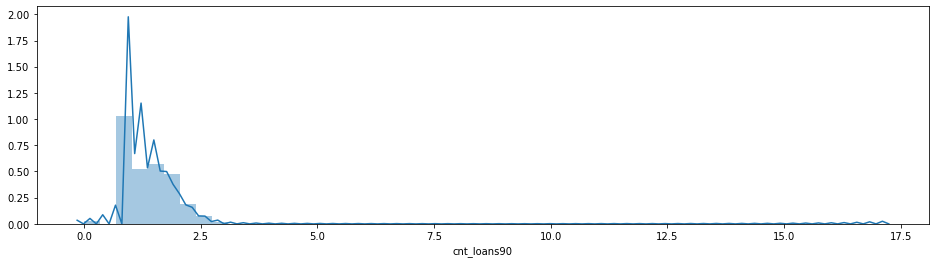

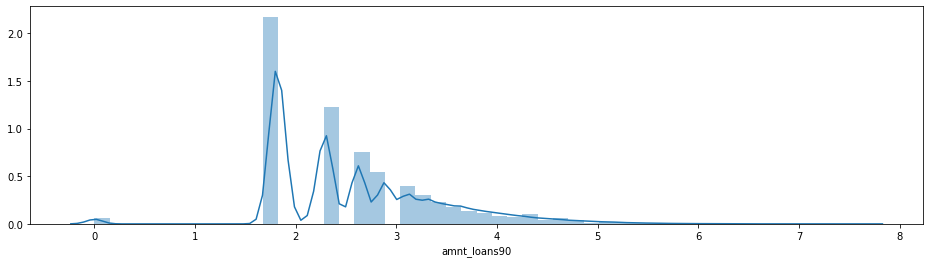

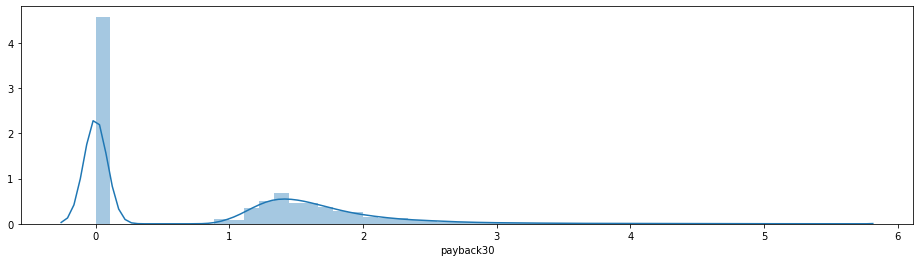

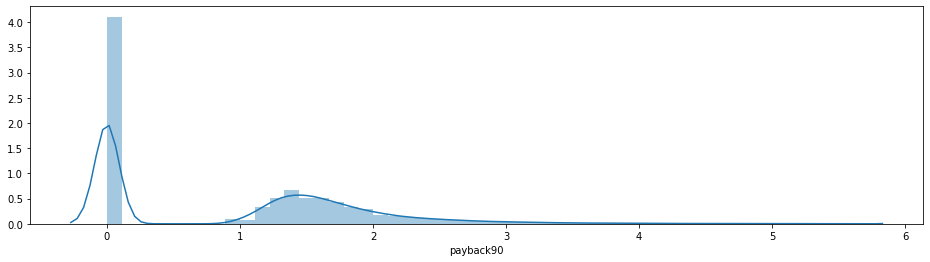

In [1626]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.distplot(df_new[col])

* So we haven't lost any data till now.

In [1627]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [1628]:
# let's now see the outcome of the z-score on this dataset

In [1629]:
z_scores = stats.zscore(df_new[cont_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_with_no_outliers = df_cleaned[filtered_entries]

In [1630]:
len(df_with_no_outliers)

182165

In [1631]:
len(df_new)

208546

In [1632]:
(len(df_new) - len(df_with_no_outliers) )/ len(df_cleaned) * 100

12.649966913774419

## `We have cut down the outliers from 22 % to 12%` , still we can not aford to loose 13 percent of data , our threshold must be around 5% 

In [1633]:
# let's look at the features related to data

* These features are :--> <b>last_rech_date_da, last_rech_date_da, fr_da_rech30, cnt_da_rech90, fr_da_rech90</b>

In [1634]:
df_new

aon  daily_decr30  daily_decr90   rental30   rental90  \
1        6.479224     14.510179     14.526152   6.038000   6.383568   
2        8.929490     22.971610     22.973347  15.454616  15.454616   
3        8.118041     11.181560     11.181560   9.655359   9.655359   
4        6.223084      2.768873      2.768873   5.422267   5.422267   
5        9.820117      5.320595      5.320595  10.319359  10.319359   
...           ...           ...           ...        ...        ...   
209589   7.392542      5.335309      5.335309  10.288875  10.288875   
209590  10.243998      3.330299      3.330299  12.000833  12.000833   
209591  10.043147     22.794073     22.833294  18.030637  20.718232   
209592  12.009252     23.200657     23.253879   7.439995   9.948334   
209593  11.649590     16.496616     16.552110   7.850992   8.578058   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                1.259921           0.000000         11.545503       1.259921   
2                2.714418           0.000000         17.953584       1.000000   
3                1.442250           0.000000         11.545503       1.000000   
4                3.448217           0.000000          9.820117       0.000000   
5                1.587401           0.000000         13.217256       1.912931   
...                   ...                ...               ...            ...   
209589           1.000000           0.000000         15.937254       1.442250   
209590           1.587401           0.000000          9.177544       1.587401   
209591           1.442250           0.000000         11.545503       1.709976   
209592           1.259921           3.361975          9.177544       1.709976   
209593           2.351335           0.000000         19.596931       1.259921   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1           2.758924          14.546423             11.545503   
2           0.000000          17.953584             17.953584   
3           0.000000          11.545503             11.545503   
4           0.000000           0.000000              0.000000   
5           1.259921          27.157290             13.217256   
...              ...                ...                   ...   
209589      1.259921          21.830656             14.702278   
209590      1.000000          14.568444              9.177544   
209591      2.000000          21.055033             11.545503   
209592      1.587401          22.991806              9.177544   
209593      1.000000          20.850794             16.549286   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1                   1.957434       1.259921      2.758924          14.546423   
2                   3.937357       1.000000      0.000000          17.953584   
3                   4.047761       1.000000      0.000000          11.545503   
4                   0.000000       1.000000      0.000000           9.820117   
5                   3.072317       2.000000      1.259921          28.641646   
...                      ...            ...           ...                ...   
209589              4.511248       1.442250      1.259921          21.830656   
209590              5.443499       1.817121      1.259921          15.924120   
209591              3.711578       2.223980      1.709976          26.491631   
209592              5.473704       1.817121      1.587401          26.178749   
209593              7.091983       1.442250      2.668402          25.504933   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
1                  11.545503              1.957434            0.0   
2                  17.953584              3.937357            0.0   
3                  11.545503              4.047761            0.0   
4                   9.820117              1.357209            0.0   
5                  14.240735              3.271066            0.0   
...                      ...    

In [1635]:
data_features = df_new[['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90']].copy()

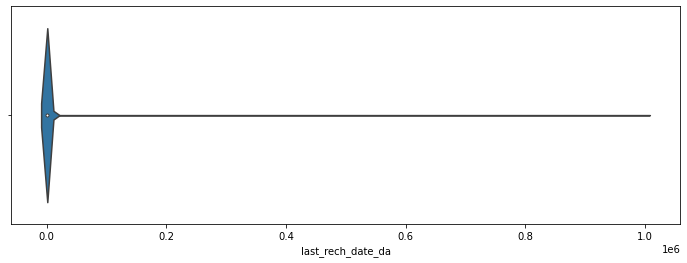

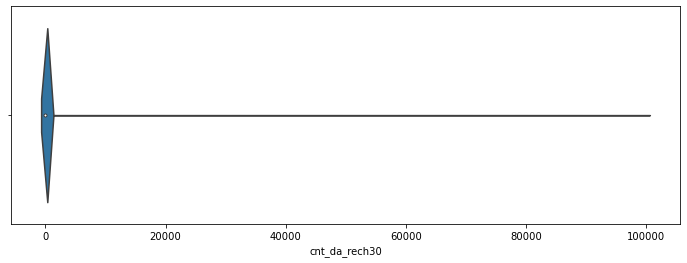

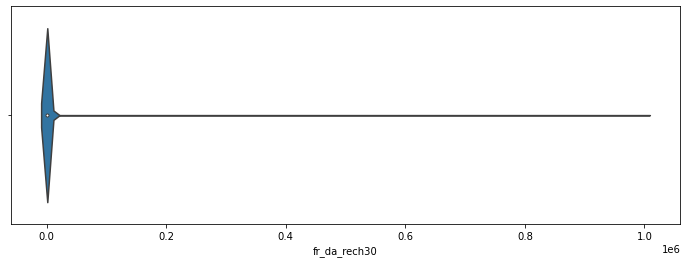

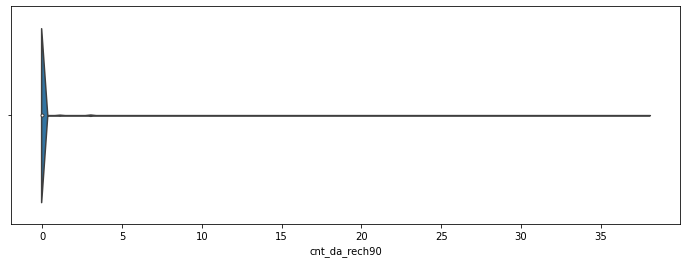

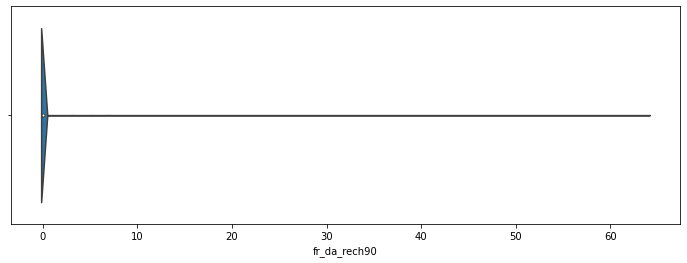

In [1636]:
for i in data_features:
    plt.figure(figsize=(12,4))
    sns.violinplot(df[i])

In [1637]:
for col in data_features.columns:
    
    print(data_features[col].value_counts()[:2,],'\n')

0.000000    201844
1.912931       163
Name: last_rech_date_da, dtype: int64 

0.0    204453
1.0      2318
Name: cnt_da_rech30, dtype: int64 

0.00000    206975
1.44225        63
Name: fr_da_rech30, dtype: int64 

0.0    203204
1.0      4151
Name: cnt_da_rech90, dtype: int64 

0.00000    207683
1.44225        78
Name: fr_da_rech90, dtype: int64 



* We can see that almost all the values in this features are , thus its better to remove the features from the dataframe as they just give the value zero.

* This also means that the data account is used by a very limited number of users 

In [1638]:
df_new.head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
1  6.479224     14.510179     14.526152   6.038000   6.383568   
2  8.929490     22.971610     22.973347  15.454616  15.454616   
3  8.118041     11.181560     11.181560   9.655359   9.655359   
4  6.223084      2.768873      2.768873   5.422267   5.422267   
5  9.820117      5.320595      5.320595  10.319359  10.319359   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1           1.259921                0.0         11.545503       1.259921   
2           2.714418                0.0         17.953584       1.000000   
3           1.442250                0.0         11.545503       1.000000   
4           3.448217                0.0          9.820117       0.000000   
5           1.587401                0.0         13.217256       1.912931   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
1      2.758924          14.546423             11.545503   
2      0.000000          17.953584             17.953584   
3      0.000000          11.545503             11.545503   
4      0.000000           0.000000              0.000000   
5      1.259921          27.157290             13.217256   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
1              1.957434       1.259921      2.758924          14.546423   
2              3.937357       1.000000      0.000000          17.953584   
3              4.047761       1.000000      0.000000          11.545503   
4              0.000000       1.000000      0.000000           9.820117   
5              3.072317       2.000000      1.259921          28.641646   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
1             11.545503              1.957434            0.0           0.0   
2             17.953584              3.937357            0.0           0.0   
3             11.545503              4.047761            0.0           0.0   
4              9.820117              1.357209            0.0           0.0   
5             14.240735              3.271066            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  cnt_loans90  \
1            0.0           0.0     1.259921      2.289428     1.259921   
2            0.0           0.0     1.000000      2.289428     1.000000   
3            0.0           0.0     1.000000      1.817121     1.000000   
4            0.0           0.0     1.259921      2.289428     1.259921   
5            0.0           0.0     1.912931      3.476027     1.912931   

   amnt_loans90  payback30  payback90  maxamnt_loans30  medianamnt_loans30  \
1      2.289428   3.072317   3.072317              6.0                 0.0   
2      2.289428   0.000000   0.000000             12.0                 0.0   
3      1.817121   0.000000   0.000000              6.0                 0.0   
4      2.289428   0.000000   0.000000              6.0                 0.0   
5      3.476027   1.326352   1.326352              6.0                 0.0   

   maxamnt_loans90  medianamnt_loans90  label  
1                6                 0.0      0  
2               12                 0.0      1  
3                6                 0.0      1  
4                6                 0.0      1  
5                6                 0.0      1

In [1639]:
len(df_new.columns)

33

In [1640]:
df_new.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90'],1,inplace=True)

In [1641]:
len(df_new.columns)

28

In [1642]:
df_new

aon  daily_decr30  daily_decr90   rental30   rental90  \
1        6.479224     14.510179     14.526152   6.038000   6.383568   
2        8.929490     22.971610     22.973347  15.454616  15.454616   
3        8.118041     11.181560     11.181560   9.655359   9.655359   
4        6.223084      2.768873      2.768873   5.422267   5.422267   
5        9.820117      5.320595      5.320595  10.319359  10.319359   
...           ...           ...           ...        ...        ...   
209589   7.392542      5.335309      5.335309  10.288875  10.288875   
209590  10.243998      3.330299      3.330299  12.000833  12.000833   
209591  10.043147     22.794073     22.833294  18.030637  20.718232   
209592  12.009252     23.200657     23.253879   7.439995   9.948334   
209593  11.649590     16.496616     16.552110   7.850992   8.578058   

        last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1                1.259921         11.545503       1.259921      2.758924   
2                2.714418         17.953584       1.000000      0.000000   
3                1.442250         11.545503       1.000000      0.000000   
4                3.448217          9.820117       0.000000      0.000000   
5                1.587401         13.217256       1.912931      1.259921   
...                   ...               ...            ...           ...   
209589           1.000000         15.937254       1.442250      1.259921   
209590           1.587401          9.177544       1.587401      1.000000   
209591           1.442250         11.545503       1.709976      2.000000   
209592           1.259921          9.177544       1.709976      1.587401   
209593           2.351335         19.596931       1.259921      1.000000   

        sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1               14.546423             11.545503              1.957434   
2               17.953584             17.953584              3.937357   
3               11.545503             11.545503              4.047761   
4                0.000000              0.000000              0.000000   
5               27.157290             13.217256              3.072317   
...                   ...                   ...                   ...   
209589          21.830656             14.702278              4.511248   
209590          14.568444              9.177544              5.443499   
209591          21.055033             11.545503              3.711578   
209592          22.991806              9.177544              5.473704   
209593          20.850794             16.549286              7.091983   

        cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1            1.259921      2.758924          14.546423             11.545503   
2            1.000000      0.000000          17.953584             17.953584   
3            1.000000      0.000000          11.545503             11.545503   
4            1.000000      0.000000           9.820117              9.820117   
5            2.000000      1.259921          28.641646             14.240735   
...               ...           ...                ...                   ...   
209589       1.442250      1.259921          21.830656             14.702278   
209590       1.817121      1.259921          15.924120              9.177544   
209591       2.223980      1.709976          26.491631             11.545503   
209592       1.817121      1.587401          26.178749             13.408156   
209593       1.442250      2.668402          25.504933             19.596931   

        medianmarechprebal90  cnt_loans30  amnt_loans30  cnt_loans90  \
1                   1.957434     1.259921      2.289428     1.259921   
2                   3.937357     1.000000      2.289428     1.000000   
3                   4.047761     1.000000      1.817121     1.000000   
4                   1.357209     1.259921      2.289428     1.259921   
5                   3.271066     1.912931      3.4

In [1643]:
df.shape 

(209593, 36)

In [1644]:
df_cleaned.shape # --> removed the mb_no,circle,label and pdate (4)

(208546, 33)

In [1645]:
df_new.shape # --> removed all the features from the data_features list (5)

(208546, 28)

In [1646]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [1647]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [1648]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

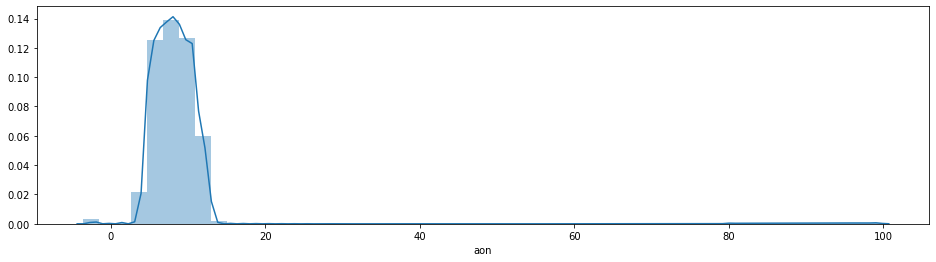

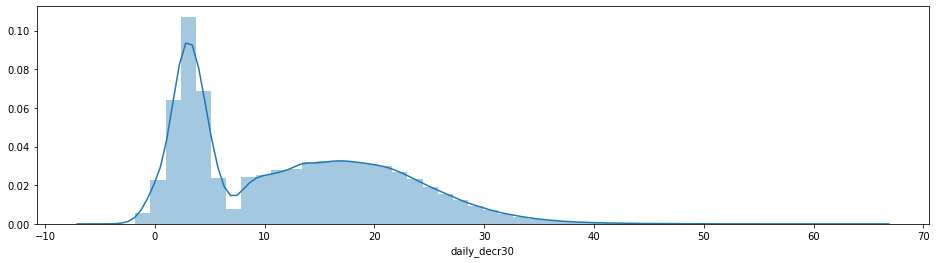

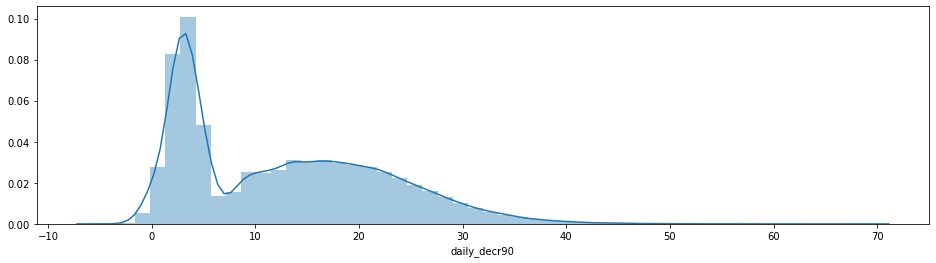

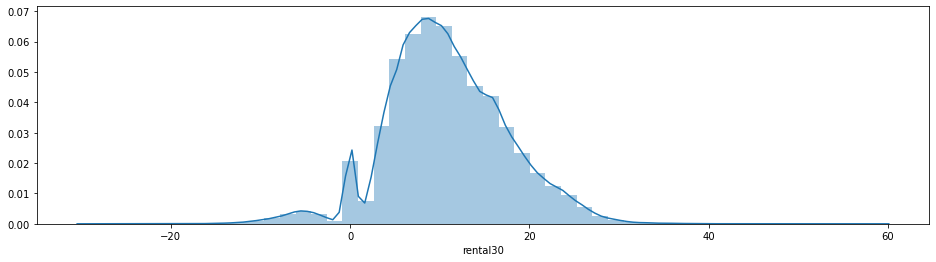

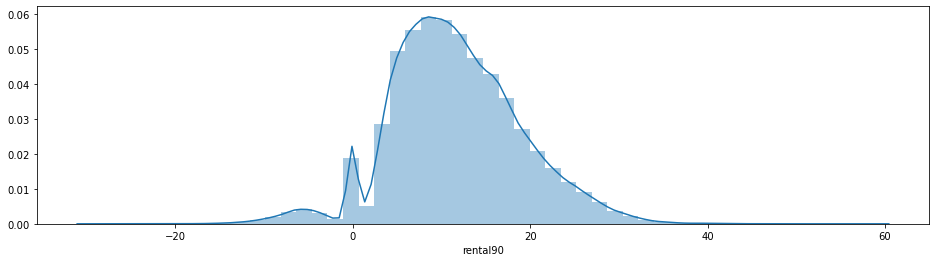

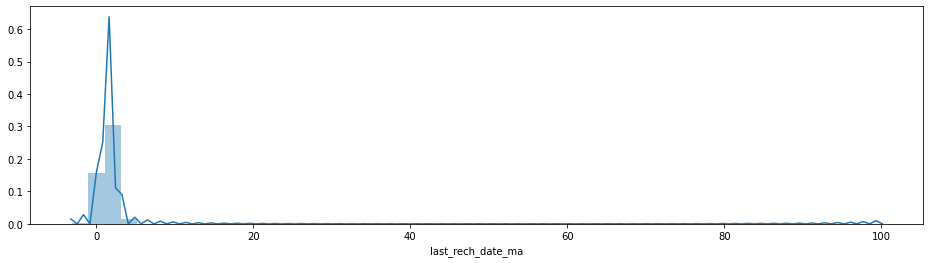

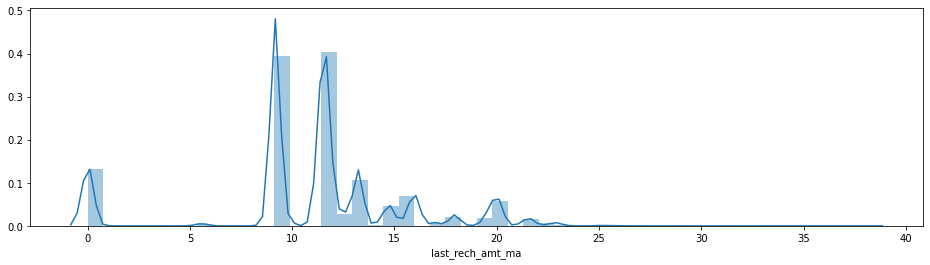

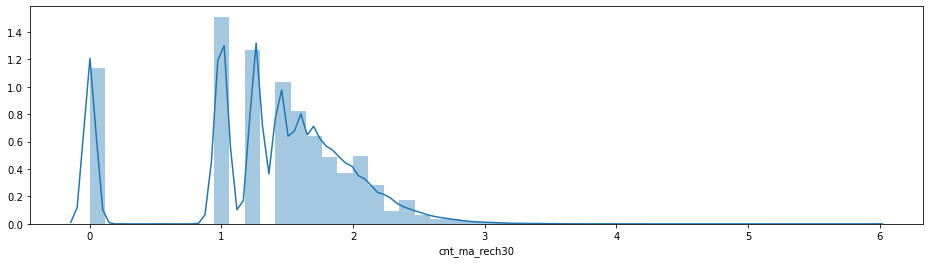

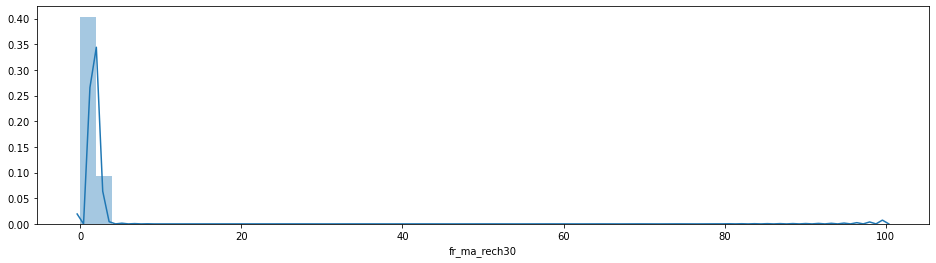

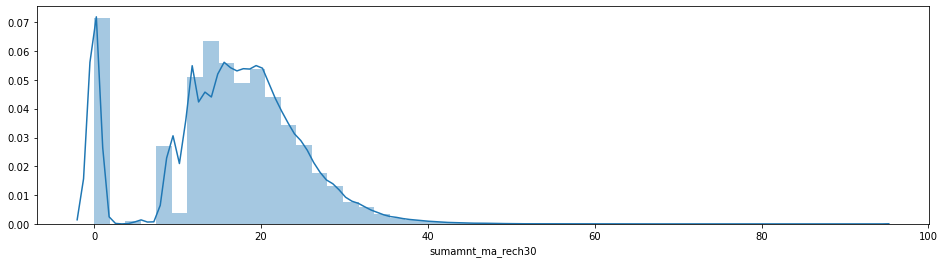

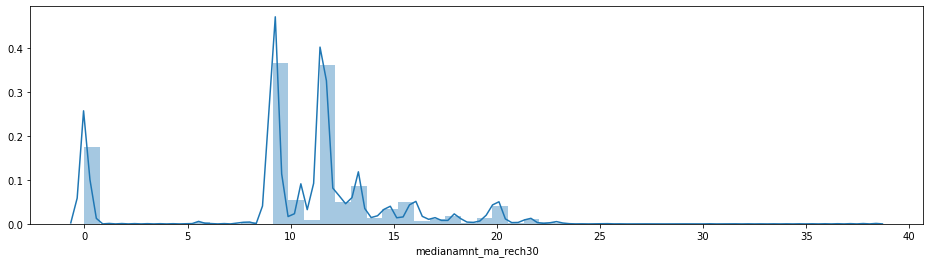

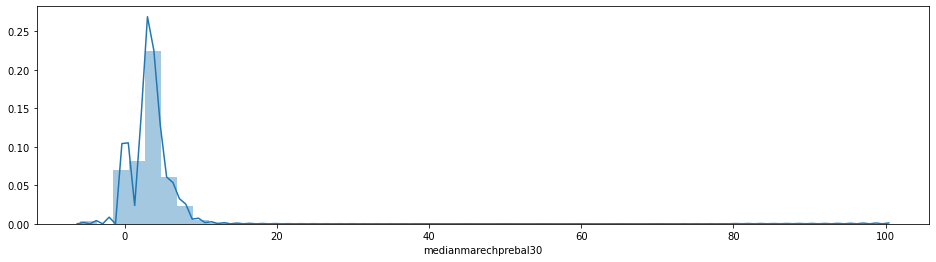

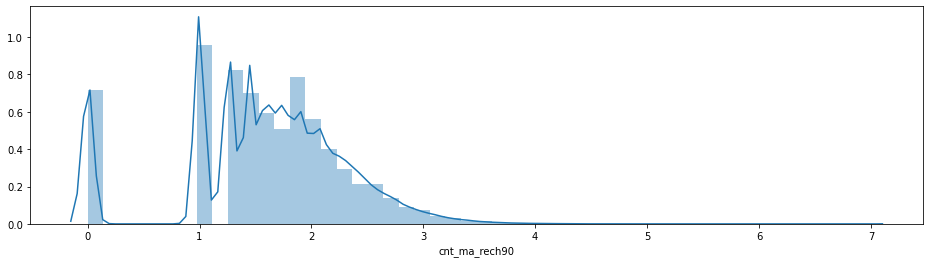

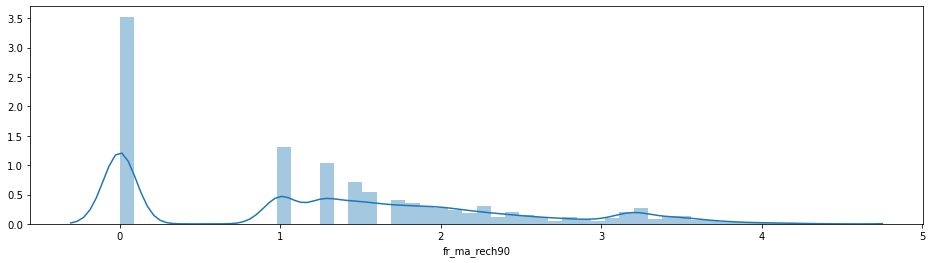

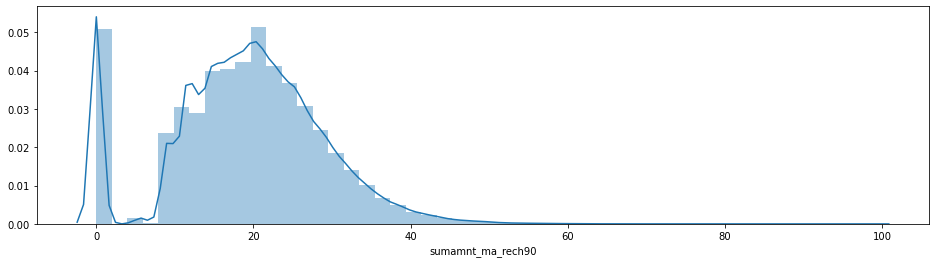

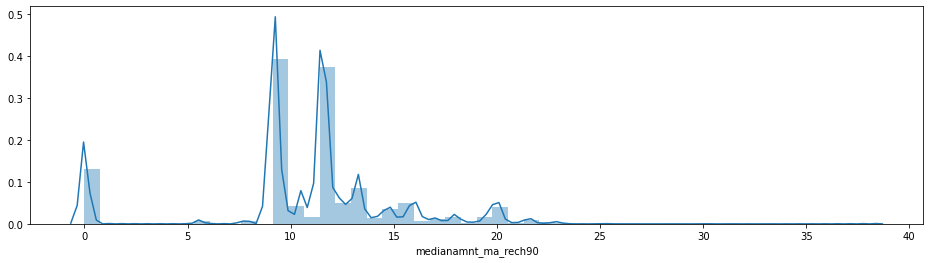

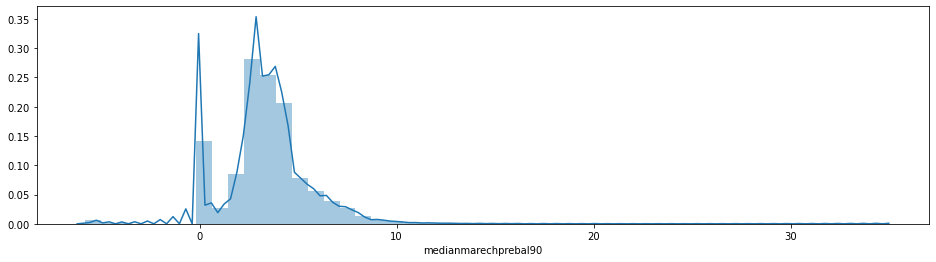

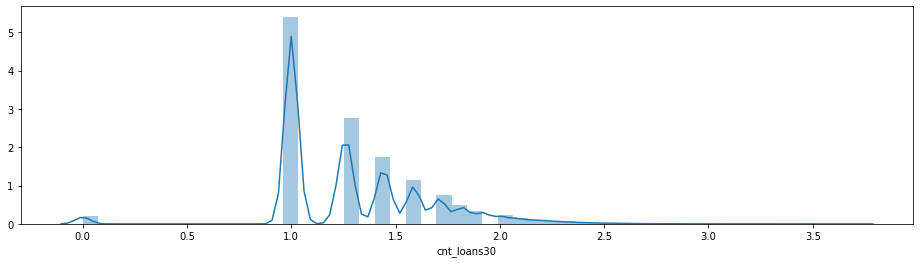

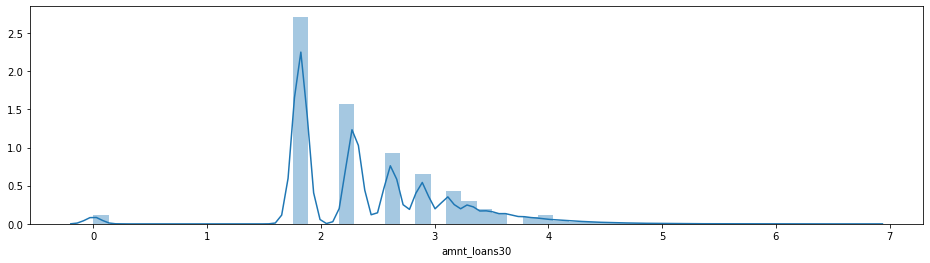

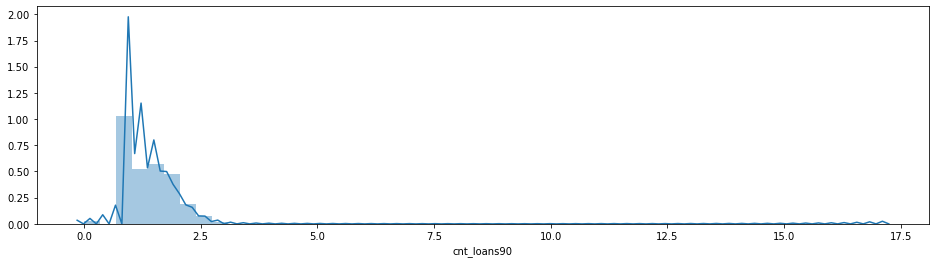

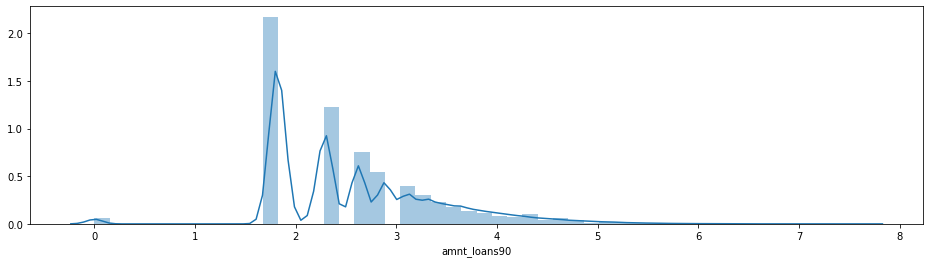

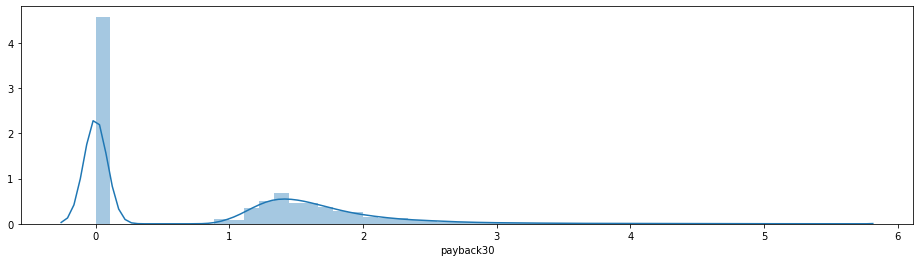

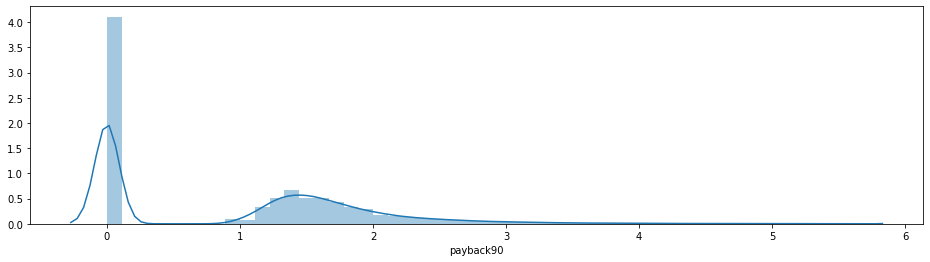

In [1649]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.distplot(df_new[col])

! note that there is no sample loss yet

In [1650]:
# now we will maually remove some outliers, without using any algorithms but only just by the visualizations.

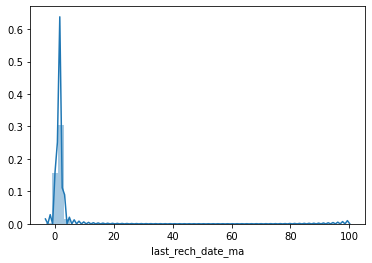

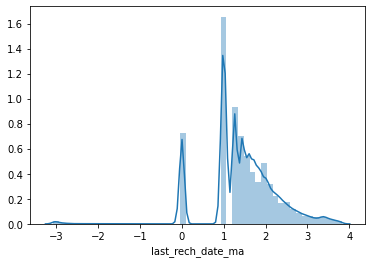

In [1651]:
# let's start with the feat : last_rech_date_ma
sns.distplot(df_new.last_rech_date_ma)
plt.show()
# let's strip of the last 1 quantile of the data
sns.distplot(df_new[df_new.last_rech_date_ma < df_new.last_rech_date_ma.quantile(0.99)]['last_rech_date_ma'])

* just by stripping 1 qantile of data, we are getting qaulity results. This 1 quantile of data clubs up to less than 1 percent of the whole data

In [1652]:
df_new = df_new[df_new.last_rech_date_ma < df_new.last_rech_date_ma.quantile(0.99)]

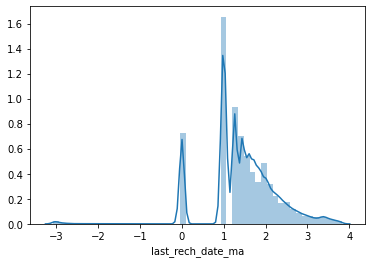

In [1653]:
sns.distplot(df_new.last_rech_date_ma)

In [1654]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [1655]:
df_new.maxamnt_loans90.value_counts()

6     178178
12     26290
0       1969
Name: maxamnt_loans90, dtype: int64

In [1656]:
df_new.maxamnt_loans30.value_counts()

6.0     177344
12.0     25925
0.0       3168
Name: maxamnt_loans30, dtype: int64

In [1657]:
df_new.head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
1  6.479224     14.510179     14.526152   6.038000   6.383568   
2  8.929490     22.971610     22.973347  15.454616  15.454616   
3  8.118041     11.181560     11.181560   9.655359   9.655359   
4  6.223084      2.768873      2.768873   5.422267   5.422267   
5  9.820117      5.320595      5.320595  10.319359  10.319359   

   last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1           1.259921         11.545503       1.259921      2.758924   
2           2.714418         17.953584       1.000000      0.000000   
3           1.442250         11.545503       1.000000      0.000000   
4           3.448217          9.820117       0.000000      0.000000   
5           1.587401         13.217256       1.912931      1.259921   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1          14.546423             11.545503              1.957434   
2          17.953584             17.953584              3.937357   
3          11.545503             11.545503              4.047761   
4           0.000000              0.000000              0.000000   
5          27.157290             13.217256              3.072317   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1       1.259921      2.758924          14.546423             11.545503   
2       1.000000      0.000000          17.953584             17.953584   
3       1.000000      0.000000          11.545503             11.545503   
4       1.000000      0.000000           9.820117              9.820117   
5       2.000000      1.259921          28.641646             14.240735   

   medianmarechprebal90  cnt_loans30  amnt_loans30  cnt_loans90  amnt_loans90  \
1              1.957434     1.259921      2.289428     1.259921      2.289428   
2              3.937357     1.000000      2.289428     1.000000      2.289428   
3              4.047761     1.000000      1.817121     1.000000      1.817121   
4              1.357209     1.259921      2.289428     1.259921      2.289428   
5              3.271066     1.912931      3.476027     1.912931      3.476027   

   payback30  payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  \
1   3.072317   3.072317              6.0                 0.0                6   
2   0.000000   0.000000             12.0                 0.0               12   
3   0.000000   0.000000              6.0                 0.0                6   
4   0.000000   0.000000              6.0                 0.0                6   
5   1.326352   1.326352              6.0                 0.0                6   

   medianamnt_loans90  label  
1                 0.0      0  
2                 0.0      1  
3                 0.0      1  
4                 0.0      1  
5                 0.0      1

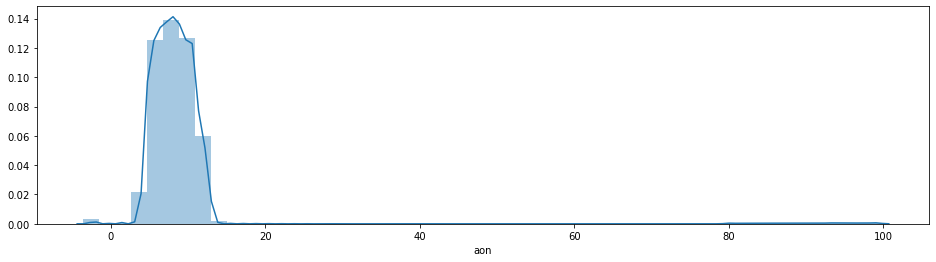

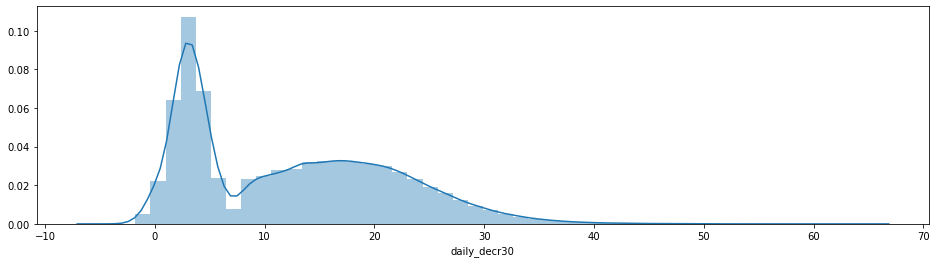

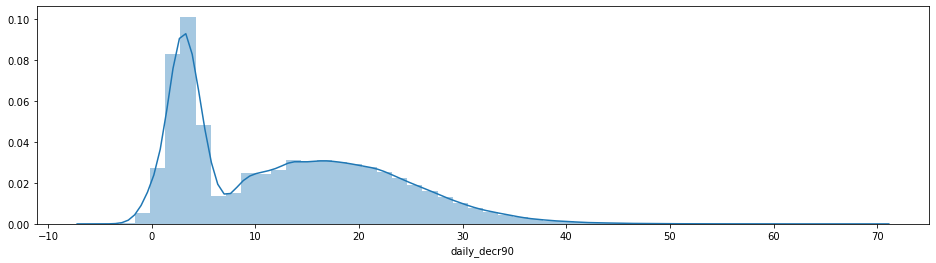

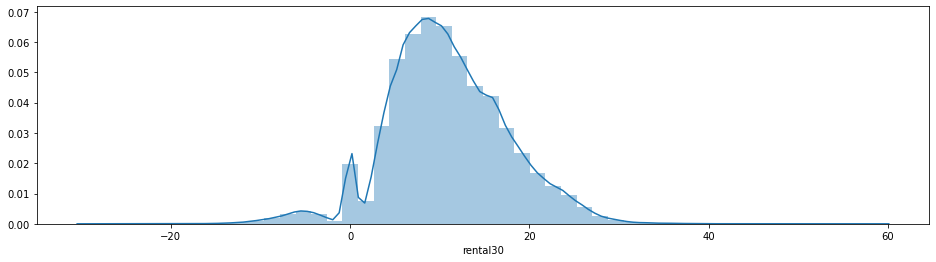

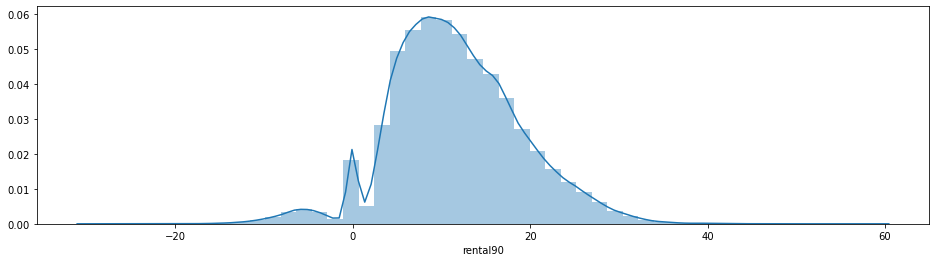

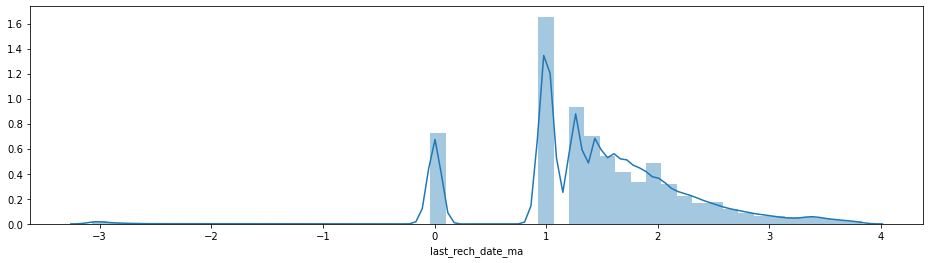

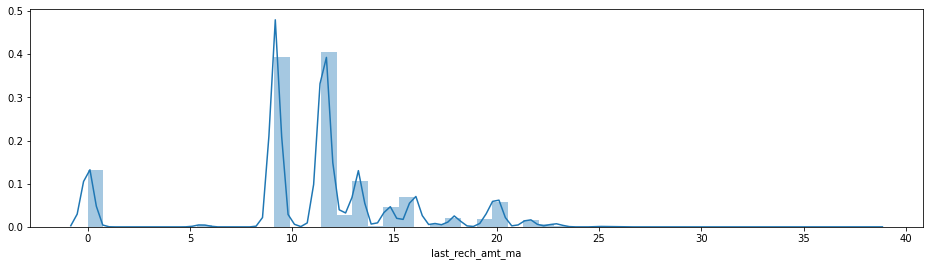

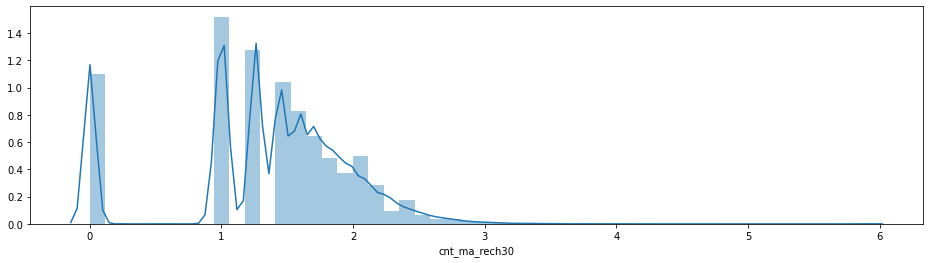

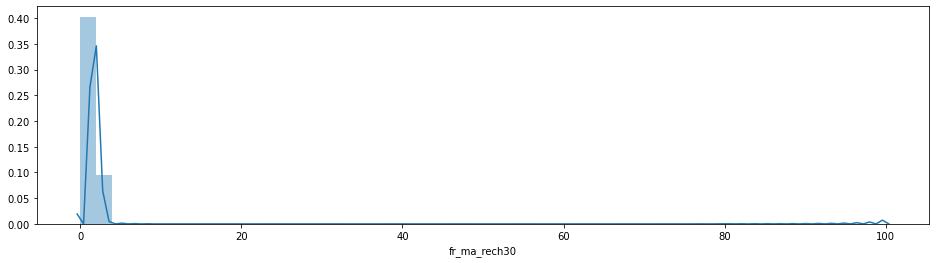

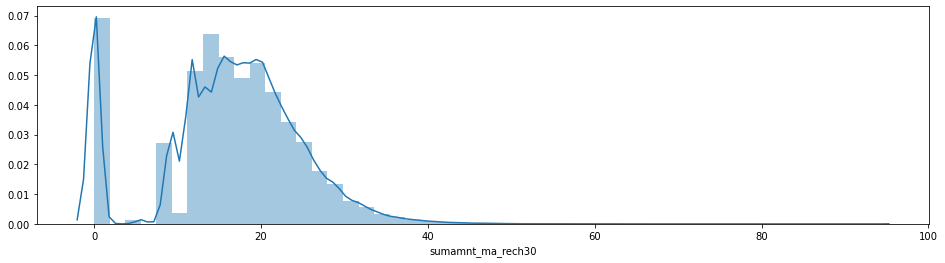

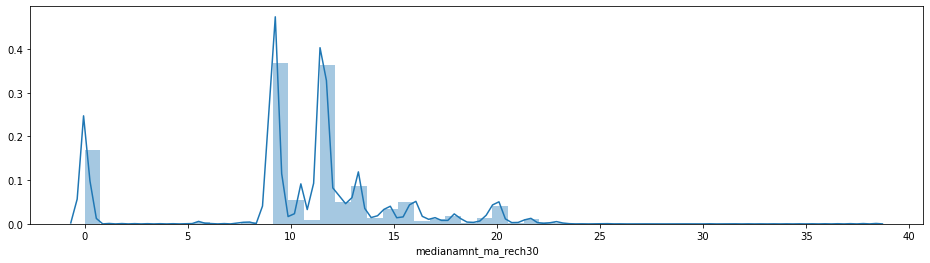

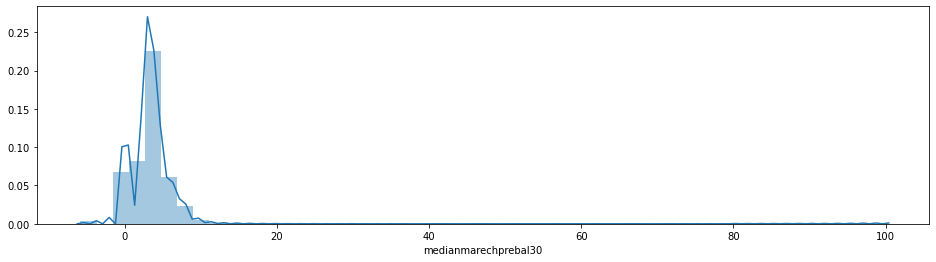

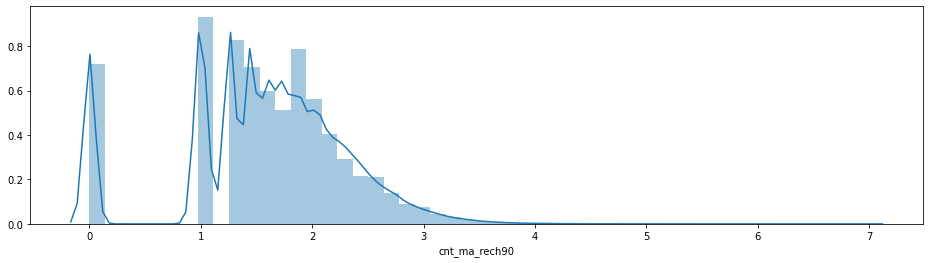

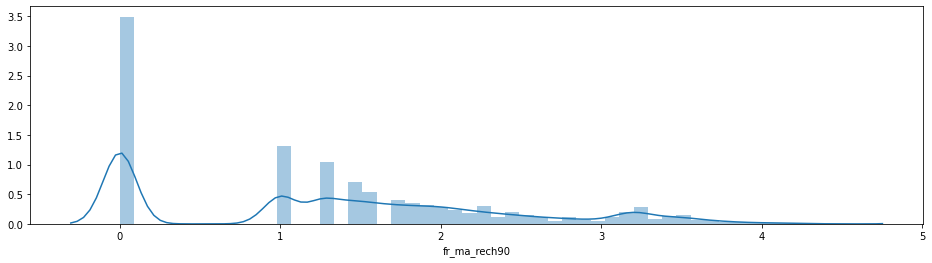

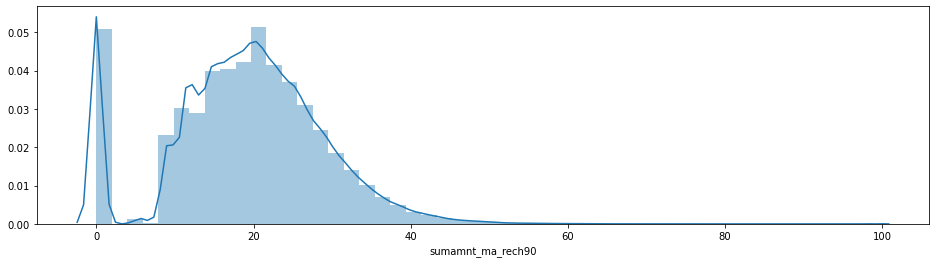

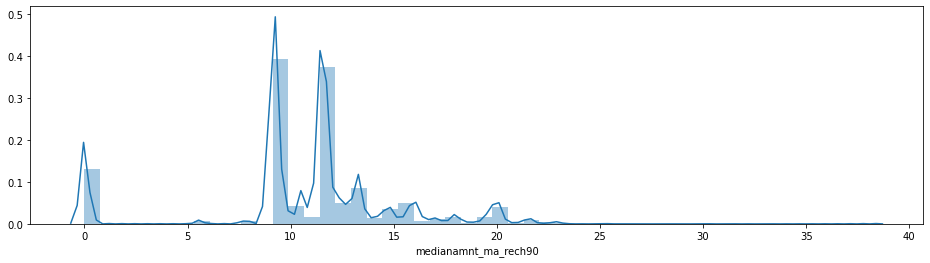

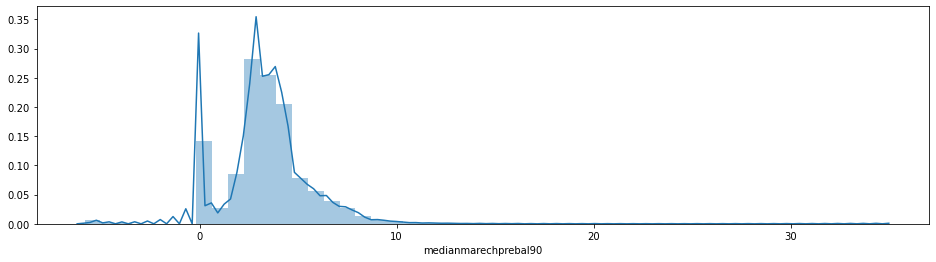

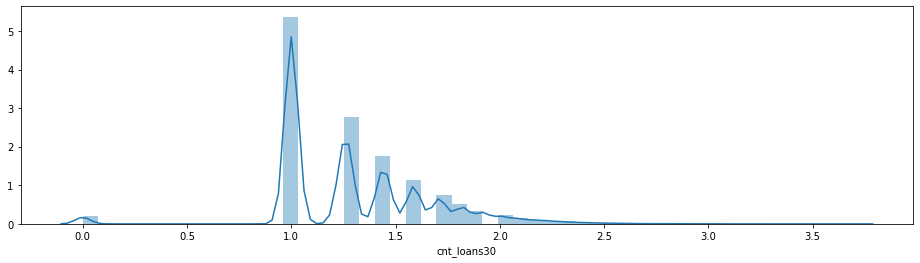

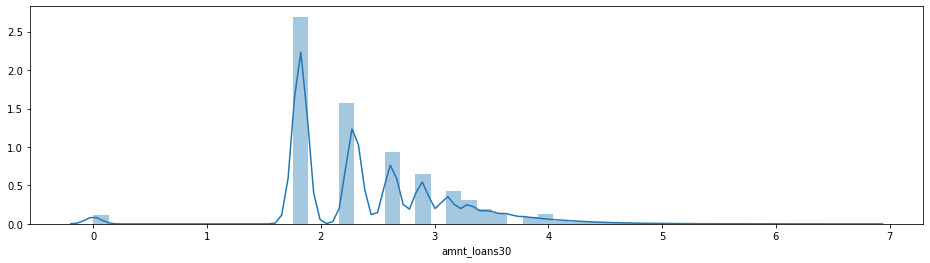

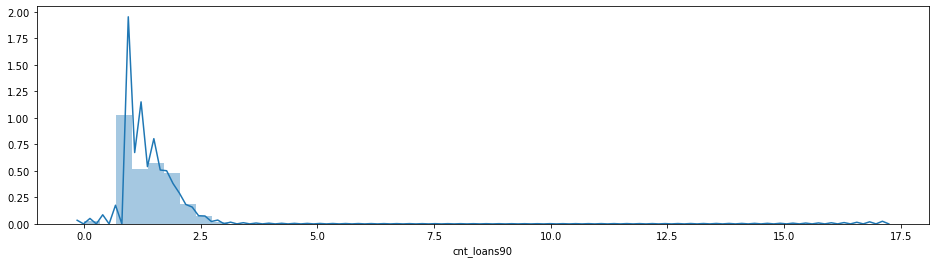

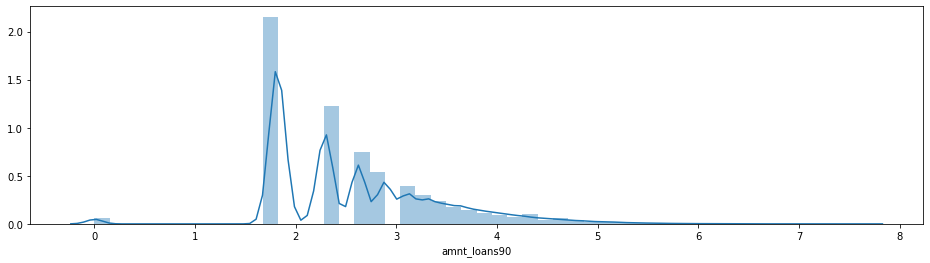

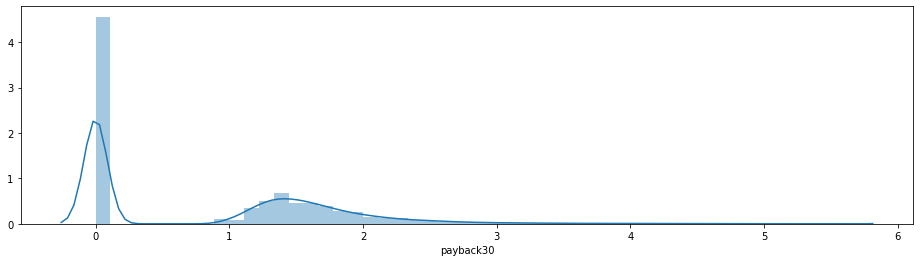

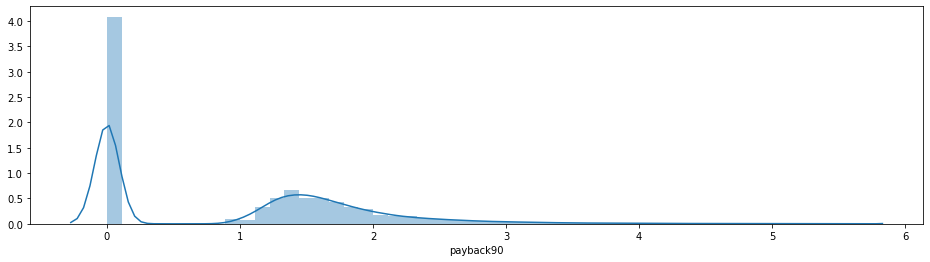

In [1658]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.distplot(df_new[col])

## Remove the columns with near zero vairance

In [1659]:
df_new.iloc[:,:-1].head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
1  6.479224     14.510179     14.526152   6.038000   6.383568   
2  8.929490     22.971610     22.973347  15.454616  15.454616   
3  8.118041     11.181560     11.181560   9.655359   9.655359   
4  6.223084      2.768873      2.768873   5.422267   5.422267   
5  9.820117      5.320595      5.320595  10.319359  10.319359   

   last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1           1.259921         11.545503       1.259921      2.758924   
2           2.714418         17.953584       1.000000      0.000000   
3           1.442250         11.545503       1.000000      0.000000   
4           3.448217          9.820117       0.000000      0.000000   
5           1.587401         13.217256       1.912931      1.259921   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1          14.546423             11.545503              1.957434   
2          17.953584             17.953584              3.937357   
3          11.545503             11.545503              4.047761   
4           0.000000              0.000000              0.000000   
5          27.157290             13.217256              3.072317   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1       1.259921      2.758924          14.546423             11.545503   
2       1.000000      0.000000          17.953584             17.953584   
3       1.000000      0.000000          11.545503             11.545503   
4       1.000000      0.000000           9.820117              9.820117   
5       2.000000      1.259921          28.641646             14.240735   

   medianmarechprebal90  cnt_loans30  amnt_loans30  cnt_loans90  amnt_loans90  \
1              1.957434     1.259921      2.289428     1.259921      2.289428   
2              3.937357     1.000000      2.289428     1.000000      2.289428   
3              4.047761     1.000000      1.817121     1.000000      1.817121   
4              1.357209     1.259921      2.289428     1.259921      2.289428   
5              3.271066     1.912931      3.476027     1.912931      3.476027   

   payback30  payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  \
1   3.072317   3.072317              6.0                 0.0                6   
2   0.000000   0.000000             12.0                 0.0               12   
3   0.000000   0.000000              6.0                 0.0                6   
4   0.000000   0.000000              6.0                 0.0                6   
5   1.326352   1.326352              6.0                 0.0                6   

   medianamnt_loans90  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 0.0

In [1660]:
for i in range(df_new.iloc[:,:-1].shape[1]): # removing the label from the loop 
    num = len(np.unique(df_new.iloc[:, i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 4478, 2.2%
1, 145437, 70.5%
2, 156795, 76.0%
3, 130870, 63.4%
4, 139585, 67.6%
5, 86, 0.0%
6, 70, 0.0%
7, 70, 0.0%
8, 1070, 0.5%
9, 15045, 7.3%
10, 508, 0.2%
11, 30233, 14.6%
12, 109, 0.1%
13, 89, 0.0%
14, 31597, 15.3%
15, 606, 0.3%
16, 29504, 14.3%
17, 40, 0.0%
18, 48, 0.0%
19, 1092, 0.5%
20, 69, 0.0%
21, 1358, 0.7%
22, 2374, 1.1%
23, 3, 0.0%
24, 6, 0.0%
25, 3, 0.0%
26, 6, 0.0%


In [1661]:
a2 = []
for i in range(df_new.iloc[:,:-1].shape[1]):
    num = len(np.unique(df_new.iloc[:, i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))
    a2.append(percentage)

0, 4478, 2.2%
1, 145437, 70.5%
2, 156795, 76.0%
3, 130870, 63.4%
4, 139585, 67.6%
5, 86, 0.0%
6, 70, 0.0%
7, 70, 0.0%
8, 1070, 0.5%
9, 15045, 7.3%
10, 508, 0.2%
11, 30233, 14.6%
12, 109, 0.1%
13, 89, 0.0%
14, 31597, 15.3%
15, 606, 0.3%
16, 29504, 14.3%
17, 40, 0.0%
18, 48, 0.0%
19, 1092, 0.5%
20, 69, 0.0%
21, 1358, 0.7%
22, 2374, 1.1%
23, 3, 0.0%
24, 6, 0.0%
25, 3, 0.0%
26, 6, 0.0%


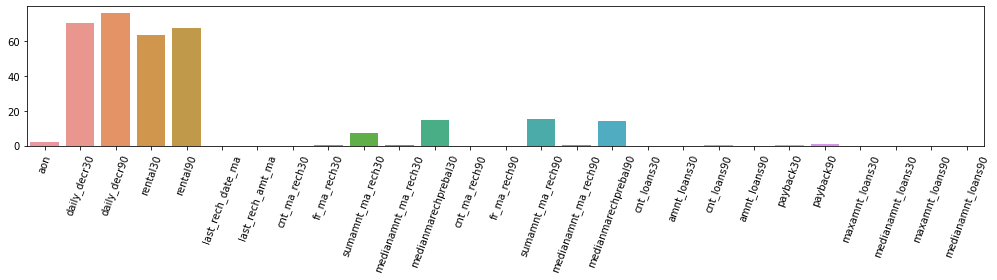

In [1662]:
plt.figure(figsize=(14,4))
sns.barplot(df_new.iloc[:,:-1].columns,a2)
plt.xticks(rotation=70)
plt.tight_layout()

* We can see that many of the columns have the variance as zero, thses columns are unfit for the data, let's remove these features as these features bring no new thing to the table for better prediction.

In [1663]:
df_new.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90', 'maxamnt_loans30', 'medianamnt_loans30',
       'maxamnt_loans90', 'medianamnt_loans90', 'label'],
      dtype='object')

In [1664]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [1665]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [1666]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [1667]:
len(df_temp.columns)

28

In [1668]:
df_new

aon  daily_decr30  daily_decr90   rental30   rental90  \
1        6.479224     14.510179     14.526152   6.038000   6.383568   
2        8.929490     22.971610     22.973347  15.454616  15.454616   
3        8.118041     11.181560     11.181560   9.655359   9.655359   
4        6.223084      2.768873      2.768873   5.422267   5.422267   
5        9.820117      5.320595      5.320595  10.319359  10.319359   
...           ...           ...           ...        ...        ...   
209589   7.392542      5.335309      5.335309  10.288875  10.288875   
209590  10.243998      3.330299      3.330299  12.000833  12.000833   
209591  10.043147     22.794073     22.833294  18.030637  20.718232   
209592  12.009252     23.200657     23.253879   7.439995   9.948334   
209593  11.649590     16.496616     16.552110   7.850992   8.578058   

        last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1                1.259921         11.545503       1.259921      2.758924   
2                2.714418         17.953584       1.000000      0.000000   
3                1.442250         11.545503       1.000000      0.000000   
4                3.448217          9.820117       0.000000      0.000000   
5                1.587401         13.217256       1.912931      1.259921   
...                   ...               ...            ...           ...   
209589           1.000000         15.937254       1.442250      1.259921   
209590           1.587401          9.177544       1.587401      1.000000   
209591           1.442250         11.545503       1.709976      2.000000   
209592           1.259921          9.177544       1.709976      1.587401   
209593           2.351335         19.596931       1.259921      1.000000   

        sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
1               14.546423             11.545503              1.957434   
2               17.953584             17.953584              3.937357   
3               11.545503             11.545503              4.047761   
4                0.000000              0.000000              0.000000   
5               27.157290             13.217256              3.072317   
...                   ...                   ...                   ...   
209589          21.830656             14.702278              4.511248   
209590          14.568444              9.177544              5.443499   
209591          21.055033             11.545503              3.711578   
209592          22.991806              9.177544              5.473704   
209593          20.850794             16.549286              7.091983   

        cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
1            1.259921      2.758924          14.546423             11.545503   
2            1.000000      0.000000          17.953584             17.953584   
3            1.000000      0.000000          11.545503             11.545503   
4            1.000000      0.000000           9.820117              9.820117   
5            2.000000      1.259921          28.641646             14.240735   
...               ...           ...                ...                   ...   
209589       1.442250      1.259921          21.830656             14.702278   
209590       1.817121      1.259921          15.924120              9.177544   
209591       2.223980      1.709976          26.491631             11.545503   
209592       1.817121      1.587401          26.178749             13.408156   
209593       1.442250      2.668402          25.504933             19.596931   

        medianmarechprebal90  cnt_loans30  amnt_loans30  cnt_loans90  \
1                   1.957434     1.259921      2.289428     1.259921   
2                   3.937357     1.000000      2.289428     1.000000   
3                   4.047761     1.000000      1.817121     1.000000   
4                   1.357209     1.259921      2.289428     1.259921   
5                   3.271066     1.912931      3.4

In [1683]:
# dropping the features with near zero percent variance
df_temp = df_new.copy()
for i in df_temp[cont_var]:
    #print(df_temp[cont_var].columns[i])
    num = len(np.unique(df_temp[cont_var][i]))
    percentage = float(num) / df_temp.shape[0] * 100
    
    if float('%.1f' %(percentage)) < 0.4:#float(str(percentage)[:4]) < 0.4:
        #print(i,float('%.1f' %(percentage)))
        print('INvalid Features -------------> %s %.1f' %(i,percentage))
        df_new.drop(i,axis=1,inplace=True)  
    else:
          print('Valid Features %s %.1f%%' %(i,percentage))

Valid Features aon 2.2%
Valid Features daily_decr30 70.5%
Valid Features daily_decr90 76.0%
Valid Features rental30 63.4%
Valid Features rental90 67.6%
INvalid Features -------------> last_rech_date_ma 0.0
INvalid Features -------------> last_rech_amt_ma 0.0
INvalid Features -------------> cnt_ma_rech30 0.0
Valid Features fr_ma_rech30 0.5%
Valid Features sumamnt_ma_rech30 7.3%
INvalid Features -------------> medianamnt_ma_rech30 0.2
Valid Features medianmarechprebal30 14.6%
INvalid Features -------------> cnt_ma_rech90 0.1
INvalid Features -------------> fr_ma_rech90 0.0
Valid Features sumamnt_ma_rech90 15.3%
INvalid Features -------------> medianamnt_ma_rech90 0.3
Valid Features medianmarechprebal90 14.3%
INvalid Features -------------> cnt_loans30 0.0
INvalid Features -------------> amnt_loans30 0.0
Valid Features cnt_loans90 0.5%
INvalid Features -------------> amnt_loans90 0.0
Valid Features payback30 0.7%
Valid Features payback90 1.1%


In [1684]:
df_new.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianmarechprebal30',
       'sumamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans90', 'payback30',
       'payback90', 'maxamnt_loans30', 'medianamnt_loans30', 'maxamnt_loans90',
       'medianamnt_loans90', 'label'],
      dtype='object')

In [1685]:
len(df_new.columns)

18

In [1686]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [1689]:
len(cont_var)

13

In [1690]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'sumamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans90',
 'payback30',
 'payback90']

In [1691]:
len(dis_num_var)

5

In [1692]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [1693]:
a2 = []
for i in df_new[cont_var]:
    #print(df_temp[cont_var].columns[i])
    num = len(np.unique(df_new[cont_var][i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%s, %d, %.1f%%' % (i, num, percentage))
    a2.append(percentage)

aon, 4478, 2.2%
daily_decr30, 145437, 70.5%
daily_decr90, 156795, 76.0%
rental30, 130870, 63.4%
rental90, 139585, 67.6%
fr_ma_rech30, 1070, 0.5%
sumamnt_ma_rech30, 15045, 7.3%
medianmarechprebal30, 30233, 14.6%
sumamnt_ma_rech90, 31597, 15.3%
medianmarechprebal90, 29504, 14.3%
cnt_loans90, 1092, 0.5%
payback30, 1358, 0.7%
payback90, 2374, 1.1%


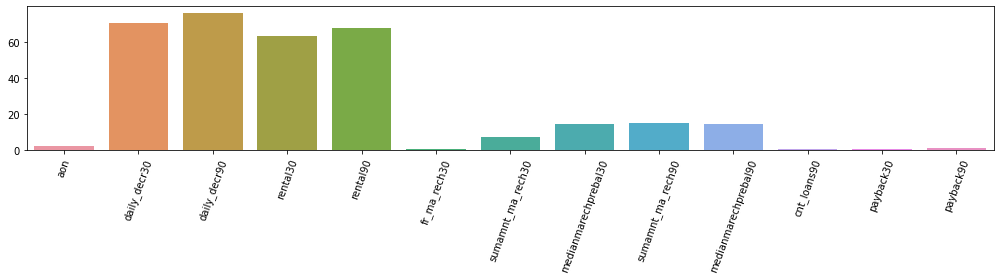

In [1694]:
plt.figure(figsize=(14,4))
sns.barplot(df_new[cont_var].columns,a2)
plt.xticks(rotation=70)
plt.tight_layout()

## lets build a model on this processed dataset 

In [1706]:
df_new.medianamnt_loans30.value_counts()

0.0    192532
1.0      7003
0.5      6449
2.0       412
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [1695]:
df_new.head()

aon  daily_decr30  daily_decr90   rental30   rental90  fr_ma_rech30  \
1  6.479224     14.510179     14.526152   6.038000   6.383568      2.758924   
2  8.929490     22.971610     22.973347  15.454616  15.454616      0.000000   
3  8.118041     11.181560     11.181560   9.655359   9.655359      0.000000   
4  6.223084      2.768873      2.768873   5.422267   5.422267      0.000000   
5  9.820117      5.320595      5.320595  10.319359  10.319359      1.259921   

   sumamnt_ma_rech30  medianmarechprebal30  sumamnt_ma_rech90  \
1          14.546423              1.957434          14.546423   
2          17.953584              3.937357          17.953584   
3          11.545503              4.047761          11.545503   
4           0.000000              0.000000           9.820117   
5          27.157290              3.072317          28.641646   

   medianmarechprebal90  cnt_loans90  payback30  payback90  maxamnt_loans30  \
1              1.957434     1.259921   3.072317   3.072317              6.0   
2              3.937357     1.000000   0.000000   0.000000             12.0   
3              4.047761     1.000000   0.000000   0.000000              6.0   
4              1.357209     1.259921   0.000000   0.000000              6.0   
5              3.271066     1.912931   1.326352   1.326352              6.0   

   medianamnt_loans30  maxamnt_loans90  medianamnt_loans90  label  
1                 0.0                6                 0.0      0  
2                 0.0               12                 0.0      1  
3                 0.0                6                 0.0      1  
4                 0.0                6                 0.0      1  
5                 0.0                6                 0.0      1

In [1707]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [1711]:
df_new.maxamnt_loans30.value_counts()   # this feature is okay

6.0     177344
12.0     25925
0.0       3168
Name: maxamnt_loans30, dtype: int64

In [1713]:
df_new.maxamnt_loans90.value_counts()  # this feature is also okay

6     178178
12     26290
0       1969
Name: maxamnt_loans90, dtype: int64

In [1716]:
df_new.medianamnt_loans30.value_counts() , df_new.medianamnt_loans30.value_counts() / len(df_new) * 100

(0.0    192532
 1.0      7003
 0.5      6449
 2.0       412
 1.5        38
 3.0         3
 Name: medianamnt_loans30, dtype: int64,
 0.0    93.264289
 1.0     3.392318
 0.5     3.123955
 2.0     0.199577
 1.5     0.018408
 3.0     0.001453
 Name: medianamnt_loans30, dtype: float64)

In [1717]:
df_new.medianamnt_loans90.value_counts() , df_new.medianamnt_loans90.value_counts() / len(df_new) * 100

(0.0    194501
 1.0      6032
 0.5      5580
 2.0       302
 1.5        19
 3.0         3
 Name: medianamnt_loans90, dtype: int64,
 0.0    94.218091
 1.0     2.921957
 0.5     2.703004
 2.0     0.146292
 1.5     0.009204
 3.0     0.001453
 Name: medianamnt_loans90, dtype: float64)

In [1719]:
# We can see that in the above 2 features 95 percent of the values are 0. thus we can safely remove these 2 columns.
df.drop(['medianamnt_loans30','medianamnt_loans90'],1,inplace = True)

In [1720]:
X = df_new.drop('label',1)
y = df_new['label']

In [1721]:
# stratified srain test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [1722]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((144505, 17), (144505,), (61932, 17), (61932,))

In [1723]:
train_n_ret_score(LogisticRegression())  # improvement 

(0.5932190435996151, 0.9362819846103674)

In [1724]:
train_n_ret_score(DecisionTreeClassifier())

(0.7028191064489903, 0.9213085273042446)

In [1725]:
train_n_ret_score(RandomForestClassifier())

(0.7052095110204537, 0.9517971081839466)

In [1727]:
train_n_ret_score(GradientBoostingClassifier())

(0.6675502178377533, 0.9506177209812736)

In [1731]:
train_n_ret_score(GaussianNB())   # best model yet... # also faster in computation

(0.7353360851837955, 0.8233090574250795)

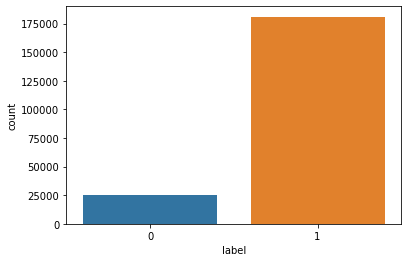

In [1732]:
sns.countplot(df_new.label)

## Hyptothesis testing on the reduced features

* When we have the  target variable as categorical and the input featrues as nemerical, srtart tsting with ANOVA test

In [1736]:
# selecting the best features out of the reduced features
from sklearn.feature_selection import SelectKBest,f_classif

In [1795]:
fs = SelectKBest(score_func=f_classif,k=14)

In [1796]:
fs.fit(X_train,y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [1871]:
fs.get_support()[1]

True

In [1886]:
list(fs.get_support())[0]

False

In [1894]:
kept_cols = []
for n,i in enumerate(list(fs.get_support())):
    if i == True:
        kept_cols.append(X_train.columns[n])

In [1895]:
len(kept_cols)

14

In [1896]:
kept_cols

['daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'sumamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans90',
 'payback30',
 'payback90',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90']

In [1797]:
X_train.shape,X_train_fs.shape

((144505, 17), (144505, 14))

In [1801]:
temp_model = LogisticRegression()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet for Logistic

0.5945964557931647

In [1808]:
temp_model = GaussianNB()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet <<All Over >>

0.7369026418936021

In [1813]:

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_fs, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8])

In [1799]:
temp_model = RandomForestClassifier()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))

0.7070821009850873

* IF we change the K to 14 , we are gettng the best roc_auc_score on Random Forest as well as GaussinNB,
* Thus we will keep 14 features in the dataset.

In [1803]:
## Let's try some oversampling using SMOTE

In [1805]:
from collections import Counter

In [1821]:
Counter(y_train)

Counter({0: 17846, 1: 126659})

In [1812]:
from imblearn.over_sampling import SMOTE

In [1914]:
over_s = SMOTE(sampling_strategy=0.15)

In [1915]:
X_train_over,y_train_over = over_s.fit_resample(X_train_fs,y_train)

In [1916]:
Counter(y_train_over)

Counter({0: 18998, 1: 126659})

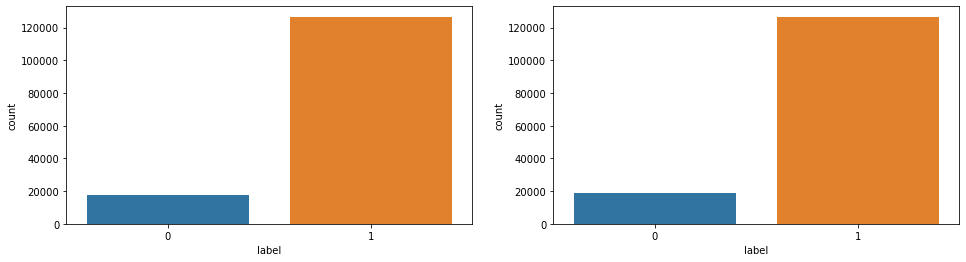

In [1917]:
fig = plt.figure(figsize=(16,4))

fig.add_subplot(121)
sns.countplot(y_train)
fig.add_subplot(122)
sns.countplot(y_train_over)

In [1918]:
X_train_fs = pd.DataFrame(X_train_fs,columns=kept_cols)
X_train_over = pd.DataFrame(X_train_over,columns=kept_cols)

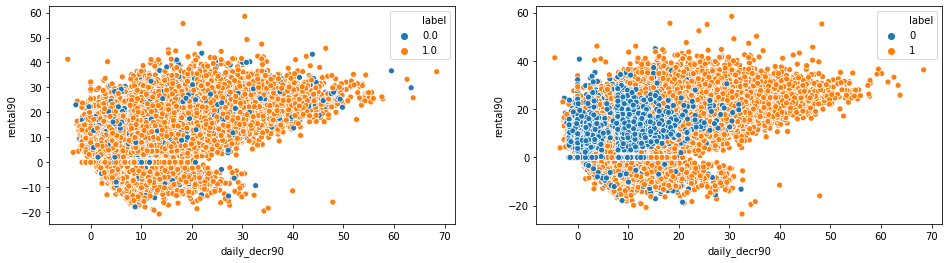

In [1919]:
fig = plt.figure(figsize=(16,4))

fig.add_subplot(121)
sns.scatterplot(X_train_fs.daily_decr90,X_train_fs.rental90,hue=y_train)
fig.add_subplot(122)
sns.scatterplot(X_train_over.daily_decr90,X_train_over.rental90,hue=y_train_over)

In [1920]:
len(y_train)

144505

In [1921]:
len(y_train_over)

145657

In [1924]:
len(y_train_over) - len(y_train)

1152

* We have added around 1150 minority class values to he dataset

In [1926]:
X_train_over.shape,y_train_over.shape

((145657, 14), (145657,))

In [1928]:
temp_model = LogisticRegression()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet for Logiristic Regression

0.5982980818531023

In [1930]:
temp_model = GaussianNB()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))   # Overall best score untill now

0.7370824455236045

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_over, y_train_over, scoring='roc_auc', cv=cv, n_jobs=-1)

In [1934]:
temp_model = RandomForestClassifier()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score for Random forst yet

0.7077909292488999

In [1935]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_over, y_train_over, scoring='roc_auc', cv=cv, n_jobs=-1)  # best OVERALL cross validation score on ten folds 

array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9])

In [1937]:
temp_model = GradientBoostingClassifier()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))

0.6765000971953177

In [1938]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_over, y_train_over, scoring='roc_auc', cv=cv, n_jobs=-1)  # best OVERALL cross validation score on ten folds 

array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9])

In [1940]:
# So preprocess dataframes we have till now are:

In [1941]:
X_train_over.head()

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0     21.870985     21.903850  17.741120  18.584672          24.140381   
1     25.842370     25.892500  22.593644  23.479765          28.125710   
2     16.576140     16.617647  20.710704  21.823876          20.995464   
3     20.758031     20.821426   7.528308   9.775079          15.937254   
4      3.540234      3.540234   5.819042   5.819042          13.871269   

   medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  cnt_loans90  \
0              3.955763          26.701794              3.834950     2.289428   
1              2.924018          30.362636              2.802039     1.912931   
2              4.932424          23.220315              5.033114     1.709976   
3              4.069816          27.165874              4.069816     1.000000   
4              3.018405          18.106366              3.045600     1.442250   

   payback30  payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  
0   1.644141   1.630324              6.0                 0.0              6.0  
1   1.259921   1.259921              6.0                 0.0              6.0  
2   1.326352   1.259921              6.0                 0.0              6.0  
3   0.000000   0.000000              6.0                 0.0              6.0  
4   1.442250   1.442250              6.0                 0.0              6.0

In [1942]:
y_train_over.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [1943]:
X_train_fs.head()

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0     21.870985     21.903850  17.741120  18.584672          24.140381   
1     25.842370     25.892500  22.593644  23.479765          28.125710   
2     16.576140     16.617647  20.710704  21.823876          20.995464   
3     20.758031     20.821426   7.528308   9.775079          15.937254   
4      3.540234      3.540234   5.819042   5.819042          13.871269   

   medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  cnt_loans90  \
0              3.955763          26.701794              3.834950     2.289428   
1              2.924018          30.362636              2.802039     1.912931   
2              4.932424          23.220315              5.033114     1.709976   
3              4.069816          27.165874              4.069816     1.000000   
4              3.018405          18.106366              3.045600     1.442250   

   payback30  payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  
0   1.644141   1.630324              6.0                 0.0              6.0  
1   1.259921   1.259921              6.0                 0.0              6.0  
2   1.326352   1.259921              6.0                 0.0              6.0  
3   0.000000   0.000000              6.0                 0.0              6.0  
4   1.442250   1.442250              6.0                 0.0              6.0

In [1944]:
y_train.head()

130453    0
151046    1
52222     1
177089    1
165123    1
Name: label, dtype: int64

* These above dataframes are the finali dataframe up till now for modelling .

## Now let's try scaling the variables.

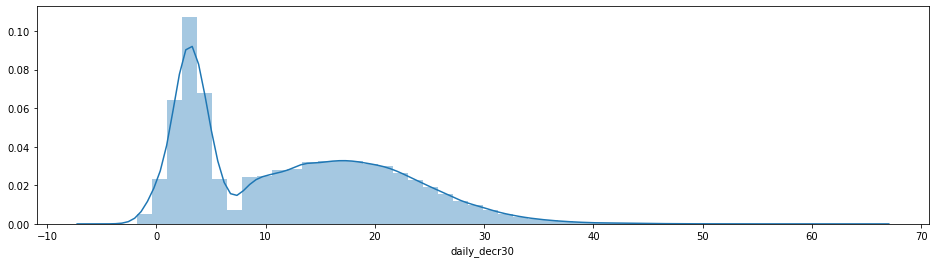

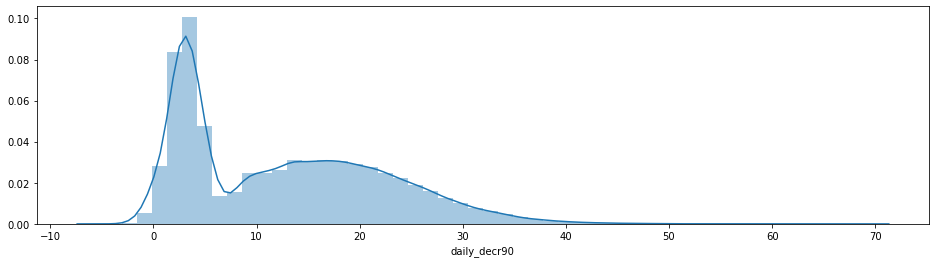

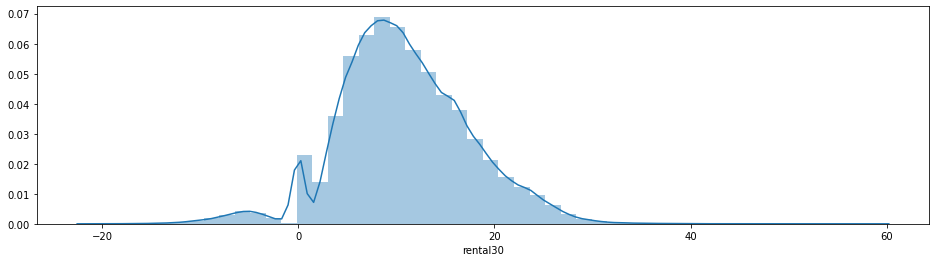

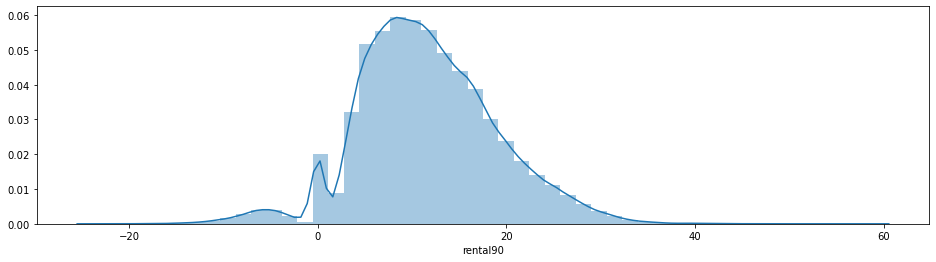

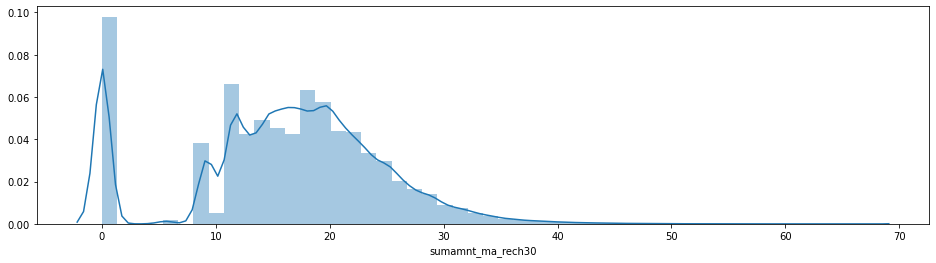

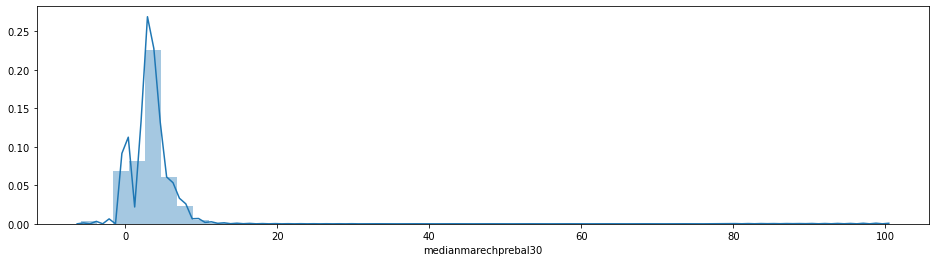

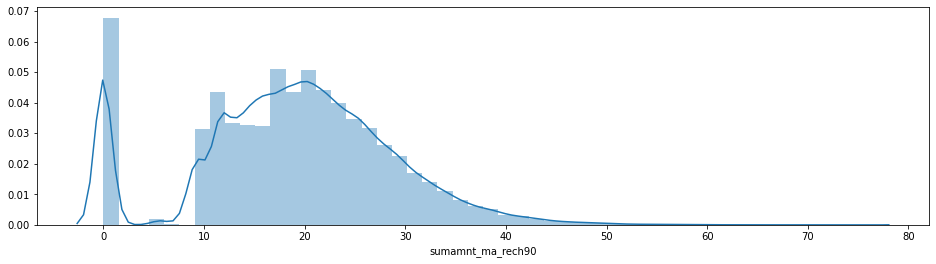

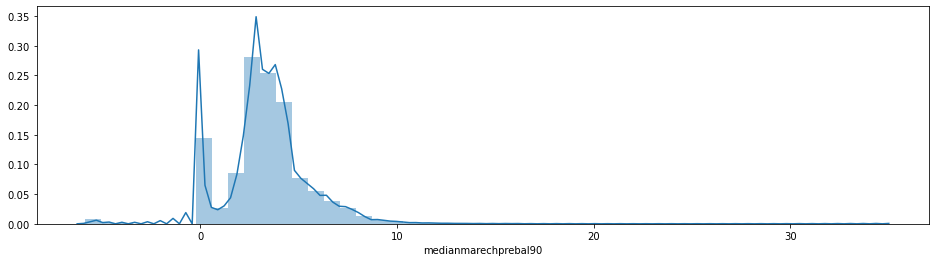

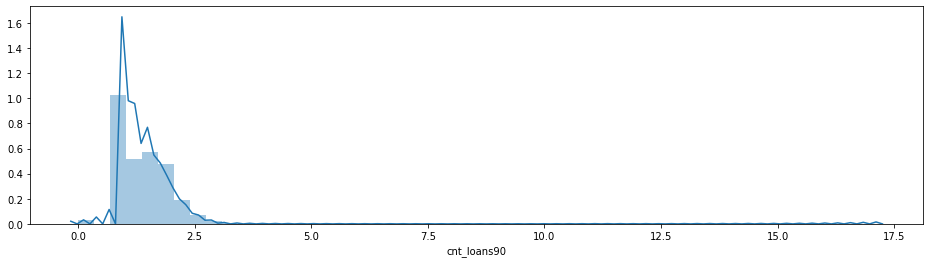

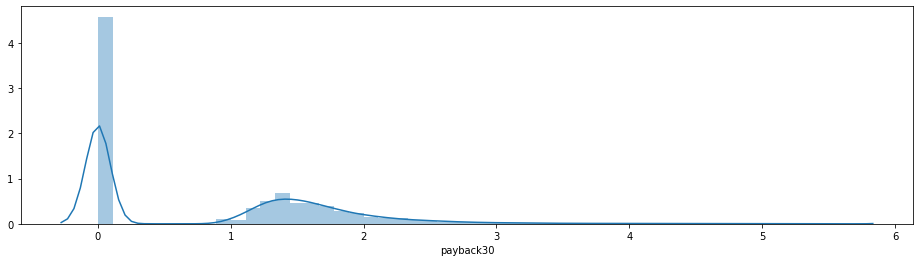

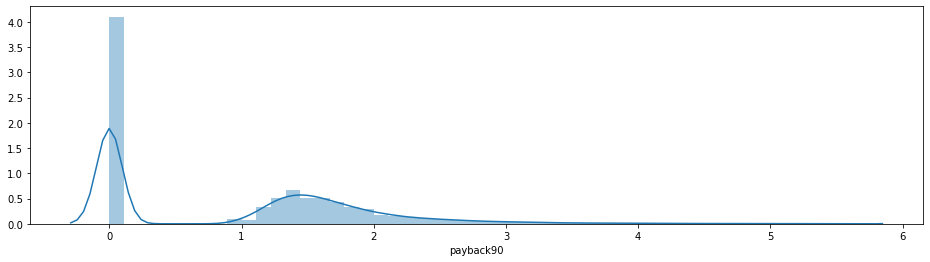

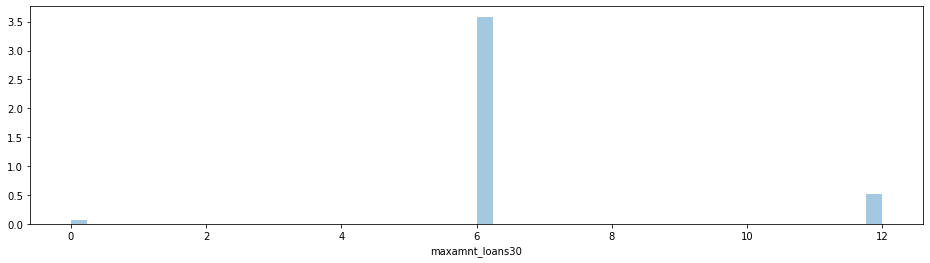

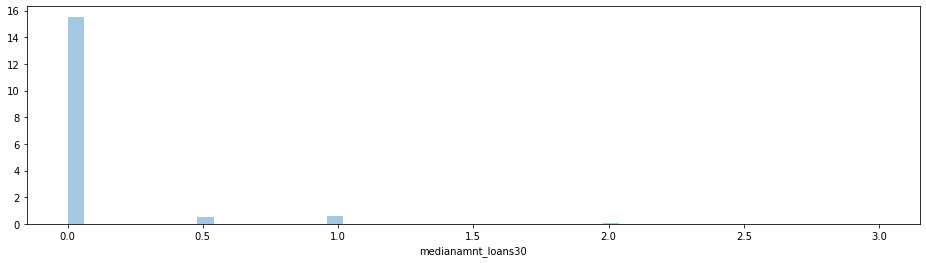

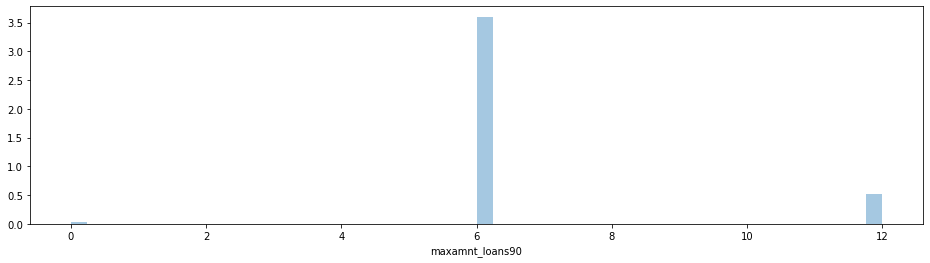

In [1948]:
# lets get the distributuion og the features again
for col in X_train_over:
    plt.figure(figsize=(16,4))
    sns.distplot(X_train_over[col])

In [1951]:
len(X_train_fs) + len(X_test_fs)

206437

In [1952]:
len(df)

209593

In [1957]:
# data loss up till now : 
print('number of samples lost : ', len(df) - len(X_train_fs) - len(X_test_fs) )
print('percentage of data loss : ',(len(df) - len(X_train_fs) - len(X_test_fs)) / len(df) * 100)

number of samples lost :  3156
percentage of data loss :  1.5057754791429103


* We have lost only about 1.5 prcentage of data

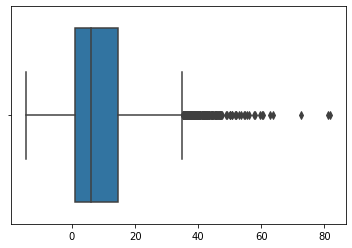

In [1971]:
sns.boxplot(X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ])

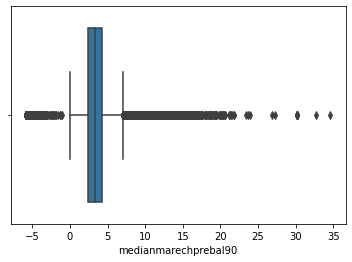

In [1963]:
sns.boxplot(X_train_over.medianmarechprebal90)

In [1970]:
X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ]

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
58         12.438696     12.481616  28.267333  29.508813           0.000000   
169         8.861038      8.877222  -6.712652  -6.788938          20.000000   
260        59.661426     60.142485  31.008804  34.824287          62.762269   
354        12.718558     12.757353  -9.568735  -9.791343          28.844991   
835        25.991615     28.450741  20.317467  22.566238          19.596931   
...              ...           ...        ...        ...                ...   
144166     20.796831     21.014963  35.564235  35.460836          40.365402   
144371      4.104536      4.104536  11.274052  11.274052          24.043325   
144853      1.073812      1.604061   0.000000   0.000000           0.000000   
145474      2.122533      2.122533  25.026986  25.026986          38.206174   
145640     24.989385     25.032148  11.015358  14.382486          26.450787   

        medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
58                  0.000000          19.603873             11.842859   
169                11.366883          20.000000             11.366883   
260                22.688944          72.638862             21.870799   
354                14.542673          28.844991             14.542673   
835                15.314430          34.063894             13.028969   
...                      ...                ...                   ...   
144166             10.033885          42.315463             13.637820   
144371             11.235950          24.043325             11.235950   
144853              0.000000          18.619240             11.571096   
145474             30.191593          38.206174             30.191593   
145640             12.291987          29.709300             11.718227   

        cnt_loans90  payback30  payback90  maxamnt_loans30  \
58         1.259921   0.000000   0.000000              6.0   
169        1.000000   0.000000   0.000000              6.0   
260        1.000000   0.000000   0.000000             12.0   
354        1.000000   0.000000   0.000000              6.0   
835        1.259921   0.000000   0.000000             12.0   
...             ...        ...        ...              ...   
144166     1.000000   0.000000   0.000000             12.0   
144371     1.442250   1.357209   1.357209              6.0   
144853     1.000000   0.000000   0.000000              6.0   
145474     1.037469   0.000000   0.000000              6.0   
145640     1.000000   0.000000   0.000000              6.0   

        medianamnt_loans30  maxamnt_loans90  
58                     0.0              6.0  
169                    1.0              6.0  
260                    0.0             12.0  
354                    0.0              6.0  
835                    0.0             12.0  
...                    ...              ...  
144166                 0.0             12.0  
144371                 0.0              6.0  
144853                 0.0              6.0  
145474                 0.0              6.0  
145640                 0.0              6.0  

[729 rows x 14 columns]

In [1972]:
samples_to_drop = X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ].index

In [1973]:
len(samples_to_drop)

729

In [1965]:
# let's drop these 729 samples

In [1977]:
X_train_over.shape,y_train_over.shape

((145657, 14), (145657,))

In [1990]:
samples_to_drop

Int64Index([    58,    169,    260,    354,    835,   1057,   1160,   1176,
              1203,   1220,
            ...
            143027, 143467, 143553, 143960, 144058, 144166, 144371, 144853,
            145474, 145640],
           dtype='int64', length=729)

In [2000]:
X_train_over.drop(samples_to_drop,inplace=True)

In [2001]:
y_train_over.drop(labels=samples_to_drop,inplace=True)

In [2002]:
X_train_over.shape,y_train_over.shape

((144928, 14), (144928,))

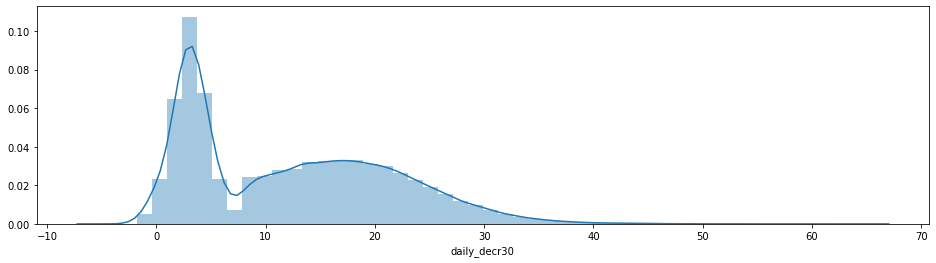

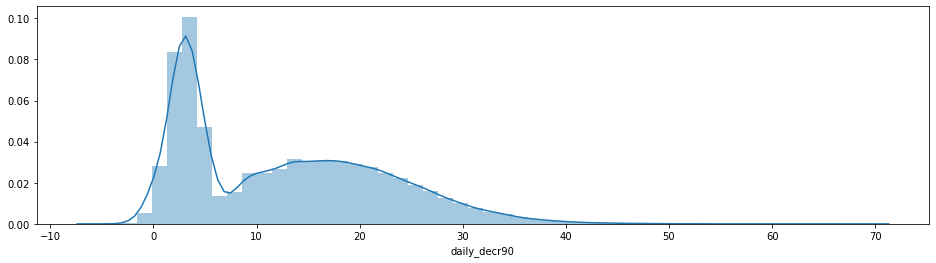

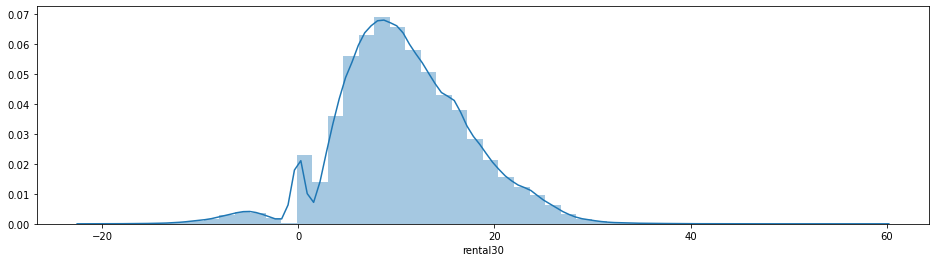

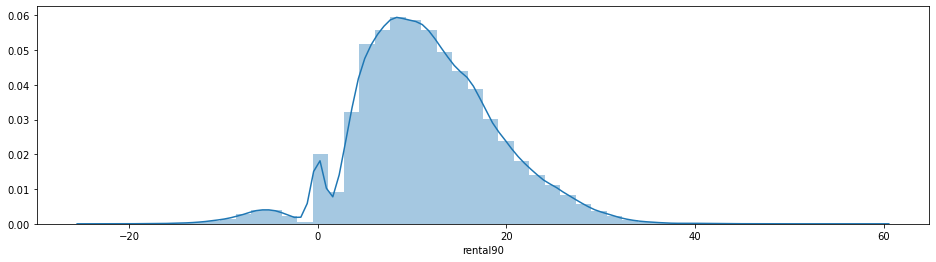

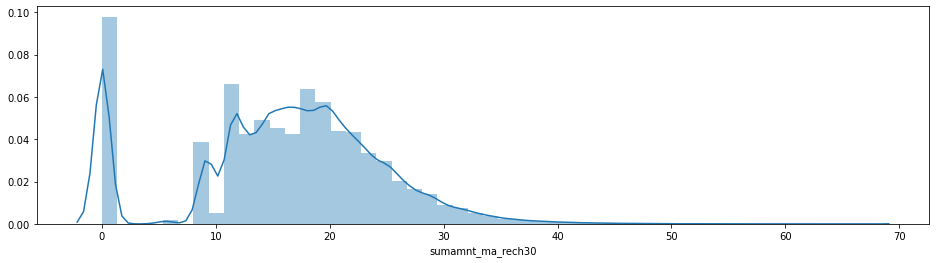

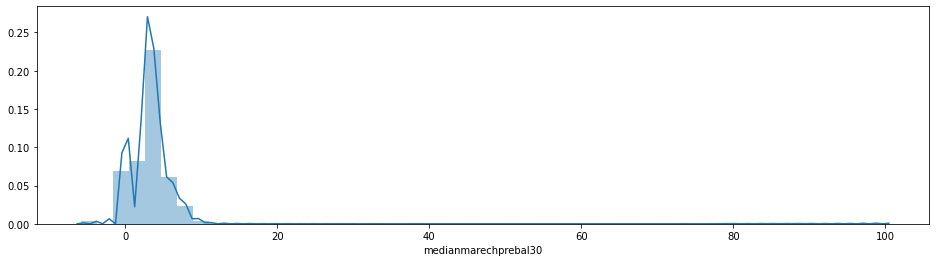

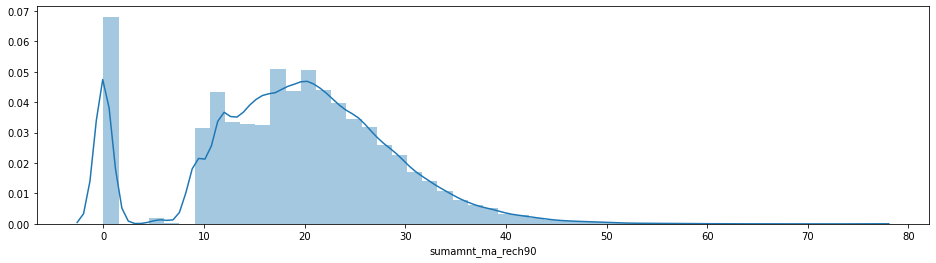

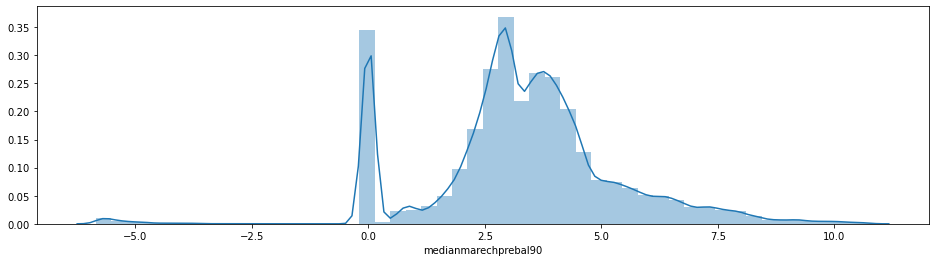

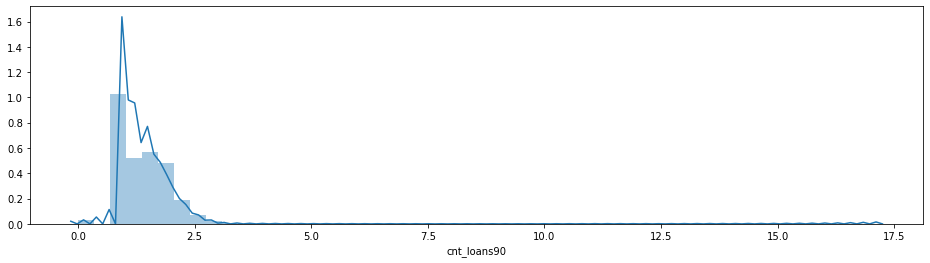

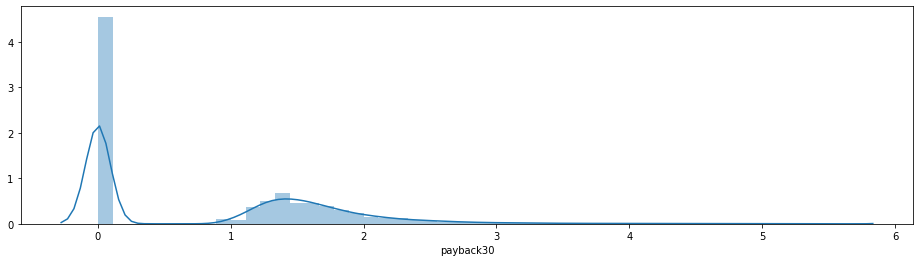

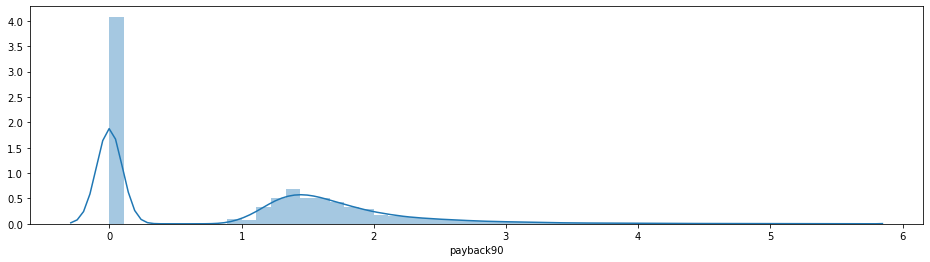

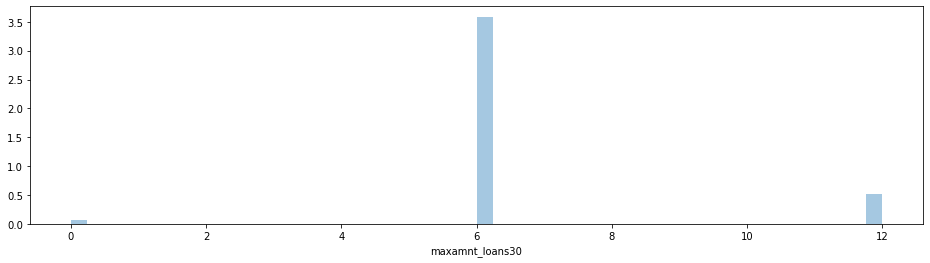

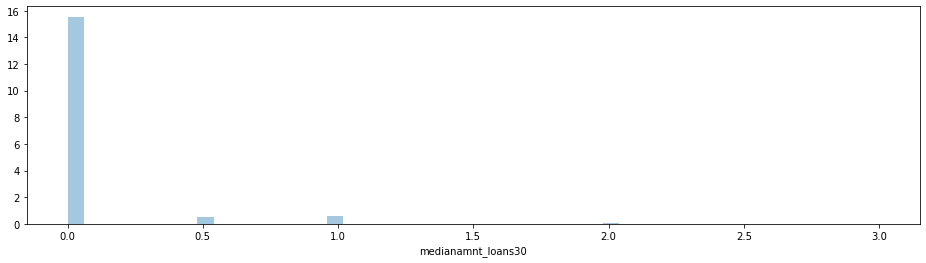

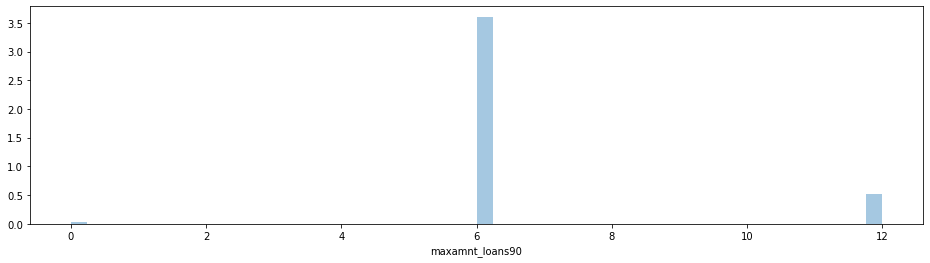

In [2003]:
# lets get the distributuion og the features again
for col in X_train_over:
    plt.figure(figsize=(16,4))
    sns.distplot(X_train_over[col])

In [2004]:
# let's do the same thing for medianmarechprebal30

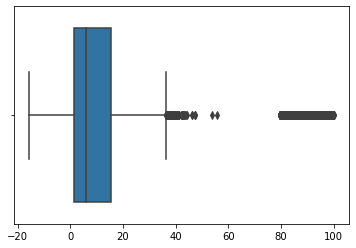

In [2008]:
sns.boxplot(X_train_over [ X_train_over.medianmarechprebal30 > X_train_over.medianmarechprebal30.quantile(0.995) ])

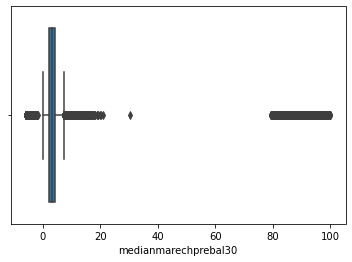

In [2006]:
sns.boxplot(X_train_over.medianmarechprebal30)

In [2011]:
X_train_over [ X_train_over.medianmarechprebal30 > X_train_over.medianmarechprebal30.quantile(0.995) ]

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
54          2.624731      2.624731   9.143064   9.143064          15.674409   
76         15.515697     15.517497  13.764742  13.852464          14.546423   
112         2.210965      2.210965   6.391493   6.391493          13.217256   
338        22.669502     22.716236  24.535730  27.696206          20.983358   
474         1.469508      1.469508   0.000000   0.000000           0.000000   
...              ...           ...        ...        ...                ...   
145150      9.605622      9.605622   8.873601  10.327883           0.000000   
145201      2.454723      2.454723   6.501339   6.501339          12.525114   
145411     13.684075     13.696939   7.286107   7.433313          14.843163   
145471     -1.469785     -1.469785   0.076588   0.076588           0.000000   
145528      2.575301      2.575301   6.972138   6.972138          14.268325   

        medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
54                 87.316284          15.674409              2.438499   
76                 89.748838          16.659908              4.610436   
112                87.342524          13.217256              6.701759   
338                83.974534          26.070322              3.107233   
474                94.297595           9.177544              3.072317   
...                      ...                ...                   ...   
145150             90.217801           0.000000              0.000000   
145201             96.530531          13.281058              3.174465   
145411             84.565732          15.968601              2.730332   
145471             81.562047           0.000000              0.000000   
145528             95.887396          15.542079              3.213731   

        cnt_loans90  payback30  payback90  maxamnt_loans30  \
54         1.000000   0.000000   0.000000              6.0   
76         1.259921   0.000000   0.000000              6.0   
112        1.259921   0.000000   0.000000              6.0   
338        1.000000   0.000000   0.000000             12.0   
474        1.000000   0.000000   0.000000              6.0   
...             ...        ...        ...              ...   
145150     1.000000   0.000000   0.000000              6.0   
145201     1.217275   0.916883   0.916883              6.0   
145411     1.000000   0.000000   0.000000              6.0   
145471     1.000000   0.000000   0.000000              6.0   
145528     1.366105   1.544934   1.544934              6.0   

        medianamnt_loans30  maxamnt_loans90  
54                     0.0              6.0  
76                     0.0              6.0  
112                    0.5              6.0  
338                    0.0             12.0  
474                    0.0              6.0  
...                    ...              ...  
145150                 0.0              6.0  
145201                 0.0              6.0  
145411                 0.0              6.0  
145471                 0.0              6.0  
145528                 0.0              6.0  

[725 rows x 14 columns]

In [2012]:
# let's remove these 725 rows too

In [2013]:
samples_to_drop = X_train_over [ X_train_over.medianmarechprebal30 > X_train_over.medianmarechprebal30.quantile(0.995) ].index
X_train_over.drop(samples_to_drop,inplace=True)
y_train_over.drop(labels=samples_to_drop,inplace=True)
X_train_over.shape,y_train_over.shape

((144203, 14), (144203,))

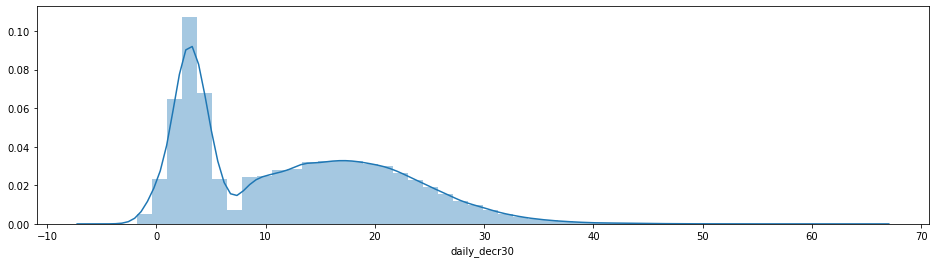

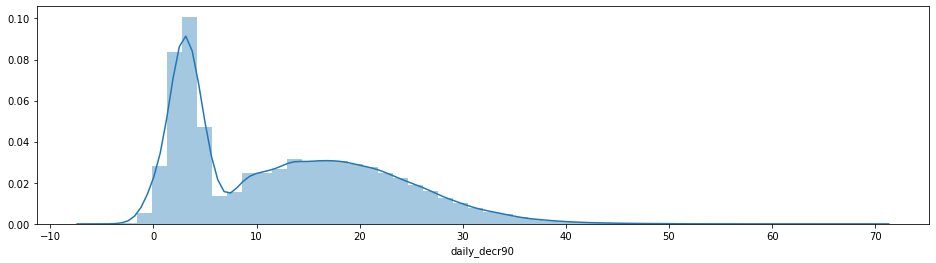

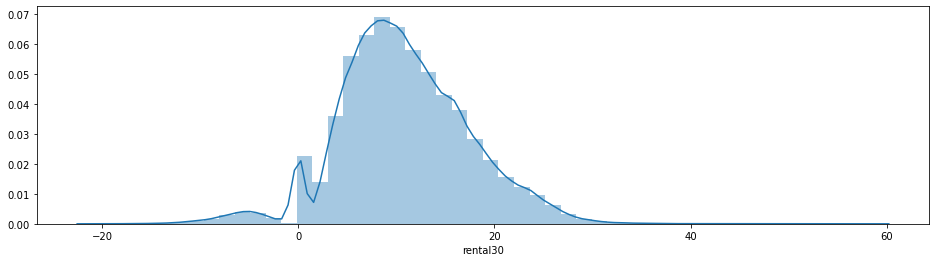

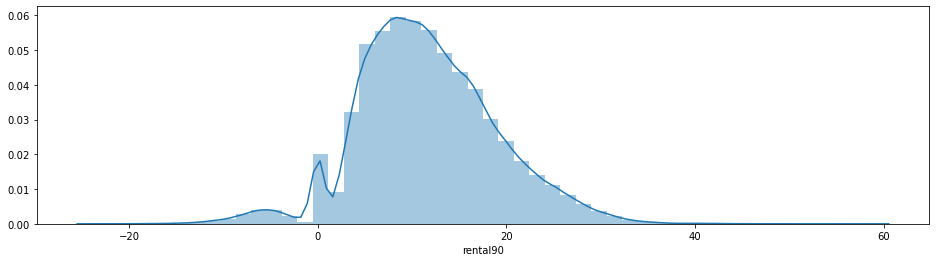

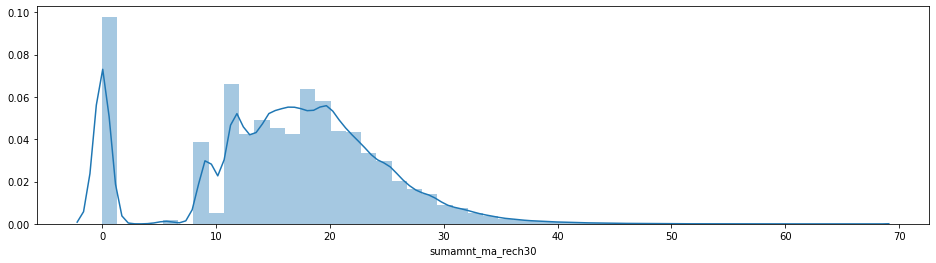

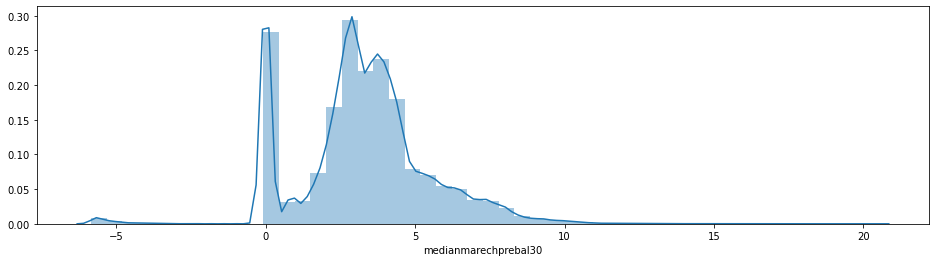

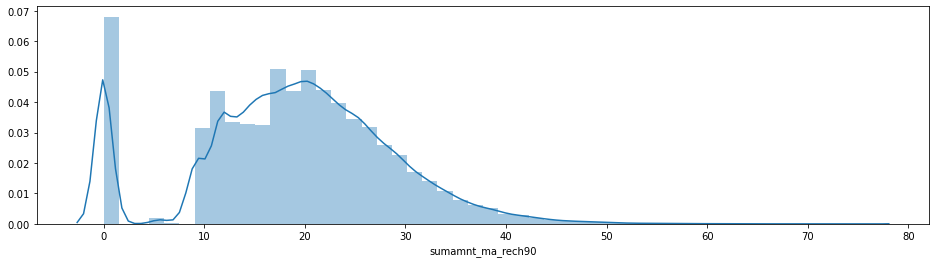

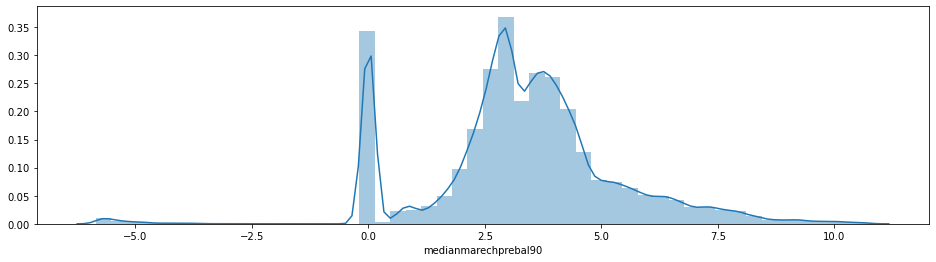

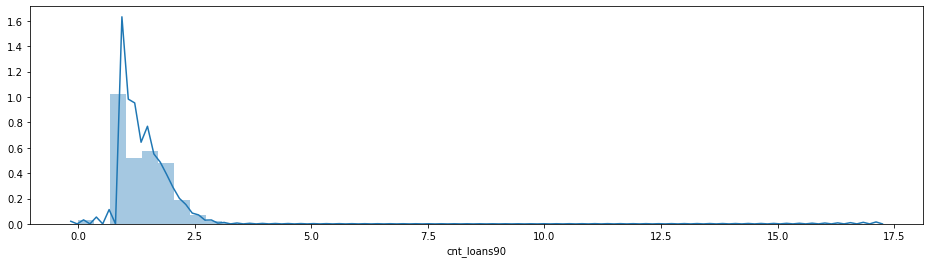

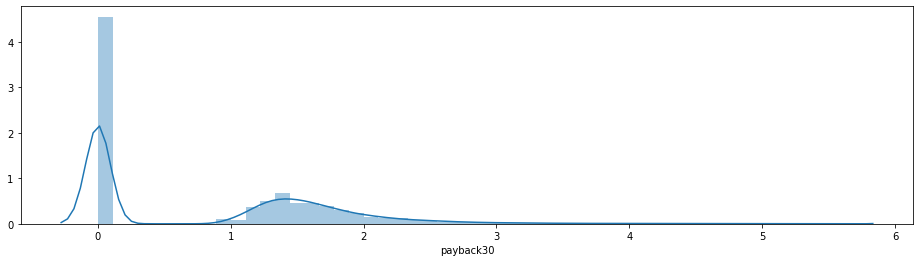

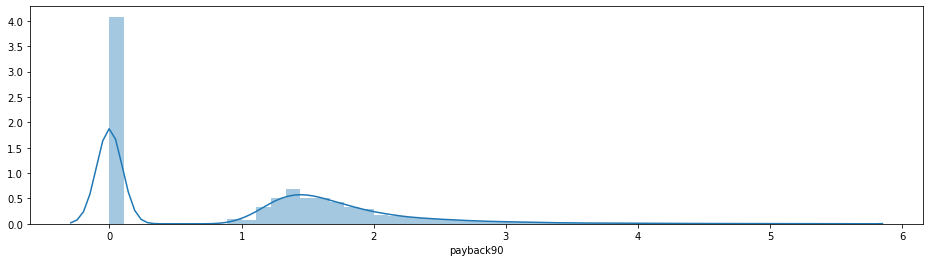

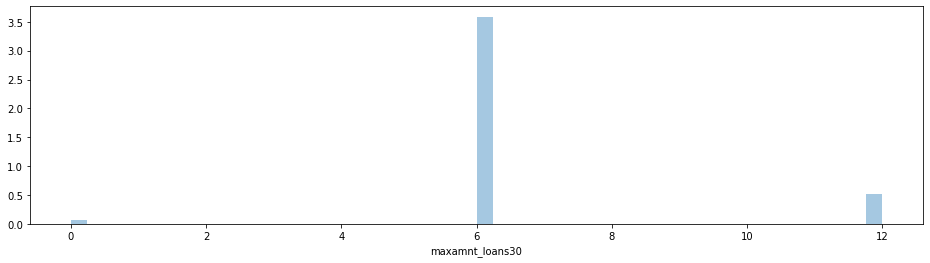

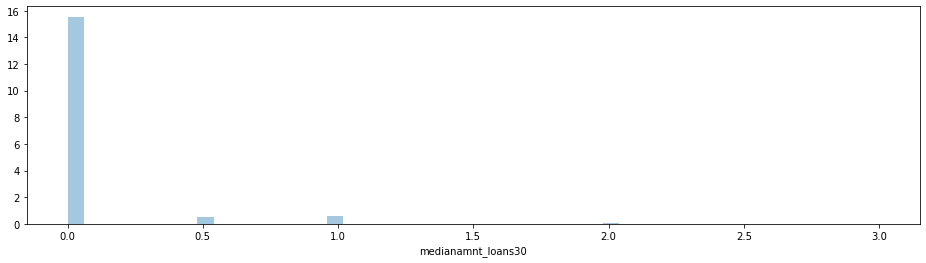

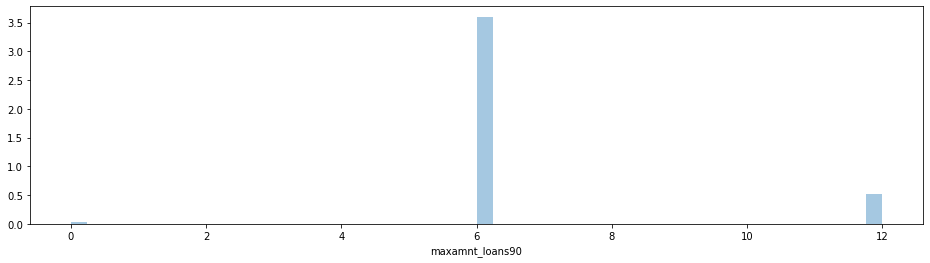

In [2014]:
# lets get the distributuion og the features again
for col in X_train_over:
    plt.figure(figsize=(16,4))
    sns.distplot(X_train_over[col])

In [2015]:
# let's now do standard scaling on the data

In [2016]:
from sklearn.preprocessing import StandardScaler

In [2017]:
sc = StandardScaler()

In [2019]:
X_train_scaled = sc.fit_transform(X_train_over)
X_test_scaled = sc.transform(X_test_fs)

## Saving the processed data

In [2049]:
#X_train_over.join(y_train_over).to_csv('train_data_preprocessed.csv')#.append(pd.DataFrame(X_test_fs,columns=kept_cols).join(y_test),ignore_index=True)

In [2056]:
#pd.DataFrame(X_test_fs,columns=kept_cols).join(y_test.reset_index()).to_csv('test_data_preprocessed.csv')

## Final Model Building 

In [2057]:
# read in the train data

In [5]:
train_df = pd.read_csv('train_data_preprocessed.csv',index_col=[0])

In [6]:
train_df

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0          21.870985     21.903850  17.741120  18.584672          24.140381   
1          25.842370     25.892500  22.593644  23.479765          28.125710   
2          16.576140     16.617647  20.710704  21.823876          20.995464   
3          20.758031     20.821426   7.528308   9.775079          15.937254   
4           3.540234      3.540234   5.819042   5.819042          13.871269   
...              ...           ...        ...        ...                ...   
145652      3.130989      3.130989  -4.708207  -4.708207          13.480150   
145653     11.317878     11.320617   9.378631   9.628612          13.218492   
145654      0.000000      0.000000   9.789575   9.789575           0.000000   
145655     11.414236     11.433657   3.194172   4.377889           0.000000   
145656      1.512366      1.512366   2.201454   2.201454           5.572055   

        medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
0                   3.955763          26.701794              3.834950   
1                   2.924018          30.362636              2.802039   
2                   4.932424          23.220315              5.033114   
3                   4.069816          27.165874              4.069816   
4                   3.018405          18.106366              3.045600   
...                      ...                ...                   ...   
145652              3.425752          13.480150              3.425752   
145653              3.010280          13.218492              3.010280   
145654              0.000000           0.000000              0.000000   
145655              0.000000           0.000000              0.000000   
145656              6.842455           5.572055              6.842455   

        cnt_loans90  payback30  payback90  maxamnt_loans30  \
0          2.289428   1.644141   1.630324              6.0   
1          1.912931   1.259921   1.259921              6.0   
2          1.709976   1.326352   1.259921              6.0   
3          1.000000   0.000000   0.000000              6.0   
4          1.442250   1.442250   1.442250              6.0   
...             ...        ...        ...              ...   
145652     1.338013   1.037318   1.037318              6.0   
145653     1.289465   3.482210   3.482210              6.0   
145654     1.000000   0.000000   0.000000              6.0   
145655     1.000000   0.000000   0.000000              6.0   
145656     1.259921   0.000000   0.000000              6.0   

        medianamnt_loans30  maxamnt_loans90  label  
0                      0.0              6.0      0  
1                      0.0              6.0      1  
2                      0.0              6.0      1  
3                      0.0              6.0      1  
4                      0.0              6.0      1  
...                    ...              ...    ...  
145652                 0.0              6.0      0  
145653                 0.0              6.0      0  
145654                 0.0              6.0      0  
145655                 0.0              6.0      0  
145656                 0.0              6.0      0  

[144203 rows x 15 columns]

In [7]:
test_df = pd.read_csv('test_data_preprocessed.csv',index_col=[0])

In [8]:
test_df

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0         26.450721     28.072660  21.468633  24.609621          25.298814   
1         22.388419     22.449368  12.900403  13.306315          19.153875   
2         26.576143     27.832473  21.206089  21.935652          24.310773   
3         19.279388     19.292895   8.145916   9.661290          17.637823   
4         20.303651     20.326249  15.613896  16.718895          24.039864   
...             ...           ...        ...        ...                ...   
61927     20.057667     20.065618  14.872791  14.899056          17.953584   
61928     16.127881     18.483082   0.000000  12.045062           0.000000   
61929     12.026638     12.034622  14.273189  15.029807          11.562981   
61930     20.493553     23.268190  11.242045  13.660900          19.744243   
61931     21.141896     24.161526  12.479561  13.654128          19.061665   

       medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
0                  7.747200          30.892797              4.267723   
1                  0.000000          23.794542              5.117230   
2                  2.093099          32.330877              2.130470   
3                  4.396830          20.539484              3.779763   
4                  3.892996          27.253668              3.802952   
...                     ...                ...                   ...   
61927              2.604627          19.427961              3.651072   
61928              0.000000          16.652699              7.509617   
61929              4.020726          11.562981              4.020726   
61930              2.900436          27.499174              2.375208   
61931              3.088826          25.297252              3.461343   

       cnt_loans90  payback30  payback90  maxamnt_loans30  medianamnt_loans30  \
0         1.912931   0.000000   1.462009              6.0                 0.0   
1         1.587401   2.429121   2.257179              6.0                 0.0   
2         1.587401   1.493802   1.663103              6.0                 0.0   
3         1.442250   0.000000   1.765174              6.0                 0.0   
4         2.223980   1.379462   1.381450              6.0                 0.0   
...            ...        ...        ...              ...                 ...   
61927     1.259921   0.000000   0.000000              6.0                 0.0   
61928     1.000000   0.000000   0.000000             12.0                 0.0   
61929     1.442250   2.000000   2.000000              6.0                 0.0   
61930     1.817121   0.000000   1.565040              0.0                 0.0   
61931     2.080084   1.442250   1.663103              6.0                 0.0   

       maxamnt_loans90   index  label  
0                  6.0  194663      1  
1                  6.0  141541      1  
2                  6.0  197775      1  
3                  6.0  166691      1  
4                  6.0  100933      1  
...                ...     ...    ...  
61927              6.0   65054      1  
61928             12.0   43206      1  
61929              6.0   92081      0  
61930              6.0   87230      1  
61931              6.0  183183      1  

[61932 rows x 16 columns]

X and y split in the train dataset

In [13]:
X = train_df.drop('label',1)
y = train_df['label']

## using Repeated K Fods to validate the model

In [17]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
#cross_val_score(temp_model, X_train_fs, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [14]:
cross_val_score(LogisticRegression(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.8235133 , 0.82614822, 0.82627292, 0.82438163, 0.82576355])

In [15]:
cross_val_score(SVC(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.74505401, 0.74409227, 0.74548028, 0.74845905, 0.74758005])

In [16]:
cross_val_score(DecisionTreeClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.70255473, 0.70775761, 0.70902897, 0.70663978, 0.73262123])

In [17]:
cross_val_score(RandomForestClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.8748551 , 0.8788937 , 0.87909887, 0.87893183, 0.8951725 ])

In [18]:
cross_val_score(GaussianNB(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.79645298, 0.79922765, 0.80017522, 0.79274051, 0.79753621])

In [19]:
cross_val_score(GradientBoostingClassifierdientBoostingClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.87498351, 0.87606488, 0.87308577, 0.876001  , 0.87497638])

* We can infer that ensemble learning model Random Forset is giving us the best cross validation accuracy.

## Test the data on the test set with the best model (RandomForest)

In [11]:
best_model = RandomForestClassifier()

In [14]:
best_model.fit(X,y)

RandomForestClassifier()

In [15]:
X_test = test_df.drop('label',1)
y_test = test_df['label']

In [16]:
X_test

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0         26.450721     28.072660  21.468633  24.609621          25.298814   
1         22.388419     22.449368  12.900403  13.306315          19.153875   
2         26.576143     27.832473  21.206089  21.935652          24.310773   
3         19.279388     19.292895   8.145916   9.661290          17.637823   
4         20.303651     20.326249  15.613896  16.718895          24.039864   
...             ...           ...        ...        ...                ...   
61927     20.057667     20.065618  14.872791  14.899056          17.953584   
61928     16.127881     18.483082   0.000000  12.045062           0.000000   
61929     12.026638     12.034622  14.273189  15.029807          11.562981   
61930     20.493553     23.268190  11.242045  13.660900          19.744243   
61931     21.141896     24.161526  12.479561  13.654128          19.061665   

       medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
0                  7.747200          30.892797              4.267723   
1                  0.000000          23.794542              5.117230   
2                  2.093099          32.330877              2.130470   
3                  4.396830          20.539484              3.779763   
4                  3.892996          27.253668              3.802952   
...                     ...                ...                   ...   
61927              2.604627          19.427961              3.651072   
61928              0.000000          16.652699              7.509617   
61929              4.020726          11.562981              4.020726   
61930              2.900436          27.499174              2.375208   
61931              3.088826          25.297252              3.461343   

       cnt_loans90  payback30  payback90  maxamnt_loans30  medianamnt_loans30  \
0         1.912931   0.000000   1.462009              6.0                 0.0   
1         1.587401   2.429121   2.257179              6.0                 0.0   
2         1.587401   1.493802   1.663103              6.0                 0.0   
3         1.442250   0.000000   1.765174              6.0                 0.0   
4         2.223980   1.379462   1.381450              6.0                 0.0   
...            ...        ...        ...              ...                 ...   
61927     1.259921   0.000000   0.000000              6.0                 0.0   
61928     1.000000   0.000000   0.000000             12.0                 0.0   
61929     1.442250   2.000000   2.000000              6.0                 0.0   
61930     1.817121   0.000000   1.565040              0.0                 0.0   
61931     2.080084   1.442250   1.663103              6.0                 0.0   

       maxamnt_loans90   index  
0                  6.0  194663  
1                  6.0  141541  
2                  6.0  197775  
3                  6.0  166691  
4                  6.0  100933  
...                ...     ...  
61927              6.0   65054  
61928             12.0   43206  
61929              6.0   92081  
61930              6.0   87230  
61931              6.0  183183  

[61932 rows x 15 columns]

In [26]:
X_test.shape,y_test.shape

((61932, 14), (61932,))

In [41]:
best_model.score(X_test,y_test)

0.9115320028418266

In [19]:
y_preds = best_model.predict(X_test)

In [44]:
cross_val_score(best_model,X_test,y_test,cv=5,scoring='roc_auc')

array([0.86802801, 0.86952829, 0.87177092, 0.87226425, 0.87583388])

In [45]:
np.mean(cross_val_score(best_model,X_test,y_test,cv=5,scoring='roc_auc'))

0.8708378676556763

## HyperParameter Tuning (Computationally Very Expensive, even on google colab)

In [82]:
# param_dict = {'max_depth': [10, 20,50, None],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600]}

In [81]:
#from sklearn.model_selection import GridSearchCV

In [94]:
#gs_model = GridSearchCV(RandomForestClassifier(),param_dict,scoring='roc_auc',verbose=1,n_jobs=-1)

In [96]:
#gs_model.fit(X,y)

## metrics Evaluation

In [56]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,classification_report,plot_precision_recall_curve

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.74      0.44      0.55      7648
           1       0.93      0.98      0.95     54284

    accuracy                           0.91     61932
   macro avg       0.83      0.71      0.75     61932
weighted avg       0.90      0.91      0.90     61932



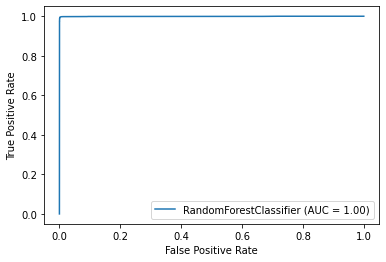

In [53]:
plot_roc_curve(best_model,X,y)   #--> ROC curve on the test data

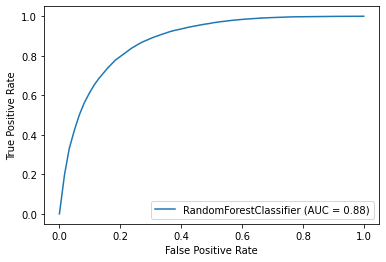

In [55]:
plot_roc_curve(best_model,X_test,y_test)  # --> ROC curve onthe test data

In [72]:
feature_imp_df = pd.DataFrame(best_model.feature_importances_,index=X.columns,columns=['feature_importance'])

In [92]:
feature_imp_df.sort_values('feature_importance',ascending=False,inplace=True)

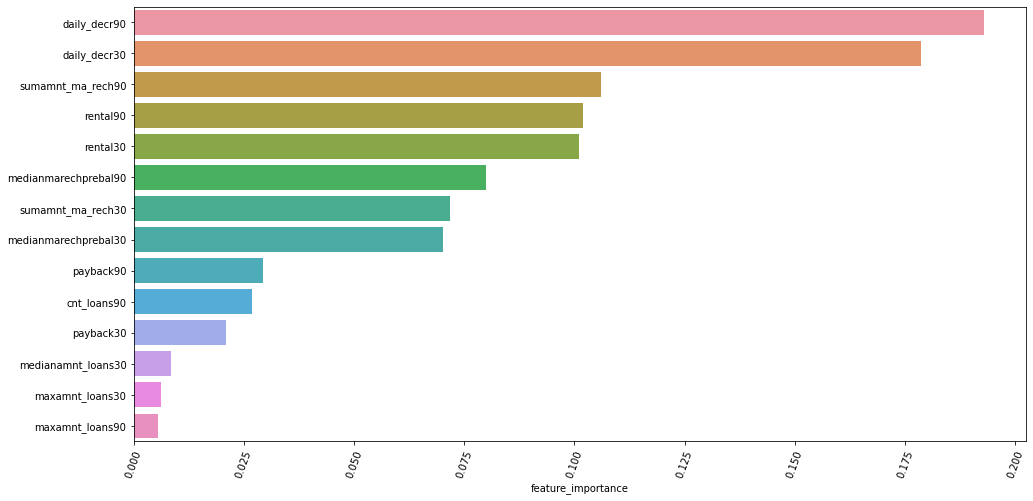

In [251]:
plt.figure(figsize=(16,8))
sns.barplot(feature_imp_df.feature_importance,feature_imp_df.index)
plt.xticks(rotation=70);

In [22]:
from sklearn.metrics import matthews_corrcoef,f1_score

In [23]:
matthews_corrcoef(y_test,y_preds)

0.5256325533314543

In [20]:
f1_score(y_test,y_preds)

0.9507803121248498

In [24]:
## Saving the model

In [25]:
import joblib

In [26]:
joblib.dump(best_model,'mirco_credit_defaulter_model.pkl')

['mirco_credit_defaulter_model.pkl']